In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from catboost import CatBoostClassifier

# Data inizialization 

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Data visualization

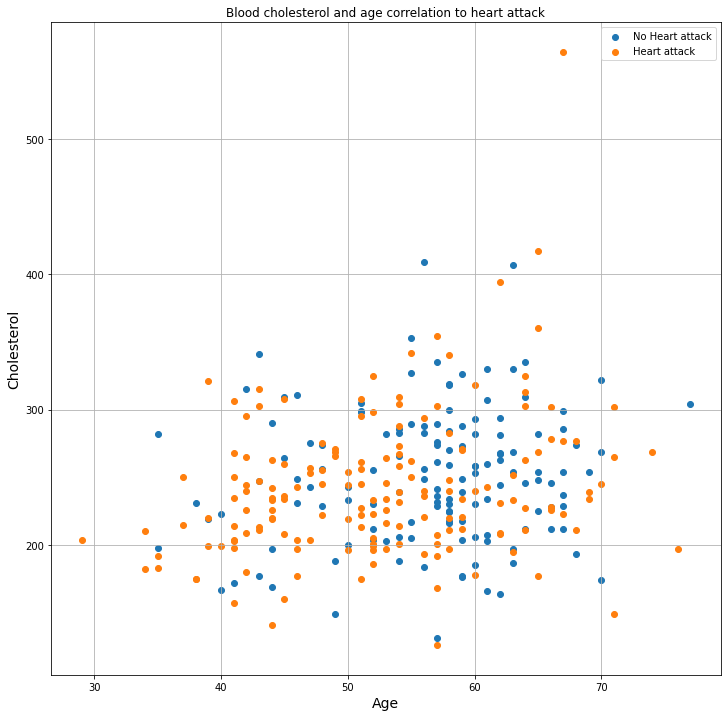

In [6]:
x1 = data.age[data.output==1]
x2 = data.age[data.output==0]
y2 = data.chol[data.output==0]
y1 = data.chol[data.output==1]
plt.figure(figsize=(12, 12))
plt.title('Blood cholesterol and age correlation to heart attack')
plt.scatter(x2, y2)
plt.scatter(x1, y1)
plt.legend(['No Heart attack', 'Heart attack'])
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Cholesterol', fontsize = 14)
plt.grid(True)

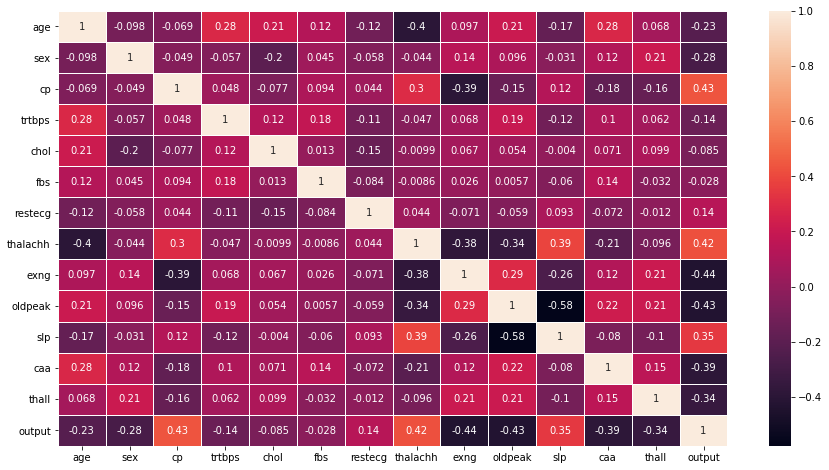

In [7]:
plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 1)
plt.show()

In [8]:
Age_18_25 = data.age[(data.age >= 18) & (data.age <= 25)]
Age_26_35 = data.age[(data.age >= 26) & (data.age <= 35)]
Age_36_45 = data.age[(data.age >= 36) & (data.age <= 45)]
Age_46_55 = data.age[(data.age >= 46) & (data.age <= 55)]
Age_56_65 = data.age[(data.age >= 56) & (data.age <= 65)]
Age_66_75 = data.age[(data.age >= 66) & (data.age <= 75)]
Age_75above = data.age[data.age >= 76]
x_Age = [ '18-25','26-35', '36-45', '46-55', '56-65','66-75','75+']
y_Age = [len(Age_18_25.values), len(Age_26_35.values), len(Age_36_45.values), len(Age_46_55.values), len(Age_56_65.values),
         len(Age_66_75.values), len(Age_75above.values)]

px.bar(data_frame = data, x = x_Age, y = y_Age, color = x_Age, template = 'plotly_dark',
        labels={
                     'x': "Age",
                     'y': "Number",
                     'color':'Age group'
                     
                 },
       title = 'Number of patients per Age group')

# Predictions

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('output', axis=1), data['output'])

In [58]:
lmodel = LogisticRegression()

In [59]:
lmodel.fit(X_train, y_train)

c:\users\voops\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [60]:
pred = lmodel.predict(X_test)

In [61]:
accuracy_score(pred, y_test)

0.8157894736842105

In [44]:
model = CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=data.drop('output', axis=1), 
                                       y=data['output'], 
                                       plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6781496	test: 0.6806976	best: 0.6806976 (0)	total: 718us	remaining: 718ms
1:	learn: 0.6625334	test: 0.6708990	best: 0.6708990 (1)	total: 1.5ms	remaining: 750ms
2:	learn: 0.6392624	test: 0.6436717	best: 0.6436717 (2)	total: 2.15ms	remaining: 714ms
3:	learn: 0.6188924	test: 0.6259802	best: 0.6259802 (3)	total: 2.86ms	remaining: 713ms
4:	learn: 0.6075818	test: 0.6167005	best: 0.6167005 (4)	total: 3.54ms	remaining: 705ms
5:	learn: 0.5922855	test: 0.6062589	best: 0.6062589 (5)	total: 4.25ms	remaining: 704ms
6:	learn: 0.5752360	test: 0.5874376	best: 0.5874376 (6)	total: 4.93ms	remaining: 699ms
7:	learn: 0.5569643	test: 0.5713083	best: 0.5713083 (7)	total: 5.71ms	remaining: 709ms
8:	learn: 0.5420252	test: 0.5613342	best: 0.5613342 (8)	total: 6.41ms	remaining: 705ms
9:	learn: 0.5312971	test: 0.5551458	best: 0.5551458 (9)	total: 7.08ms	remaining: 701ms
10:	learn: 0.5198445	test: 0.5482825	best: 0.5482825 (10)	total: 7.87ms	remaining: 708ms
11:	learn: 0.5086864	test: 0.5383255	best: 

222:	learn: 0.1339306	test: 0.3676673	best: 0.3568875 (142)	total: 149ms	remaining: 519ms
223:	learn: 0.1330094	test: 0.3679452	best: 0.3568875 (142)	total: 150ms	remaining: 519ms
224:	learn: 0.1321409	test: 0.3676368	best: 0.3568875 (142)	total: 150ms	remaining: 518ms
225:	learn: 0.1310481	test: 0.3672808	best: 0.3568875 (142)	total: 151ms	remaining: 518ms
226:	learn: 0.1308277	test: 0.3670140	best: 0.3568875 (142)	total: 152ms	remaining: 517ms
227:	learn: 0.1298186	test: 0.3671711	best: 0.3568875 (142)	total: 152ms	remaining: 516ms
228:	learn: 0.1289136	test: 0.3677570	best: 0.3568875 (142)	total: 153ms	remaining: 515ms
229:	learn: 0.1286191	test: 0.3675707	best: 0.3568875 (142)	total: 154ms	remaining: 514ms
230:	learn: 0.1282851	test: 0.3678556	best: 0.3568875 (142)	total: 154ms	remaining: 514ms
231:	learn: 0.1274502	test: 0.3677914	best: 0.3568875 (142)	total: 155ms	remaining: 514ms
232:	learn: 0.1268261	test: 0.3678009	best: 0.3568875 (142)	total: 156ms	remaining: 513ms
233:	learn

455:	learn: 0.0510648	test: 0.4191456	best: 0.3568875 (142)	total: 301ms	remaining: 359ms
456:	learn: 0.0508286	test: 0.4201142	best: 0.3568875 (142)	total: 302ms	remaining: 358ms
457:	learn: 0.0507065	test: 0.4211529	best: 0.3568875 (142)	total: 302ms	remaining: 358ms
458:	learn: 0.0503764	test: 0.4217513	best: 0.3568875 (142)	total: 303ms	remaining: 357ms
459:	learn: 0.0501116	test: 0.4221397	best: 0.3568875 (142)	total: 304ms	remaining: 357ms
460:	learn: 0.0499282	test: 0.4221210	best: 0.3568875 (142)	total: 304ms	remaining: 356ms
461:	learn: 0.0496391	test: 0.4232926	best: 0.3568875 (142)	total: 305ms	remaining: 355ms
462:	learn: 0.0494193	test: 0.4242504	best: 0.3568875 (142)	total: 306ms	remaining: 355ms
463:	learn: 0.0492544	test: 0.4242394	best: 0.3568875 (142)	total: 306ms	remaining: 354ms
464:	learn: 0.0491274	test: 0.4239799	best: 0.3568875 (142)	total: 307ms	remaining: 353ms
465:	learn: 0.0489174	test: 0.4231361	best: 0.3568875 (142)	total: 308ms	remaining: 352ms
466:	learn

672:	learn: 0.0234408	test: 0.4759231	best: 0.3568875 (142)	total: 456ms	remaining: 222ms
673:	learn: 0.0233749	test: 0.4755693	best: 0.3568875 (142)	total: 457ms	remaining: 221ms
674:	learn: 0.0233202	test: 0.4762816	best: 0.3568875 (142)	total: 457ms	remaining: 220ms
675:	learn: 0.0232637	test: 0.4764144	best: 0.3568875 (142)	total: 458ms	remaining: 220ms
676:	learn: 0.0232098	test: 0.4764003	best: 0.3568875 (142)	total: 459ms	remaining: 219ms
677:	learn: 0.0231580	test: 0.4766500	best: 0.3568875 (142)	total: 459ms	remaining: 218ms
678:	learn: 0.0229889	test: 0.4767426	best: 0.3568875 (142)	total: 460ms	remaining: 217ms
679:	learn: 0.0229613	test: 0.4768377	best: 0.3568875 (142)	total: 461ms	remaining: 217ms
680:	learn: 0.0229303	test: 0.4770335	best: 0.3568875 (142)	total: 461ms	remaining: 216ms
681:	learn: 0.0228885	test: 0.4774855	best: 0.3568875 (142)	total: 462ms	remaining: 215ms
682:	learn: 0.0228488	test: 0.4779298	best: 0.3568875 (142)	total: 463ms	remaining: 215ms
683:	learn

904:	learn: 0.0132098	test: 0.5192367	best: 0.3568875 (142)	total: 608ms	remaining: 63.8ms
905:	learn: 0.0131661	test: 0.5196696	best: 0.3568875 (142)	total: 609ms	remaining: 63.2ms
906:	learn: 0.0131383	test: 0.5202159	best: 0.3568875 (142)	total: 610ms	remaining: 62.5ms
907:	learn: 0.0131292	test: 0.5203377	best: 0.3568875 (142)	total: 610ms	remaining: 61.8ms
908:	learn: 0.0131084	test: 0.5205126	best: 0.3568875 (142)	total: 611ms	remaining: 61.1ms
909:	learn: 0.0130745	test: 0.5208952	best: 0.3568875 (142)	total: 611ms	remaining: 60.5ms
910:	learn: 0.0130582	test: 0.5211711	best: 0.3568875 (142)	total: 612ms	remaining: 59.8ms
911:	learn: 0.0130297	test: 0.5214596	best: 0.3568875 (142)	total: 613ms	remaining: 59.1ms
912:	learn: 0.0130062	test: 0.5212023	best: 0.3568875 (142)	total: 613ms	remaining: 58.4ms
913:	learn: 0.0129654	test: 0.5213147	best: 0.3568875 (142)	total: 614ms	remaining: 57.8ms
914:	learn: 0.0129366	test: 0.5214098	best: 0.3568875 (142)	total: 615ms	remaining: 57.1ms

130:	learn: 0.0492803	test: 0.4322492	best: 0.3739138 (25)	total: 88.7ms	remaining: 588ms
131:	learn: 0.0491143	test: 0.4324676	best: 0.3739138 (25)	total: 89.3ms	remaining: 588ms
132:	learn: 0.0482985	test: 0.4330082	best: 0.3739138 (25)	total: 90.1ms	remaining: 587ms
133:	learn: 0.0478292	test: 0.4339062	best: 0.3739138 (25)	total: 90.8ms	remaining: 587ms
134:	learn: 0.0471572	test: 0.4344399	best: 0.3739138 (25)	total: 91.4ms	remaining: 586ms
135:	learn: 0.0465786	test: 0.4345359	best: 0.3739138 (25)	total: 92.2ms	remaining: 585ms
136:	learn: 0.0463143	test: 0.4348021	best: 0.3739138 (25)	total: 92.7ms	remaining: 584ms
137:	learn: 0.0454405	test: 0.4360534	best: 0.3739138 (25)	total: 93.4ms	remaining: 583ms
138:	learn: 0.0445646	test: 0.4361724	best: 0.3739138 (25)	total: 94ms	remaining: 582ms
139:	learn: 0.0437880	test: 0.4373797	best: 0.3739138 (25)	total: 94.6ms	remaining: 581ms
140:	learn: 0.0435341	test: 0.4376768	best: 0.3739138 (25)	total: 95.3ms	remaining: 580ms
141:	learn: 

364:	learn: 0.0067042	test: 0.5971994	best: 0.3739138 (25)	total: 247ms	remaining: 430ms
365:	learn: 0.0066432	test: 0.5987129	best: 0.3739138 (25)	total: 248ms	remaining: 429ms
366:	learn: 0.0065727	test: 0.5999037	best: 0.3739138 (25)	total: 248ms	remaining: 428ms
367:	learn: 0.0065401	test: 0.6005732	best: 0.3739138 (25)	total: 249ms	remaining: 427ms
368:	learn: 0.0064971	test: 0.6013727	best: 0.3739138 (25)	total: 249ms	remaining: 427ms
369:	learn: 0.0064617	test: 0.6016627	best: 0.3739138 (25)	total: 250ms	remaining: 426ms
370:	learn: 0.0064111	test: 0.6034115	best: 0.3739138 (25)	total: 251ms	remaining: 425ms
371:	learn: 0.0064111	test: 0.6034121	best: 0.3739138 (25)	total: 251ms	remaining: 424ms
372:	learn: 0.0063719	test: 0.6062304	best: 0.3739138 (25)	total: 252ms	remaining: 423ms
373:	learn: 0.0063442	test: 0.6079906	best: 0.3739138 (25)	total: 253ms	remaining: 423ms
374:	learn: 0.0062965	test: 0.6087867	best: 0.3739138 (25)	total: 253ms	remaining: 422ms
375:	learn: 0.0062594

587:	learn: 0.0039733	test: 0.6529468	best: 0.3739138 (25)	total: 393ms	remaining: 276ms
588:	learn: 0.0039733	test: 0.6529483	best: 0.3739138 (25)	total: 394ms	remaining: 275ms
589:	learn: 0.0039729	test: 0.6529640	best: 0.3739138 (25)	total: 395ms	remaining: 274ms
590:	learn: 0.0039729	test: 0.6529650	best: 0.3739138 (25)	total: 395ms	remaining: 274ms
591:	learn: 0.0039729	test: 0.6529646	best: 0.3739138 (25)	total: 396ms	remaining: 273ms
592:	learn: 0.0039728	test: 0.6529701	best: 0.3739138 (25)	total: 396ms	remaining: 272ms
593:	learn: 0.0039728	test: 0.6529725	best: 0.3739138 (25)	total: 397ms	remaining: 271ms
594:	learn: 0.0039728	test: 0.6529746	best: 0.3739138 (25)	total: 398ms	remaining: 271ms
595:	learn: 0.0039728	test: 0.6529742	best: 0.3739138 (25)	total: 398ms	remaining: 270ms
596:	learn: 0.0039728	test: 0.6529741	best: 0.3739138 (25)	total: 399ms	remaining: 269ms
597:	learn: 0.0039727	test: 0.6529762	best: 0.3739138 (25)	total: 399ms	remaining: 269ms
598:	learn: 0.0039727

811:	learn: 0.0038569	test: 0.6524279	best: 0.3739138 (25)	total: 546ms	remaining: 126ms
812:	learn: 0.0038565	test: 0.6524831	best: 0.3739138 (25)	total: 546ms	remaining: 126ms
813:	learn: 0.0038565	test: 0.6524851	best: 0.3739138 (25)	total: 547ms	remaining: 125ms
814:	learn: 0.0038565	test: 0.6524862	best: 0.3739138 (25)	total: 548ms	remaining: 124ms
815:	learn: 0.0038555	test: 0.6524916	best: 0.3739138 (25)	total: 548ms	remaining: 124ms
816:	learn: 0.0038554	test: 0.6524921	best: 0.3739138 (25)	total: 549ms	remaining: 123ms
817:	learn: 0.0038522	test: 0.6523170	best: 0.3739138 (25)	total: 549ms	remaining: 122ms
818:	learn: 0.0038522	test: 0.6523154	best: 0.3739138 (25)	total: 550ms	remaining: 122ms
819:	learn: 0.0038522	test: 0.6523152	best: 0.3739138 (25)	total: 551ms	remaining: 121ms
820:	learn: 0.0038522	test: 0.6523138	best: 0.3739138 (25)	total: 551ms	remaining: 120ms
821:	learn: 0.0038521	test: 0.6523137	best: 0.3739138 (25)	total: 552ms	remaining: 119ms
822:	learn: 0.0038521

46:	learn: 0.3400520	test: 0.4021739	best: 0.4021739 (46)	total: 29.8ms	remaining: 605ms
47:	learn: 0.3377645	test: 0.4024923	best: 0.4021739 (46)	total: 30.5ms	remaining: 605ms
48:	learn: 0.3369700	test: 0.4021788	best: 0.4021739 (46)	total: 30.9ms	remaining: 600ms
49:	learn: 0.3332580	test: 0.4003306	best: 0.4003306 (49)	total: 31.5ms	remaining: 599ms
50:	learn: 0.3311786	test: 0.3985083	best: 0.3985083 (50)	total: 32.2ms	remaining: 598ms
51:	learn: 0.3292452	test: 0.3985111	best: 0.3985083 (50)	total: 32.8ms	remaining: 598ms
52:	learn: 0.3260979	test: 0.3991512	best: 0.3985083 (50)	total: 33.4ms	remaining: 597ms
53:	learn: 0.3248163	test: 0.3974642	best: 0.3974642 (53)	total: 34ms	remaining: 596ms
54:	learn: 0.3227802	test: 0.3978382	best: 0.3974642 (53)	total: 34.6ms	remaining: 595ms
55:	learn: 0.3219573	test: 0.3981870	best: 0.3974642 (53)	total: 51.6ms	remaining: 870ms
56:	learn: 0.3197397	test: 0.3972191	best: 0.3972191 (56)	total: 52.3ms	remaining: 865ms
57:	learn: 0.3176706	te

266:	learn: 0.1427706	test: 0.3678898	best: 0.3594771 (159)	total: 184ms	remaining: 505ms
267:	learn: 0.1418419	test: 0.3673037	best: 0.3594771 (159)	total: 185ms	remaining: 504ms
268:	learn: 0.1415527	test: 0.3673887	best: 0.3594771 (159)	total: 185ms	remaining: 503ms
269:	learn: 0.1408391	test: 0.3669373	best: 0.3594771 (159)	total: 186ms	remaining: 503ms
270:	learn: 0.1404577	test: 0.3664105	best: 0.3594771 (159)	total: 187ms	remaining: 502ms
271:	learn: 0.1404043	test: 0.3664616	best: 0.3594771 (159)	total: 187ms	remaining: 501ms
272:	learn: 0.1396993	test: 0.3672963	best: 0.3594771 (159)	total: 188ms	remaining: 500ms
273:	learn: 0.1388896	test: 0.3678623	best: 0.3594771 (159)	total: 188ms	remaining: 499ms
274:	learn: 0.1388230	test: 0.3678740	best: 0.3594771 (159)	total: 189ms	remaining: 498ms
275:	learn: 0.1380578	test: 0.3684569	best: 0.3594771 (159)	total: 190ms	remaining: 497ms
276:	learn: 0.1379573	test: 0.3684502	best: 0.3594771 (159)	total: 190ms	remaining: 496ms
277:	learn

501:	learn: 0.0663283	test: 0.4168681	best: 0.3594771 (159)	total: 335ms	remaining: 332ms
502:	learn: 0.0660745	test: 0.4166301	best: 0.3594771 (159)	total: 336ms	remaining: 332ms
503:	learn: 0.0658222	test: 0.4163899	best: 0.3594771 (159)	total: 336ms	remaining: 331ms
504:	learn: 0.0655299	test: 0.4169254	best: 0.3594771 (159)	total: 337ms	remaining: 330ms
505:	learn: 0.0653479	test: 0.4170705	best: 0.3594771 (159)	total: 338ms	remaining: 330ms
506:	learn: 0.0651333	test: 0.4172261	best: 0.3594771 (159)	total: 338ms	remaining: 329ms
507:	learn: 0.0648354	test: 0.4180888	best: 0.3594771 (159)	total: 339ms	remaining: 328ms
508:	learn: 0.0645186	test: 0.4180821	best: 0.3594771 (159)	total: 339ms	remaining: 327ms
509:	learn: 0.0645030	test: 0.4180848	best: 0.3594771 (159)	total: 340ms	remaining: 327ms
510:	learn: 0.0642941	test: 0.4176402	best: 0.3594771 (159)	total: 341ms	remaining: 326ms
511:	learn: 0.0642800	test: 0.4176429	best: 0.3594771 (159)	total: 341ms	remaining: 325ms
512:	learn

721:	learn: 0.0375788	test: 0.4648493	best: 0.3594771 (159)	total: 489ms	remaining: 188ms
722:	learn: 0.0374192	test: 0.4650483	best: 0.3594771 (159)	total: 489ms	remaining: 187ms
723:	learn: 0.0373991	test: 0.4649809	best: 0.3594771 (159)	total: 490ms	remaining: 187ms
724:	learn: 0.0373597	test: 0.4649034	best: 0.3594771 (159)	total: 491ms	remaining: 186ms
725:	learn: 0.0373130	test: 0.4651020	best: 0.3594771 (159)	total: 491ms	remaining: 185ms
726:	learn: 0.0373002	test: 0.4649612	best: 0.3594771 (159)	total: 492ms	remaining: 185ms
727:	learn: 0.0372153	test: 0.4650420	best: 0.3594771 (159)	total: 492ms	remaining: 184ms
728:	learn: 0.0371028	test: 0.4654068	best: 0.3594771 (159)	total: 493ms	remaining: 183ms
729:	learn: 0.0370377	test: 0.4653934	best: 0.3594771 (159)	total: 494ms	remaining: 183ms
730:	learn: 0.0370318	test: 0.4653967	best: 0.3594771 (159)	total: 494ms	remaining: 182ms
731:	learn: 0.0370171	test: 0.4653960	best: 0.3594771 (159)	total: 495ms	remaining: 181ms
732:	learn

956:	learn: 0.0243965	test: 0.4962553	best: 0.3594771 (159)	total: 640ms	remaining: 28.7ms
957:	learn: 0.0243234	test: 0.4964783	best: 0.3594771 (159)	total: 641ms	remaining: 28.1ms
958:	learn: 0.0242766	test: 0.4965219	best: 0.3594771 (159)	total: 641ms	remaining: 27.4ms
959:	learn: 0.0242711	test: 0.4965377	best: 0.3594771 (159)	total: 642ms	remaining: 26.7ms
960:	learn: 0.0242174	test: 0.4968246	best: 0.3594771 (159)	total: 643ms	remaining: 26.1ms
961:	learn: 0.0242009	test: 0.4969082	best: 0.3594771 (159)	total: 643ms	remaining: 25.4ms
962:	learn: 0.0241959	test: 0.4968717	best: 0.3594771 (159)	total: 644ms	remaining: 24.7ms
963:	learn: 0.0240985	test: 0.4978012	best: 0.3594771 (159)	total: 645ms	remaining: 24.1ms
964:	learn: 0.0240554	test: 0.4979770	best: 0.3594771 (159)	total: 645ms	remaining: 23.4ms
965:	learn: 0.0239884	test: 0.4979495	best: 0.3594771 (159)	total: 646ms	remaining: 22.7ms
966:	learn: 0.0239259	test: 0.4972552	best: 0.3594771 (159)	total: 647ms	remaining: 22.1ms

181:	learn: 0.0477929	test: 0.4573041	best: 0.3674543 (75)	total: 122ms	remaining: 548ms
182:	learn: 0.0474745	test: 0.4572032	best: 0.3674543 (75)	total: 123ms	remaining: 547ms
183:	learn: 0.0469499	test: 0.4606338	best: 0.3674543 (75)	total: 123ms	remaining: 546ms
184:	learn: 0.0465789	test: 0.4622182	best: 0.3674543 (75)	total: 124ms	remaining: 545ms
185:	learn: 0.0465417	test: 0.4622080	best: 0.3674543 (75)	total: 124ms	remaining: 544ms
186:	learn: 0.0462209	test: 0.4621778	best: 0.3674543 (75)	total: 125ms	remaining: 544ms
187:	learn: 0.0460838	test: 0.4620637	best: 0.3674543 (75)	total: 126ms	remaining: 543ms
188:	learn: 0.0459808	test: 0.4624693	best: 0.3674543 (75)	total: 126ms	remaining: 543ms
189:	learn: 0.0457099	test: 0.4639972	best: 0.3674543 (75)	total: 127ms	remaining: 542ms
190:	learn: 0.0456260	test: 0.4640060	best: 0.3674543 (75)	total: 128ms	remaining: 541ms
191:	learn: 0.0451522	test: 0.4666461	best: 0.3674543 (75)	total: 128ms	remaining: 540ms
192:	learn: 0.0447770

419:	learn: 0.0138431	test: 0.5646557	best: 0.3674543 (75)	total: 273ms	remaining: 377ms
420:	learn: 0.0138414	test: 0.5646246	best: 0.3674543 (75)	total: 274ms	remaining: 376ms
421:	learn: 0.0138414	test: 0.5646243	best: 0.3674543 (75)	total: 274ms	remaining: 376ms
422:	learn: 0.0138413	test: 0.5646215	best: 0.3674543 (75)	total: 275ms	remaining: 375ms
423:	learn: 0.0137983	test: 0.5651703	best: 0.3674543 (75)	total: 276ms	remaining: 374ms
424:	learn: 0.0137964	test: 0.5651192	best: 0.3674543 (75)	total: 276ms	remaining: 374ms
425:	learn: 0.0137964	test: 0.5651183	best: 0.3674543 (75)	total: 277ms	remaining: 373ms
426:	learn: 0.0137367	test: 0.5662517	best: 0.3674543 (75)	total: 278ms	remaining: 372ms
427:	learn: 0.0135891	test: 0.5688076	best: 0.3674543 (75)	total: 278ms	remaining: 372ms
428:	learn: 0.0135430	test: 0.5693344	best: 0.3674543 (75)	total: 279ms	remaining: 371ms
429:	learn: 0.0134584	test: 0.5697937	best: 0.3674543 (75)	total: 279ms	remaining: 370ms
430:	learn: 0.0134184

660:	learn: 0.0086302	test: 0.6135286	best: 0.3674543 (75)	total: 424ms	remaining: 217ms
661:	learn: 0.0086301	test: 0.6135264	best: 0.3674543 (75)	total: 425ms	remaining: 217ms
662:	learn: 0.0086301	test: 0.6135242	best: 0.3674543 (75)	total: 425ms	remaining: 216ms
663:	learn: 0.0086239	test: 0.6136480	best: 0.3674543 (75)	total: 426ms	remaining: 215ms
664:	learn: 0.0086173	test: 0.6135088	best: 0.3674543 (75)	total: 426ms	remaining: 215ms
665:	learn: 0.0086127	test: 0.6133844	best: 0.3674543 (75)	total: 427ms	remaining: 214ms
666:	learn: 0.0086126	test: 0.6133830	best: 0.3674543 (75)	total: 428ms	remaining: 213ms
667:	learn: 0.0086126	test: 0.6133829	best: 0.3674543 (75)	total: 428ms	remaining: 213ms
668:	learn: 0.0086033	test: 0.6134251	best: 0.3674543 (75)	total: 429ms	remaining: 212ms
669:	learn: 0.0085791	test: 0.6133333	best: 0.3674543 (75)	total: 429ms	remaining: 212ms
670:	learn: 0.0085774	test: 0.6133073	best: 0.3674543 (75)	total: 430ms	remaining: 211ms
671:	learn: 0.0085756

900:	learn: 0.0065859	test: 0.6340564	best: 0.3674543 (75)	total: 574ms	remaining: 63.1ms
901:	learn: 0.0065859	test: 0.6340619	best: 0.3674543 (75)	total: 575ms	remaining: 62.5ms
902:	learn: 0.0065859	test: 0.6340614	best: 0.3674543 (75)	total: 576ms	remaining: 61.9ms
903:	learn: 0.0065859	test: 0.6340610	best: 0.3674543 (75)	total: 576ms	remaining: 61.2ms
904:	learn: 0.0065858	test: 0.6340662	best: 0.3674543 (75)	total: 577ms	remaining: 60.6ms
905:	learn: 0.0065858	test: 0.6340658	best: 0.3674543 (75)	total: 578ms	remaining: 59.9ms
906:	learn: 0.0065857	test: 0.6340663	best: 0.3674543 (75)	total: 578ms	remaining: 59.3ms
907:	learn: 0.0065807	test: 0.6337149	best: 0.3674543 (75)	total: 579ms	remaining: 58.7ms
908:	learn: 0.0065807	test: 0.6337141	best: 0.3674543 (75)	total: 580ms	remaining: 58ms
909:	learn: 0.0065807	test: 0.6337126	best: 0.3674543 (75)	total: 580ms	remaining: 57.4ms
910:	learn: 0.0065721	test: 0.6337053	best: 0.3674543 (75)	total: 581ms	remaining: 56.7ms
911:	learn: 

134:	learn: 0.2411596	test: 0.3598253	best: 0.3582980 (131)	total: 87.7ms	remaining: 562ms
135:	learn: 0.2406984	test: 0.3602616	best: 0.3582980 (131)	total: 88.5ms	remaining: 562ms
136:	learn: 0.2400944	test: 0.3605341	best: 0.3582980 (131)	total: 89.2ms	remaining: 562ms
137:	learn: 0.2392708	test: 0.3607198	best: 0.3582980 (131)	total: 89.9ms	remaining: 561ms
138:	learn: 0.2386024	test: 0.3610794	best: 0.3582980 (131)	total: 90.5ms	remaining: 560ms
139:	learn: 0.2371939	test: 0.3595337	best: 0.3582980 (131)	total: 91.1ms	remaining: 559ms
140:	learn: 0.2361102	test: 0.3598887	best: 0.3582980 (131)	total: 91.7ms	remaining: 559ms
141:	learn: 0.2344606	test: 0.3585369	best: 0.3582980 (131)	total: 92.4ms	remaining: 558ms
142:	learn: 0.2342061	test: 0.3581350	best: 0.3581350 (142)	total: 93ms	remaining: 557ms
143:	learn: 0.2335716	test: 0.3588627	best: 0.3581350 (142)	total: 93.6ms	remaining: 557ms
144:	learn: 0.2327025	test: 0.3584388	best: 0.3581350 (142)	total: 94.3ms	remaining: 556ms
1

357:	learn: 0.1240902	test: 0.3733457	best: 0.3553904 (249)	total: 240ms	remaining: 430ms
358:	learn: 0.1235565	test: 0.3733224	best: 0.3553904 (249)	total: 241ms	remaining: 430ms
359:	learn: 0.1228358	test: 0.3722148	best: 0.3553904 (249)	total: 241ms	remaining: 429ms
360:	learn: 0.1227250	test: 0.3720938	best: 0.3553904 (249)	total: 242ms	remaining: 429ms
361:	learn: 0.1223327	test: 0.3731133	best: 0.3553904 (249)	total: 243ms	remaining: 428ms
362:	learn: 0.1222659	test: 0.3731481	best: 0.3553904 (249)	total: 244ms	remaining: 427ms
363:	learn: 0.1216059	test: 0.3735957	best: 0.3553904 (249)	total: 244ms	remaining: 427ms
364:	learn: 0.1207632	test: 0.3752714	best: 0.3553904 (249)	total: 245ms	remaining: 426ms
365:	learn: 0.1202215	test: 0.3758242	best: 0.3553904 (249)	total: 245ms	remaining: 425ms
366:	learn: 0.1197612	test: 0.3758738	best: 0.3553904 (249)	total: 261ms	remaining: 449ms
367:	learn: 0.1195395	test: 0.3761277	best: 0.3553904 (249)	total: 261ms	remaining: 449ms
368:	learn

566:	learn: 0.0691054	test: 0.4194194	best: 0.3553904 (249)	total: 397ms	remaining: 303ms
567:	learn: 0.0688285	test: 0.4183808	best: 0.3553904 (249)	total: 398ms	remaining: 303ms
568:	learn: 0.0685776	test: 0.4191817	best: 0.3553904 (249)	total: 398ms	remaining: 302ms
569:	learn: 0.0684743	test: 0.4189771	best: 0.3553904 (249)	total: 399ms	remaining: 301ms
570:	learn: 0.0684539	test: 0.4190214	best: 0.3553904 (249)	total: 400ms	remaining: 300ms
571:	learn: 0.0682729	test: 0.4188092	best: 0.3553904 (249)	total: 400ms	remaining: 300ms
572:	learn: 0.0681404	test: 0.4185950	best: 0.3553904 (249)	total: 401ms	remaining: 299ms
573:	learn: 0.0678585	test: 0.4186831	best: 0.3553904 (249)	total: 402ms	remaining: 298ms
574:	learn: 0.0678386	test: 0.4187064	best: 0.3553904 (249)	total: 402ms	remaining: 297ms
575:	learn: 0.0675882	test: 0.4189616	best: 0.3553904 (249)	total: 403ms	remaining: 297ms
576:	learn: 0.0675759	test: 0.4189720	best: 0.3553904 (249)	total: 403ms	remaining: 296ms
577:	learn

801:	learn: 0.0434242	test: 0.4615071	best: 0.3553904 (249)	total: 547ms	remaining: 135ms
802:	learn: 0.0434185	test: 0.4615165	best: 0.3553904 (249)	total: 548ms	remaining: 134ms
803:	learn: 0.0433104	test: 0.4618483	best: 0.3553904 (249)	total: 549ms	remaining: 134ms
804:	learn: 0.0431887	test: 0.4614027	best: 0.3553904 (249)	total: 549ms	remaining: 133ms
805:	learn: 0.0431741	test: 0.4614613	best: 0.3553904 (249)	total: 550ms	remaining: 132ms
806:	learn: 0.0430643	test: 0.4617027	best: 0.3553904 (249)	total: 550ms	remaining: 132ms
807:	learn: 0.0430376	test: 0.4618751	best: 0.3553904 (249)	total: 551ms	remaining: 131ms
808:	learn: 0.0429920	test: 0.4618945	best: 0.3553904 (249)	total: 552ms	remaining: 130ms
809:	learn: 0.0429070	test: 0.4623009	best: 0.3553904 (249)	total: 552ms	remaining: 130ms
810:	learn: 0.0427847	test: 0.4621923	best: 0.3553904 (249)	total: 553ms	remaining: 129ms
811:	learn: 0.0426821	test: 0.4624882	best: 0.3553904 (249)	total: 554ms	remaining: 128ms
812:	learn

38:	learn: 0.2379483	test: 0.3698787	best: 0.3698787 (38)	total: 24.2ms	remaining: 596ms
39:	learn: 0.2368127	test: 0.3706480	best: 0.3698787 (38)	total: 24.9ms	remaining: 597ms
40:	learn: 0.2341086	test: 0.3729421	best: 0.3698787 (38)	total: 25.5ms	remaining: 597ms
41:	learn: 0.2324075	test: 0.3730359	best: 0.3698787 (38)	total: 26.1ms	remaining: 596ms
42:	learn: 0.2304242	test: 0.3746868	best: 0.3698787 (38)	total: 26.7ms	remaining: 595ms
43:	learn: 0.2286822	test: 0.3741876	best: 0.3698787 (38)	total: 27.3ms	remaining: 593ms
44:	learn: 0.2274921	test: 0.3751348	best: 0.3698787 (38)	total: 27.9ms	remaining: 593ms
45:	learn: 0.2259690	test: 0.3748050	best: 0.3698787 (38)	total: 28.5ms	remaining: 592ms
46:	learn: 0.2239877	test: 0.3775204	best: 0.3698787 (38)	total: 29.1ms	remaining: 590ms
47:	learn: 0.2232683	test: 0.3778555	best: 0.3698787 (38)	total: 29.8ms	remaining: 590ms
48:	learn: 0.2222675	test: 0.3778688	best: 0.3698787 (38)	total: 30.4ms	remaining: 590ms
49:	learn: 0.2198567	

275:	learn: 0.0370336	test: 0.4640559	best: 0.3645161 (77)	total: 175ms	remaining: 459ms
276:	learn: 0.0369847	test: 0.4636511	best: 0.3645161 (77)	total: 176ms	remaining: 458ms
277:	learn: 0.0369450	test: 0.4637426	best: 0.3645161 (77)	total: 176ms	remaining: 458ms
278:	learn: 0.0366676	test: 0.4645209	best: 0.3645161 (77)	total: 177ms	remaining: 457ms
279:	learn: 0.0363184	test: 0.4665453	best: 0.3645161 (77)	total: 178ms	remaining: 457ms
280:	learn: 0.0360515	test: 0.4674053	best: 0.3645161 (77)	total: 178ms	remaining: 457ms
281:	learn: 0.0360266	test: 0.4675018	best: 0.3645161 (77)	total: 179ms	remaining: 456ms
282:	learn: 0.0360114	test: 0.4675152	best: 0.3645161 (77)	total: 180ms	remaining: 455ms
283:	learn: 0.0358774	test: 0.4679340	best: 0.3645161 (77)	total: 180ms	remaining: 455ms
284:	learn: 0.0355521	test: 0.4676589	best: 0.3645161 (77)	total: 181ms	remaining: 454ms
285:	learn: 0.0353072	test: 0.4688988	best: 0.3645161 (77)	total: 182ms	remaining: 453ms
286:	learn: 0.0352560

511:	learn: 0.0175140	test: 0.5312324	best: 0.3645161 (77)	total: 327ms	remaining: 312ms
512:	learn: 0.0175140	test: 0.5312315	best: 0.3645161 (77)	total: 328ms	remaining: 311ms
513:	learn: 0.0174615	test: 0.5314164	best: 0.3645161 (77)	total: 329ms	remaining: 311ms
514:	learn: 0.0174602	test: 0.5313944	best: 0.3645161 (77)	total: 329ms	remaining: 310ms
515:	learn: 0.0174340	test: 0.5315263	best: 0.3645161 (77)	total: 330ms	remaining: 309ms
516:	learn: 0.0174131	test: 0.5314606	best: 0.3645161 (77)	total: 330ms	remaining: 309ms
517:	learn: 0.0173466	test: 0.5314006	best: 0.3645161 (77)	total: 331ms	remaining: 308ms
518:	learn: 0.0173367	test: 0.5313742	best: 0.3645161 (77)	total: 332ms	remaining: 307ms
519:	learn: 0.0173301	test: 0.5314607	best: 0.3645161 (77)	total: 332ms	remaining: 307ms
520:	learn: 0.0173038	test: 0.5316556	best: 0.3645161 (77)	total: 333ms	remaining: 306ms
521:	learn: 0.0172884	test: 0.5315834	best: 0.3645161 (77)	total: 334ms	remaining: 305ms
522:	learn: 0.0172782

752:	learn: 0.0109658	test: 0.5672920	best: 0.3645161 (77)	total: 477ms	remaining: 157ms
753:	learn: 0.0109472	test: 0.5674863	best: 0.3645161 (77)	total: 478ms	remaining: 156ms
754:	learn: 0.0109109	test: 0.5675828	best: 0.3645161 (77)	total: 479ms	remaining: 155ms
755:	learn: 0.0109109	test: 0.5675825	best: 0.3645161 (77)	total: 479ms	remaining: 155ms
756:	learn: 0.0108758	test: 0.5690229	best: 0.3645161 (77)	total: 480ms	remaining: 154ms
757:	learn: 0.0108479	test: 0.5697316	best: 0.3645161 (77)	total: 481ms	remaining: 153ms
758:	learn: 0.0108254	test: 0.5699049	best: 0.3645161 (77)	total: 481ms	remaining: 153ms
759:	learn: 0.0108004	test: 0.5700554	best: 0.3645161 (77)	total: 482ms	remaining: 152ms
760:	learn: 0.0107944	test: 0.5701252	best: 0.3645161 (77)	total: 483ms	remaining: 152ms
761:	learn: 0.0107619	test: 0.5708995	best: 0.3645161 (77)	total: 483ms	remaining: 151ms
762:	learn: 0.0107273	test: 0.5718167	best: 0.3645161 (77)	total: 484ms	remaining: 150ms
763:	learn: 0.0107115

974:	learn: 0.0083502	test: 0.5915364	best: 0.3645161 (77)	total: 631ms	remaining: 16.2ms
975:	learn: 0.0083501	test: 0.5915301	best: 0.3645161 (77)	total: 632ms	remaining: 15.5ms
976:	learn: 0.0083455	test: 0.5913486	best: 0.3645161 (77)	total: 632ms	remaining: 14.9ms
977:	learn: 0.0083455	test: 0.5913485	best: 0.3645161 (77)	total: 633ms	remaining: 14.2ms
978:	learn: 0.0083437	test: 0.5913841	best: 0.3645161 (77)	total: 633ms	remaining: 13.6ms
979:	learn: 0.0083379	test: 0.5915088	best: 0.3645161 (77)	total: 634ms	remaining: 12.9ms
980:	learn: 0.0083273	test: 0.5918122	best: 0.3645161 (77)	total: 634ms	remaining: 12.3ms
981:	learn: 0.0083261	test: 0.5918630	best: 0.3645161 (77)	total: 635ms	remaining: 11.6ms
982:	learn: 0.0083146	test: 0.5910320	best: 0.3645161 (77)	total: 636ms	remaining: 11ms
983:	learn: 0.0083146	test: 0.5910372	best: 0.3645161 (77)	total: 636ms	remaining: 10.3ms
984:	learn: 0.0083129	test: 0.5910900	best: 0.3645161 (77)	total: 637ms	remaining: 9.7ms
985:	learn: 0

212:	learn: 0.1971762	test: 0.3568254	best: 0.3522330 (184)	total: 135ms	remaining: 498ms
213:	learn: 0.1967266	test: 0.3568324	best: 0.3522330 (184)	total: 135ms	remaining: 497ms
214:	learn: 0.1962726	test: 0.3575687	best: 0.3522330 (184)	total: 136ms	remaining: 497ms
215:	learn: 0.1955911	test: 0.3569342	best: 0.3522330 (184)	total: 137ms	remaining: 496ms
216:	learn: 0.1946342	test: 0.3567866	best: 0.3522330 (184)	total: 137ms	remaining: 495ms
217:	learn: 0.1945610	test: 0.3567555	best: 0.3522330 (184)	total: 138ms	remaining: 494ms
218:	learn: 0.1939395	test: 0.3576542	best: 0.3522330 (184)	total: 138ms	remaining: 494ms
219:	learn: 0.1932984	test: 0.3573368	best: 0.3522330 (184)	total: 139ms	remaining: 493ms
220:	learn: 0.1932015	test: 0.3578666	best: 0.3522330 (184)	total: 140ms	remaining: 492ms
221:	learn: 0.1931377	test: 0.3578579	best: 0.3522330 (184)	total: 140ms	remaining: 492ms
222:	learn: 0.1928470	test: 0.3577045	best: 0.3522330 (184)	total: 141ms	remaining: 491ms
223:	learn

456:	learn: 0.1092313	test: 0.3822139	best: 0.3522330 (184)	total: 285ms	remaining: 338ms
457:	learn: 0.1091630	test: 0.3821717	best: 0.3522330 (184)	total: 286ms	remaining: 338ms
458:	learn: 0.1090885	test: 0.3819867	best: 0.3522330 (184)	total: 286ms	remaining: 337ms
459:	learn: 0.1087591	test: 0.3821069	best: 0.3522330 (184)	total: 287ms	remaining: 337ms
460:	learn: 0.1086171	test: 0.3821451	best: 0.3522330 (184)	total: 287ms	remaining: 336ms
461:	learn: 0.1081322	test: 0.3823151	best: 0.3522330 (184)	total: 288ms	remaining: 335ms
462:	learn: 0.1081097	test: 0.3823384	best: 0.3522330 (184)	total: 289ms	remaining: 335ms
463:	learn: 0.1077030	test: 0.3825001	best: 0.3522330 (184)	total: 290ms	remaining: 334ms
464:	learn: 0.1074563	test: 0.3829149	best: 0.3522330 (184)	total: 290ms	remaining: 334ms
465:	learn: 0.1068886	test: 0.3820324	best: 0.3522330 (184)	total: 291ms	remaining: 333ms
466:	learn: 0.1064596	test: 0.3828107	best: 0.3522330 (184)	total: 291ms	remaining: 333ms
467:	learn

700:	learn: 0.0670604	test: 0.4224726	best: 0.3522330 (184)	total: 435ms	remaining: 186ms
701:	learn: 0.0668535	test: 0.4227108	best: 0.3522330 (184)	total: 436ms	remaining: 185ms
702:	learn: 0.0668453	test: 0.4227209	best: 0.3522330 (184)	total: 437ms	remaining: 185ms
703:	learn: 0.0667595	test: 0.4228511	best: 0.3522330 (184)	total: 437ms	remaining: 184ms
704:	learn: 0.0667358	test: 0.4229536	best: 0.3522330 (184)	total: 438ms	remaining: 183ms
705:	learn: 0.0667278	test: 0.4229734	best: 0.3522330 (184)	total: 439ms	remaining: 183ms
706:	learn: 0.0667188	test: 0.4229675	best: 0.3522330 (184)	total: 439ms	remaining: 182ms
707:	learn: 0.0667109	test: 0.4229854	best: 0.3522330 (184)	total: 440ms	remaining: 181ms
708:	learn: 0.0666196	test: 0.4230993	best: 0.3522330 (184)	total: 440ms	remaining: 181ms
709:	learn: 0.0665284	test: 0.4232409	best: 0.3522330 (184)	total: 441ms	remaining: 180ms
710:	learn: 0.0664374	test: 0.4231475	best: 0.3522330 (184)	total: 442ms	remaining: 180ms
711:	learn

934:	learn: 0.0483445	test: 0.4449452	best: 0.3522330 (184)	total: 587ms	remaining: 40.8ms
935:	learn: 0.0482373	test: 0.4451820	best: 0.3522330 (184)	total: 587ms	remaining: 40.2ms
936:	learn: 0.0481336	test: 0.4448947	best: 0.3522330 (184)	total: 588ms	remaining: 39.6ms
937:	learn: 0.0481014	test: 0.4448405	best: 0.3522330 (184)	total: 589ms	remaining: 38.9ms
938:	learn: 0.0480445	test: 0.4449308	best: 0.3522330 (184)	total: 590ms	remaining: 38.3ms
939:	learn: 0.0478250	test: 0.4461857	best: 0.3522330 (184)	total: 590ms	remaining: 37.7ms
940:	learn: 0.0477583	test: 0.4465159	best: 0.3522330 (184)	total: 591ms	remaining: 37ms
941:	learn: 0.0477267	test: 0.4464786	best: 0.3522330 (184)	total: 591ms	remaining: 36.4ms
942:	learn: 0.0476197	test: 0.4469671	best: 0.3522330 (184)	total: 592ms	remaining: 35.8ms
943:	learn: 0.0475189	test: 0.4473310	best: 0.3522330 (184)	total: 593ms	remaining: 35.2ms
944:	learn: 0.0474346	test: 0.4478604	best: 0.3522330 (184)	total: 593ms	remaining: 34.5ms
9

138:	learn: 0.1049044	test: 0.3917236	best: 0.3709207 (35)	total: 103ms	remaining: 635ms
139:	learn: 0.1037295	test: 0.3917233	best: 0.3709207 (35)	total: 103ms	remaining: 634ms
140:	learn: 0.1034947	test: 0.3915314	best: 0.3709207 (35)	total: 104ms	remaining: 633ms
141:	learn: 0.1021053	test: 0.3944191	best: 0.3709207 (35)	total: 104ms	remaining: 631ms
142:	learn: 0.1014708	test: 0.3944764	best: 0.3709207 (35)	total: 105ms	remaining: 630ms
143:	learn: 0.1010505	test: 0.3935622	best: 0.3709207 (35)	total: 106ms	remaining: 628ms
144:	learn: 0.0997692	test: 0.3948210	best: 0.3709207 (35)	total: 106ms	remaining: 627ms
145:	learn: 0.0986029	test: 0.3962761	best: 0.3709207 (35)	total: 107ms	remaining: 625ms
146:	learn: 0.0971832	test: 0.3986612	best: 0.3709207 (35)	total: 108ms	remaining: 624ms
147:	learn: 0.0970972	test: 0.3985342	best: 0.3709207 (35)	total: 108ms	remaining: 624ms
148:	learn: 0.0970373	test: 0.3985612	best: 0.3709207 (35)	total: 109ms	remaining: 622ms
149:	learn: 0.0963274

381:	learn: 0.0295914	test: 0.5009179	best: 0.3709207 (35)	total: 253ms	remaining: 409ms
382:	learn: 0.0295107	test: 0.5011601	best: 0.3709207 (35)	total: 254ms	remaining: 409ms
383:	learn: 0.0293125	test: 0.5021866	best: 0.3709207 (35)	total: 254ms	remaining: 408ms
384:	learn: 0.0292839	test: 0.5024034	best: 0.3709207 (35)	total: 255ms	remaining: 407ms
385:	learn: 0.0292298	test: 0.5025469	best: 0.3709207 (35)	total: 256ms	remaining: 407ms
386:	learn: 0.0290759	test: 0.5019153	best: 0.3709207 (35)	total: 256ms	remaining: 406ms
387:	learn: 0.0289310	test: 0.5026238	best: 0.3709207 (35)	total: 257ms	remaining: 405ms
388:	learn: 0.0287880	test: 0.5028469	best: 0.3709207 (35)	total: 258ms	remaining: 405ms
389:	learn: 0.0286847	test: 0.5024862	best: 0.3709207 (35)	total: 258ms	remaining: 404ms
390:	learn: 0.0283795	test: 0.5039932	best: 0.3709207 (35)	total: 259ms	remaining: 403ms
391:	learn: 0.0282034	test: 0.5049421	best: 0.3709207 (35)	total: 260ms	remaining: 403ms
392:	learn: 0.0281823

624:	learn: 0.0156748	test: 0.5513302	best: 0.3709207 (35)	total: 404ms	remaining: 243ms
625:	learn: 0.0156024	test: 0.5521849	best: 0.3709207 (35)	total: 405ms	remaining: 242ms
626:	learn: 0.0155943	test: 0.5521135	best: 0.3709207 (35)	total: 406ms	remaining: 241ms
627:	learn: 0.0155684	test: 0.5527990	best: 0.3709207 (35)	total: 406ms	remaining: 241ms
628:	learn: 0.0155418	test: 0.5525335	best: 0.3709207 (35)	total: 407ms	remaining: 240ms
629:	learn: 0.0154835	test: 0.5519665	best: 0.3709207 (35)	total: 408ms	remaining: 239ms
630:	learn: 0.0154778	test: 0.5520255	best: 0.3709207 (35)	total: 408ms	remaining: 239ms
631:	learn: 0.0154632	test: 0.5519779	best: 0.3709207 (35)	total: 409ms	remaining: 238ms
632:	learn: 0.0154622	test: 0.5519517	best: 0.3709207 (35)	total: 409ms	remaining: 237ms
633:	learn: 0.0153966	test: 0.5531128	best: 0.3709207 (35)	total: 410ms	remaining: 237ms
634:	learn: 0.0153948	test: 0.5530909	best: 0.3709207 (35)	total: 411ms	remaining: 236ms
635:	learn: 0.0153948

857:	learn: 0.0102655	test: 0.5886684	best: 0.3709207 (35)	total: 557ms	remaining: 92.1ms
858:	learn: 0.0102488	test: 0.5885704	best: 0.3709207 (35)	total: 558ms	remaining: 91.5ms
859:	learn: 0.0102144	test: 0.5890811	best: 0.3709207 (35)	total: 558ms	remaining: 90.9ms
860:	learn: 0.0102042	test: 0.5894137	best: 0.3709207 (35)	total: 559ms	remaining: 90.2ms
861:	learn: 0.0101874	test: 0.5899967	best: 0.3709207 (35)	total: 559ms	remaining: 89.6ms
862:	learn: 0.0101708	test: 0.5903803	best: 0.3709207 (35)	total: 560ms	remaining: 88.9ms
863:	learn: 0.0101389	test: 0.5911606	best: 0.3709207 (35)	total: 561ms	remaining: 88.3ms
864:	learn: 0.0100892	test: 0.5924249	best: 0.3709207 (35)	total: 561ms	remaining: 87.6ms
865:	learn: 0.0100789	test: 0.5925464	best: 0.3709207 (35)	total: 562ms	remaining: 87ms
866:	learn: 0.0100738	test: 0.5925694	best: 0.3709207 (35)	total: 563ms	remaining: 86.3ms
867:	learn: 0.0100701	test: 0.5925056	best: 0.3709207 (35)	total: 563ms	remaining: 85.7ms
868:	learn: 

97:	learn: 0.2854563	test: 0.3757286	best: 0.3757286 (97)	total: 62ms	remaining: 571ms
98:	learn: 0.2848640	test: 0.3753581	best: 0.3753581 (98)	total: 62.7ms	remaining: 571ms
99:	learn: 0.2841016	test: 0.3757074	best: 0.3753581 (98)	total: 63.3ms	remaining: 570ms
100:	learn: 0.2831024	test: 0.3759579	best: 0.3753581 (98)	total: 63.9ms	remaining: 569ms
101:	learn: 0.2821994	test: 0.3752061	best: 0.3752061 (101)	total: 64.5ms	remaining: 568ms
102:	learn: 0.2812619	test: 0.3742567	best: 0.3742567 (102)	total: 65.1ms	remaining: 567ms
103:	learn: 0.2805500	test: 0.3735242	best: 0.3735242 (103)	total: 65.7ms	remaining: 566ms
104:	learn: 0.2798966	test: 0.3735383	best: 0.3735242 (103)	total: 66.3ms	remaining: 566ms
105:	learn: 0.2789035	test: 0.3737299	best: 0.3735242 (103)	total: 67ms	remaining: 565ms
106:	learn: 0.2783818	test: 0.3742816	best: 0.3735242 (103)	total: 67.6ms	remaining: 564ms
107:	learn: 0.2774776	test: 0.3742184	best: 0.3735242 (103)	total: 68.2ms	remaining: 563ms
108:	learn

337:	learn: 0.1663431	test: 0.3659174	best: 0.3616562 (192)	total: 214ms	remaining: 419ms
338:	learn: 0.1658277	test: 0.3655775	best: 0.3616562 (192)	total: 215ms	remaining: 419ms
339:	learn: 0.1654221	test: 0.3654146	best: 0.3616562 (192)	total: 215ms	remaining: 418ms
340:	learn: 0.1650528	test: 0.3654199	best: 0.3616562 (192)	total: 216ms	remaining: 417ms
341:	learn: 0.1646970	test: 0.3655187	best: 0.3616562 (192)	total: 217ms	remaining: 417ms
342:	learn: 0.1641062	test: 0.3659450	best: 0.3616562 (192)	total: 217ms	remaining: 416ms
343:	learn: 0.1639826	test: 0.3660577	best: 0.3616562 (192)	total: 218ms	remaining: 415ms
344:	learn: 0.1639506	test: 0.3660655	best: 0.3616562 (192)	total: 218ms	remaining: 415ms
345:	learn: 0.1639151	test: 0.3660881	best: 0.3616562 (192)	total: 219ms	remaining: 414ms
346:	learn: 0.1638780	test: 0.3660973	best: 0.3616562 (192)	total: 220ms	remaining: 413ms
347:	learn: 0.1636740	test: 0.3664533	best: 0.3616562 (192)	total: 220ms	remaining: 413ms
348:	learn

581:	learn: 0.0992944	test: 0.3965103	best: 0.3616562 (192)	total: 363ms	remaining: 261ms
582:	learn: 0.0992773	test: 0.3965511	best: 0.3616562 (192)	total: 364ms	remaining: 260ms
583:	learn: 0.0990709	test: 0.3968105	best: 0.3616562 (192)	total: 365ms	remaining: 260ms
584:	learn: 0.0989955	test: 0.3968575	best: 0.3616562 (192)	total: 365ms	remaining: 259ms
585:	learn: 0.0986509	test: 0.3974280	best: 0.3616562 (192)	total: 366ms	remaining: 258ms
586:	learn: 0.0982128	test: 0.3980152	best: 0.3616562 (192)	total: 366ms	remaining: 258ms
587:	learn: 0.0979270	test: 0.3983243	best: 0.3616562 (192)	total: 367ms	remaining: 257ms
588:	learn: 0.0976352	test: 0.3983682	best: 0.3616562 (192)	total: 368ms	remaining: 257ms
589:	learn: 0.0975686	test: 0.3985215	best: 0.3616562 (192)	total: 368ms	remaining: 256ms
590:	learn: 0.0974837	test: 0.3985548	best: 0.3616562 (192)	total: 369ms	remaining: 255ms
591:	learn: 0.0973813	test: 0.3982336	best: 0.3616562 (192)	total: 370ms	remaining: 255ms
592:	learn

823:	learn: 0.0685521	test: 0.4258764	best: 0.3616562 (192)	total: 514ms	remaining: 110ms
824:	learn: 0.0683718	test: 0.4263244	best: 0.3616562 (192)	total: 515ms	remaining: 109ms
825:	learn: 0.0682292	test: 0.4263137	best: 0.3616562 (192)	total: 515ms	remaining: 109ms
826:	learn: 0.0681704	test: 0.4264190	best: 0.3616562 (192)	total: 516ms	remaining: 108ms
827:	learn: 0.0679422	test: 0.4270680	best: 0.3616562 (192)	total: 517ms	remaining: 107ms
828:	learn: 0.0677770	test: 0.4271340	best: 0.3616562 (192)	total: 517ms	remaining: 107ms
829:	learn: 0.0677256	test: 0.4272951	best: 0.3616562 (192)	total: 518ms	remaining: 106ms
830:	learn: 0.0676434	test: 0.4274248	best: 0.3616562 (192)	total: 518ms	remaining: 105ms
831:	learn: 0.0676201	test: 0.4274641	best: 0.3616562 (192)	total: 519ms	remaining: 105ms
832:	learn: 0.0675128	test: 0.4274965	best: 0.3616562 (192)	total: 520ms	remaining: 104ms
833:	learn: 0.0675069	test: 0.4275046	best: 0.3616562 (192)	total: 520ms	remaining: 104ms
834:	learn

66:	learn: 0.1971741	test: 0.3774990	best: 0.3648078 (39)	total: 41.1ms	remaining: 572ms
67:	learn: 0.1950932	test: 0.3771780	best: 0.3648078 (39)	total: 41.8ms	remaining: 572ms
68:	learn: 0.1950372	test: 0.3772174	best: 0.3648078 (39)	total: 42.2ms	remaining: 570ms
69:	learn: 0.1939852	test: 0.3766052	best: 0.3648078 (39)	total: 42.8ms	remaining: 569ms
70:	learn: 0.1921299	test: 0.3787114	best: 0.3648078 (39)	total: 43.4ms	remaining: 568ms
71:	learn: 0.1893698	test: 0.3759921	best: 0.3648078 (39)	total: 44ms	remaining: 567ms
72:	learn: 0.1874160	test: 0.3770943	best: 0.3648078 (39)	total: 44.6ms	remaining: 566ms
73:	learn: 0.1865014	test: 0.3767972	best: 0.3648078 (39)	total: 45.2ms	remaining: 565ms
74:	learn: 0.1850499	test: 0.3767184	best: 0.3648078 (39)	total: 45.8ms	remaining: 565ms
75:	learn: 0.1845819	test: 0.3769652	best: 0.3648078 (39)	total: 46.4ms	remaining: 564ms
76:	learn: 0.1839198	test: 0.3770919	best: 0.3648078 (39)	total: 47ms	remaining: 564ms
77:	learn: 0.1837356	test

308:	learn: 0.0506210	test: 0.4624230	best: 0.3648078 (39)	total: 191ms	remaining: 428ms
309:	learn: 0.0503549	test: 0.4622593	best: 0.3648078 (39)	total: 192ms	remaining: 427ms
310:	learn: 0.0502576	test: 0.4626272	best: 0.3648078 (39)	total: 193ms	remaining: 427ms
311:	learn: 0.0499341	test: 0.4624080	best: 0.3648078 (39)	total: 193ms	remaining: 426ms
312:	learn: 0.0498149	test: 0.4624400	best: 0.3648078 (39)	total: 194ms	remaining: 426ms
313:	learn: 0.0497807	test: 0.4624588	best: 0.3648078 (39)	total: 194ms	remaining: 425ms
314:	learn: 0.0497672	test: 0.4624759	best: 0.3648078 (39)	total: 195ms	remaining: 424ms
315:	learn: 0.0497531	test: 0.4624988	best: 0.3648078 (39)	total: 196ms	remaining: 424ms
316:	learn: 0.0493616	test: 0.4636722	best: 0.3648078 (39)	total: 196ms	remaining: 423ms
317:	learn: 0.0492172	test: 0.4644984	best: 0.3648078 (39)	total: 197ms	remaining: 422ms
318:	learn: 0.0492103	test: 0.4644662	best: 0.3648078 (39)	total: 198ms	remaining: 422ms
319:	learn: 0.0491829

552:	learn: 0.0237279	test: 0.5178415	best: 0.3648078 (39)	total: 342ms	remaining: 277ms
553:	learn: 0.0237085	test: 0.5177609	best: 0.3648078 (39)	total: 343ms	remaining: 276ms
554:	learn: 0.0236224	test: 0.5186827	best: 0.3648078 (39)	total: 344ms	remaining: 275ms
555:	learn: 0.0235840	test: 0.5188269	best: 0.3648078 (39)	total: 344ms	remaining: 275ms
556:	learn: 0.0235571	test: 0.5190161	best: 0.3648078 (39)	total: 345ms	remaining: 274ms
557:	learn: 0.0234593	test: 0.5188312	best: 0.3648078 (39)	total: 345ms	remaining: 274ms
558:	learn: 0.0233343	test: 0.5187102	best: 0.3648078 (39)	total: 346ms	remaining: 273ms
559:	learn: 0.0233166	test: 0.5186632	best: 0.3648078 (39)	total: 347ms	remaining: 272ms
560:	learn: 0.0232936	test: 0.5185769	best: 0.3648078 (39)	total: 347ms	remaining: 272ms
561:	learn: 0.0232481	test: 0.5188691	best: 0.3648078 (39)	total: 348ms	remaining: 271ms
562:	learn: 0.0231271	test: 0.5188663	best: 0.3648078 (39)	total: 349ms	remaining: 271ms
563:	learn: 0.0230613

798:	learn: 0.0156296	test: 0.5511016	best: 0.3648078 (39)	total: 492ms	remaining: 124ms
799:	learn: 0.0156286	test: 0.5510949	best: 0.3648078 (39)	total: 493ms	remaining: 123ms
800:	learn: 0.0156164	test: 0.5511207	best: 0.3648078 (39)	total: 493ms	remaining: 123ms
801:	learn: 0.0156090	test: 0.5510852	best: 0.3648078 (39)	total: 494ms	remaining: 122ms
802:	learn: 0.0156022	test: 0.5510434	best: 0.3648078 (39)	total: 495ms	remaining: 121ms
803:	learn: 0.0155648	test: 0.5508671	best: 0.3648078 (39)	total: 495ms	remaining: 121ms
804:	learn: 0.0155270	test: 0.5514061	best: 0.3648078 (39)	total: 496ms	remaining: 120ms
805:	learn: 0.0154740	test: 0.5521455	best: 0.3648078 (39)	total: 497ms	remaining: 120ms
806:	learn: 0.0154657	test: 0.5522850	best: 0.3648078 (39)	total: 497ms	remaining: 119ms
807:	learn: 0.0154575	test: 0.5522541	best: 0.3648078 (39)	total: 498ms	remaining: 118ms
808:	learn: 0.0154537	test: 0.5522861	best: 0.3648078 (39)	total: 499ms	remaining: 118ms
809:	learn: 0.0154156

29:	learn: 0.3117677	test: 0.4205418	best: 0.4205418 (29)	total: 26.5ms	remaining: 858ms
30:	learn: 0.3063139	test: 0.4180035	best: 0.4180035 (30)	total: 27.4ms	remaining: 856ms
31:	learn: 0.3020778	test: 0.4160371	best: 0.4160371 (31)	total: 28.3ms	remaining: 855ms
32:	learn: 0.2987770	test: 0.4156103	best: 0.4156103 (32)	total: 29.2ms	remaining: 854ms
33:	learn: 0.2935482	test: 0.4133282	best: 0.4133282 (33)	total: 30ms	remaining: 853ms
34:	learn: 0.2896875	test: 0.4123386	best: 0.4123386 (34)	total: 31.1ms	remaining: 857ms
35:	learn: 0.2827052	test: 0.4133288	best: 0.4123386 (34)	total: 32ms	remaining: 856ms
36:	learn: 0.2820369	test: 0.4115488	best: 0.4115488 (36)	total: 32.4ms	remaining: 843ms
37:	learn: 0.2771969	test: 0.4097053	best: 0.4097053 (37)	total: 33.3ms	remaining: 842ms
38:	learn: 0.2725970	test: 0.4036704	best: 0.4036704 (38)	total: 34.1ms	remaining: 841ms
39:	learn: 0.2681847	test: 0.4048463	best: 0.4036704 (38)	total: 35ms	remaining: 840ms
40:	learn: 0.2652195	test: 

210:	learn: 0.0504099	test: 0.3865819	best: 0.3683193 (100)	total: 186ms	remaining: 696ms
211:	learn: 0.0497683	test: 0.3879269	best: 0.3683193 (100)	total: 187ms	remaining: 696ms
212:	learn: 0.0495754	test: 0.3886397	best: 0.3683193 (100)	total: 188ms	remaining: 695ms
213:	learn: 0.0491227	test: 0.3900478	best: 0.3683193 (100)	total: 189ms	remaining: 694ms
214:	learn: 0.0487726	test: 0.3908926	best: 0.3683193 (100)	total: 190ms	remaining: 694ms
215:	learn: 0.0483150	test: 0.3904969	best: 0.3683193 (100)	total: 191ms	remaining: 693ms
216:	learn: 0.0479505	test: 0.3898010	best: 0.3683193 (100)	total: 192ms	remaining: 692ms
217:	learn: 0.0475146	test: 0.3902705	best: 0.3683193 (100)	total: 193ms	remaining: 691ms
218:	learn: 0.0468841	test: 0.3906153	best: 0.3683193 (100)	total: 194ms	remaining: 690ms
219:	learn: 0.0467625	test: 0.3908140	best: 0.3683193 (100)	total: 194ms	remaining: 689ms
220:	learn: 0.0462483	test: 0.3907152	best: 0.3683193 (100)	total: 195ms	remaining: 689ms
221:	learn

374:	learn: 0.0177048	test: 0.4573599	best: 0.3683193 (100)	total: 348ms	remaining: 580ms
375:	learn: 0.0176184	test: 0.4577867	best: 0.3683193 (100)	total: 349ms	remaining: 579ms
376:	learn: 0.0175309	test: 0.4567807	best: 0.3683193 (100)	total: 350ms	remaining: 578ms
377:	learn: 0.0173935	test: 0.4563063	best: 0.3683193 (100)	total: 351ms	remaining: 577ms
378:	learn: 0.0173161	test: 0.4563931	best: 0.3683193 (100)	total: 352ms	remaining: 577ms
379:	learn: 0.0172223	test: 0.4567654	best: 0.3683193 (100)	total: 353ms	remaining: 576ms
380:	learn: 0.0171313	test: 0.4562383	best: 0.3683193 (100)	total: 354ms	remaining: 575ms
381:	learn: 0.0170442	test: 0.4566096	best: 0.3683193 (100)	total: 355ms	remaining: 574ms
382:	learn: 0.0169649	test: 0.4576447	best: 0.3683193 (100)	total: 356ms	remaining: 573ms
383:	learn: 0.0168681	test: 0.4586793	best: 0.3683193 (100)	total: 357ms	remaining: 572ms
384:	learn: 0.0168092	test: 0.4591572	best: 0.3683193 (100)	total: 357ms	remaining: 571ms
385:	learn

553:	learn: 0.0082327	test: 0.5148437	best: 0.3683193 (100)	total: 510ms	remaining: 411ms
554:	learn: 0.0082035	test: 0.5145078	best: 0.3683193 (100)	total: 511ms	remaining: 410ms
555:	learn: 0.0081800	test: 0.5155085	best: 0.3683193 (100)	total: 512ms	remaining: 409ms
556:	learn: 0.0081581	test: 0.5160322	best: 0.3683193 (100)	total: 513ms	remaining: 408ms
557:	learn: 0.0081278	test: 0.5162934	best: 0.3683193 (100)	total: 514ms	remaining: 407ms
558:	learn: 0.0080879	test: 0.5167381	best: 0.3683193 (100)	total: 515ms	remaining: 406ms
559:	learn: 0.0080576	test: 0.5169933	best: 0.3683193 (100)	total: 515ms	remaining: 405ms
560:	learn: 0.0080362	test: 0.5179398	best: 0.3683193 (100)	total: 516ms	remaining: 404ms
561:	learn: 0.0080152	test: 0.5180293	best: 0.3683193 (100)	total: 517ms	remaining: 403ms
562:	learn: 0.0079943	test: 0.5179137	best: 0.3683193 (100)	total: 518ms	remaining: 402ms
563:	learn: 0.0079603	test: 0.5184450	best: 0.3683193 (100)	total: 519ms	remaining: 401ms
564:	learn

733:	learn: 0.0051128	test: 0.5671378	best: 0.3683193 (100)	total: 669ms	remaining: 242ms
734:	learn: 0.0050998	test: 0.5675085	best: 0.3683193 (100)	total: 670ms	remaining: 241ms
735:	learn: 0.0050846	test: 0.5679711	best: 0.3683193 (100)	total: 671ms	remaining: 241ms
736:	learn: 0.0050735	test: 0.5685360	best: 0.3683193 (100)	total: 672ms	remaining: 240ms
737:	learn: 0.0050629	test: 0.5688551	best: 0.3683193 (100)	total: 672ms	remaining: 239ms
738:	learn: 0.0050447	test: 0.5686601	best: 0.3683193 (100)	total: 673ms	remaining: 238ms
739:	learn: 0.0050339	test: 0.5690056	best: 0.3683193 (100)	total: 674ms	remaining: 237ms
740:	learn: 0.0050211	test: 0.5690440	best: 0.3683193 (100)	total: 675ms	remaining: 236ms
741:	learn: 0.0050031	test: 0.5693867	best: 0.3683193 (100)	total: 676ms	remaining: 235ms
742:	learn: 0.0049855	test: 0.5692039	best: 0.3683193 (100)	total: 677ms	remaining: 234ms
743:	learn: 0.0049728	test: 0.5690947	best: 0.3683193 (100)	total: 678ms	remaining: 233ms
744:	learn

907:	learn: 0.0037706	test: 0.5943064	best: 0.3683193 (100)	total: 831ms	remaining: 84.2ms
908:	learn: 0.0037636	test: 0.5946215	best: 0.3683193 (100)	total: 832ms	remaining: 83.3ms
909:	learn: 0.0037530	test: 0.5944543	best: 0.3683193 (100)	total: 833ms	remaining: 82.4ms
910:	learn: 0.0037530	test: 0.5944548	best: 0.3683193 (100)	total: 834ms	remaining: 81.5ms
911:	learn: 0.0037530	test: 0.5944548	best: 0.3683193 (100)	total: 835ms	remaining: 80.5ms
912:	learn: 0.0037454	test: 0.5944735	best: 0.3683193 (100)	total: 836ms	remaining: 79.6ms
913:	learn: 0.0037437	test: 0.5943162	best: 0.3683193 (100)	total: 837ms	remaining: 78.7ms
914:	learn: 0.0037368	test: 0.5951216	best: 0.3683193 (100)	total: 838ms	remaining: 77.8ms
915:	learn: 0.0037368	test: 0.5951218	best: 0.3683193 (100)	total: 838ms	remaining: 76.9ms
916:	learn: 0.0037297	test: 0.5955283	best: 0.3683193 (100)	total: 839ms	remaining: 76ms
917:	learn: 0.0037237	test: 0.5953138	best: 0.3683193 (100)	total: 840ms	remaining: 75ms
918

81:	learn: 0.0341525	test: 0.4246260	best: 0.3678438 (20)	total: 77ms	remaining: 862ms
82:	learn: 0.0330293	test: 0.4273274	best: 0.3678438 (20)	total: 78.2ms	remaining: 864ms
83:	learn: 0.0317901	test: 0.4264363	best: 0.3678438 (20)	total: 79.2ms	remaining: 863ms
84:	learn: 0.0309334	test: 0.4311602	best: 0.3678438 (20)	total: 80ms	remaining: 861ms
85:	learn: 0.0304732	test: 0.4342457	best: 0.3678438 (20)	total: 81ms	remaining: 861ms
86:	learn: 0.0295154	test: 0.4353183	best: 0.3678438 (20)	total: 81.9ms	remaining: 859ms
87:	learn: 0.0292383	test: 0.4367764	best: 0.3678438 (20)	total: 82.8ms	remaining: 858ms
88:	learn: 0.0286234	test: 0.4418130	best: 0.3678438 (20)	total: 83.8ms	remaining: 858ms
89:	learn: 0.0281198	test: 0.4422172	best: 0.3678438 (20)	total: 84.7ms	remaining: 856ms
90:	learn: 0.0273281	test: 0.4440471	best: 0.3678438 (20)	total: 85.7ms	remaining: 856ms
91:	learn: 0.0266844	test: 0.4452997	best: 0.3678438 (20)	total: 86.5ms	remaining: 854ms
92:	learn: 0.0260404	test: 

250:	learn: 0.0040634	test: 0.5622080	best: 0.3678438 (20)	total: 240ms	remaining: 717ms
251:	learn: 0.0040335	test: 0.5617406	best: 0.3678438 (20)	total: 241ms	remaining: 716ms
252:	learn: 0.0040116	test: 0.5632454	best: 0.3678438 (20)	total: 242ms	remaining: 714ms
253:	learn: 0.0039741	test: 0.5645283	best: 0.3678438 (20)	total: 243ms	remaining: 713ms
254:	learn: 0.0039464	test: 0.5661947	best: 0.3678438 (20)	total: 244ms	remaining: 712ms
255:	learn: 0.0039231	test: 0.5666287	best: 0.3678438 (20)	total: 245ms	remaining: 711ms
256:	learn: 0.0038911	test: 0.5679546	best: 0.3678438 (20)	total: 246ms	remaining: 710ms
257:	learn: 0.0038712	test: 0.5680512	best: 0.3678438 (20)	total: 246ms	remaining: 709ms
258:	learn: 0.0038480	test: 0.5696010	best: 0.3678438 (20)	total: 247ms	remaining: 708ms
259:	learn: 0.0038240	test: 0.5684075	best: 0.3678438 (20)	total: 248ms	remaining: 707ms
260:	learn: 0.0038008	test: 0.5693406	best: 0.3678438 (20)	total: 249ms	remaining: 706ms
261:	learn: 0.0037771

427:	learn: 0.0024927	test: 0.6041391	best: 0.3678438 (20)	total: 401ms	remaining: 536ms
428:	learn: 0.0024788	test: 0.6039651	best: 0.3678438 (20)	total: 402ms	remaining: 535ms
429:	learn: 0.0024788	test: 0.6039641	best: 0.3678438 (20)	total: 403ms	remaining: 534ms
430:	learn: 0.0024712	test: 0.6049670	best: 0.3678438 (20)	total: 404ms	remaining: 533ms
431:	learn: 0.0024712	test: 0.6049675	best: 0.3678438 (20)	total: 405ms	remaining: 532ms
432:	learn: 0.0024712	test: 0.6049686	best: 0.3678438 (20)	total: 406ms	remaining: 531ms
433:	learn: 0.0024711	test: 0.6049683	best: 0.3678438 (20)	total: 407ms	remaining: 530ms
434:	learn: 0.0024633	test: 0.6053282	best: 0.3678438 (20)	total: 408ms	remaining: 529ms
435:	learn: 0.0024533	test: 0.6046814	best: 0.3678438 (20)	total: 409ms	remaining: 529ms
436:	learn: 0.0024532	test: 0.6046838	best: 0.3678438 (20)	total: 409ms	remaining: 527ms
437:	learn: 0.0024530	test: 0.6047193	best: 0.3678438 (20)	total: 410ms	remaining: 526ms
438:	learn: 0.0024529

606:	learn: 0.0021368	test: 0.6135832	best: 0.3678438 (20)	total: 562ms	remaining: 364ms
607:	learn: 0.0021368	test: 0.6135831	best: 0.3678438 (20)	total: 563ms	remaining: 363ms
608:	learn: 0.0021310	test: 0.6138004	best: 0.3678438 (20)	total: 564ms	remaining: 362ms
609:	learn: 0.0021310	test: 0.6138005	best: 0.3678438 (20)	total: 565ms	remaining: 361ms
610:	learn: 0.0021310	test: 0.6138004	best: 0.3678438 (20)	total: 566ms	remaining: 360ms
611:	learn: 0.0021310	test: 0.6137960	best: 0.3678438 (20)	total: 567ms	remaining: 359ms
612:	learn: 0.0021308	test: 0.6137770	best: 0.3678438 (20)	total: 568ms	remaining: 358ms
613:	learn: 0.0021306	test: 0.6137861	best: 0.3678438 (20)	total: 569ms	remaining: 357ms
614:	learn: 0.0021306	test: 0.6137862	best: 0.3678438 (20)	total: 569ms	remaining: 356ms
615:	learn: 0.0021306	test: 0.6137864	best: 0.3678438 (20)	total: 570ms	remaining: 356ms
616:	learn: 0.0021306	test: 0.6137863	best: 0.3678438 (20)	total: 571ms	remaining: 355ms
617:	learn: 0.0021304

786:	learn: 0.0020134	test: 0.6183796	best: 0.3678438 (20)	total: 723ms	remaining: 196ms
787:	learn: 0.0020134	test: 0.6183798	best: 0.3678438 (20)	total: 724ms	remaining: 195ms
788:	learn: 0.0020134	test: 0.6183794	best: 0.3678438 (20)	total: 725ms	remaining: 194ms
789:	learn: 0.0020120	test: 0.6184587	best: 0.3678438 (20)	total: 726ms	remaining: 193ms
790:	learn: 0.0020021	test: 0.6187883	best: 0.3678438 (20)	total: 727ms	remaining: 192ms
791:	learn: 0.0020020	test: 0.6187911	best: 0.3678438 (20)	total: 728ms	remaining: 191ms
792:	learn: 0.0019942	test: 0.6200707	best: 0.3678438 (20)	total: 729ms	remaining: 190ms
793:	learn: 0.0019942	test: 0.6200713	best: 0.3678438 (20)	total: 730ms	remaining: 189ms
794:	learn: 0.0019914	test: 0.6201484	best: 0.3678438 (20)	total: 730ms	remaining: 188ms
795:	learn: 0.0019872	test: 0.6204514	best: 0.3678438 (20)	total: 731ms	remaining: 187ms
796:	learn: 0.0019872	test: 0.6204514	best: 0.3678438 (20)	total: 732ms	remaining: 187ms
797:	learn: 0.0019871

953:	learn: 0.0018952	test: 0.6235393	best: 0.3678438 (20)	total: 885ms	remaining: 42.7ms
954:	learn: 0.0018952	test: 0.6235393	best: 0.3678438 (20)	total: 886ms	remaining: 41.8ms
955:	learn: 0.0018887	test: 0.6242236	best: 0.3678438 (20)	total: 887ms	remaining: 40.8ms
956:	learn: 0.0018887	test: 0.6242238	best: 0.3678438 (20)	total: 888ms	remaining: 39.9ms
957:	learn: 0.0018854	test: 0.6246931	best: 0.3678438 (20)	total: 889ms	remaining: 39ms
958:	learn: 0.0018841	test: 0.6247867	best: 0.3678438 (20)	total: 890ms	remaining: 38.1ms
959:	learn: 0.0018841	test: 0.6247873	best: 0.3678438 (20)	total: 891ms	remaining: 37.1ms
960:	learn: 0.0018841	test: 0.6247871	best: 0.3678438 (20)	total: 892ms	remaining: 36.2ms
961:	learn: 0.0018840	test: 0.6247842	best: 0.3678438 (20)	total: 893ms	remaining: 35.3ms
962:	learn: 0.0018840	test: 0.6247850	best: 0.3678438 (20)	total: 894ms	remaining: 34.3ms
963:	learn: 0.0018840	test: 0.6247863	best: 0.3678438 (20)	total: 895ms	remaining: 33.4ms
964:	learn: 

129:	learn: 0.1442351	test: 0.3705197	best: 0.3691124 (127)	total: 118ms	remaining: 793ms
130:	learn: 0.1434256	test: 0.3705643	best: 0.3691124 (127)	total: 119ms	remaining: 792ms
131:	learn: 0.1419498	test: 0.3705984	best: 0.3691124 (127)	total: 120ms	remaining: 791ms
132:	learn: 0.1411168	test: 0.3710293	best: 0.3691124 (127)	total: 121ms	remaining: 790ms
133:	learn: 0.1405945	test: 0.3716859	best: 0.3691124 (127)	total: 122ms	remaining: 789ms
134:	learn: 0.1399276	test: 0.3722017	best: 0.3691124 (127)	total: 123ms	remaining: 787ms
135:	learn: 0.1387302	test: 0.3731796	best: 0.3691124 (127)	total: 124ms	remaining: 787ms
136:	learn: 0.1379530	test: 0.3735580	best: 0.3691124 (127)	total: 125ms	remaining: 786ms
137:	learn: 0.1367332	test: 0.3719126	best: 0.3691124 (127)	total: 126ms	remaining: 785ms
138:	learn: 0.1356092	test: 0.3720864	best: 0.3691124 (127)	total: 127ms	remaining: 786ms
139:	learn: 0.1348055	test: 0.3714960	best: 0.3691124 (127)	total: 128ms	remaining: 785ms
140:	learn

303:	learn: 0.0553213	test: 0.3990035	best: 0.3691124 (127)	total: 279ms	remaining: 640ms
304:	learn: 0.0549929	test: 0.3989243	best: 0.3691124 (127)	total: 280ms	remaining: 639ms
305:	learn: 0.0546589	test: 0.3990532	best: 0.3691124 (127)	total: 281ms	remaining: 638ms
306:	learn: 0.0542041	test: 0.3997089	best: 0.3691124 (127)	total: 282ms	remaining: 637ms
307:	learn: 0.0537481	test: 0.4002995	best: 0.3691124 (127)	total: 283ms	remaining: 636ms
308:	learn: 0.0534429	test: 0.4010305	best: 0.3691124 (127)	total: 284ms	remaining: 635ms
309:	learn: 0.0531638	test: 0.4012725	best: 0.3691124 (127)	total: 285ms	remaining: 634ms
310:	learn: 0.0529033	test: 0.4017552	best: 0.3691124 (127)	total: 286ms	remaining: 633ms
311:	learn: 0.0528770	test: 0.4016391	best: 0.3691124 (127)	total: 287ms	remaining: 632ms
312:	learn: 0.0525281	test: 0.4014403	best: 0.3691124 (127)	total: 288ms	remaining: 632ms
313:	learn: 0.0520677	test: 0.4019417	best: 0.3691124 (127)	total: 289ms	remaining: 631ms
314:	learn

466:	learn: 0.0266998	test: 0.4308851	best: 0.3691124 (127)	total: 442ms	remaining: 505ms
467:	learn: 0.0266879	test: 0.4310451	best: 0.3691124 (127)	total: 443ms	remaining: 504ms
468:	learn: 0.0265898	test: 0.4316813	best: 0.3691124 (127)	total: 444ms	remaining: 503ms
469:	learn: 0.0264668	test: 0.4320779	best: 0.3691124 (127)	total: 445ms	remaining: 502ms
470:	learn: 0.0262984	test: 0.4325892	best: 0.3691124 (127)	total: 446ms	remaining: 501ms
471:	learn: 0.0262290	test: 0.4322948	best: 0.3691124 (127)	total: 447ms	remaining: 500ms
472:	learn: 0.0261118	test: 0.4326781	best: 0.3691124 (127)	total: 448ms	remaining: 499ms
473:	learn: 0.0259839	test: 0.4327864	best: 0.3691124 (127)	total: 449ms	remaining: 498ms
474:	learn: 0.0259167	test: 0.4324995	best: 0.3691124 (127)	total: 450ms	remaining: 497ms
475:	learn: 0.0258579	test: 0.4324774	best: 0.3691124 (127)	total: 451ms	remaining: 496ms
476:	learn: 0.0257639	test: 0.4324731	best: 0.3691124 (127)	total: 452ms	remaining: 495ms
477:	learn

639:	learn: 0.0165686	test: 0.4608647	best: 0.3691124 (127)	total: 604ms	remaining: 340ms
640:	learn: 0.0165427	test: 0.4607911	best: 0.3691124 (127)	total: 605ms	remaining: 339ms
641:	learn: 0.0164841	test: 0.4615345	best: 0.3691124 (127)	total: 606ms	remaining: 338ms
642:	learn: 0.0164452	test: 0.4620553	best: 0.3691124 (127)	total: 607ms	remaining: 337ms
643:	learn: 0.0164126	test: 0.4622888	best: 0.3691124 (127)	total: 608ms	remaining: 336ms
644:	learn: 0.0163612	test: 0.4623323	best: 0.3691124 (127)	total: 609ms	remaining: 335ms
645:	learn: 0.0163187	test: 0.4628216	best: 0.3691124 (127)	total: 610ms	remaining: 334ms
646:	learn: 0.0162729	test: 0.4633742	best: 0.3691124 (127)	total: 611ms	remaining: 333ms
647:	learn: 0.0162463	test: 0.4635551	best: 0.3691124 (127)	total: 612ms	remaining: 333ms
648:	learn: 0.0162056	test: 0.4637079	best: 0.3691124 (127)	total: 613ms	remaining: 332ms
649:	learn: 0.0161643	test: 0.4640844	best: 0.3691124 (127)	total: 614ms	remaining: 331ms
650:	learn

812:	learn: 0.0119245	test: 0.4886830	best: 0.3691124 (127)	total: 765ms	remaining: 176ms
813:	learn: 0.0119129	test: 0.4887070	best: 0.3691124 (127)	total: 766ms	remaining: 175ms
814:	learn: 0.0118910	test: 0.4886354	best: 0.3691124 (127)	total: 767ms	remaining: 174ms
815:	learn: 0.0118629	test: 0.4889028	best: 0.3691124 (127)	total: 768ms	remaining: 173ms
816:	learn: 0.0118409	test: 0.4888989	best: 0.3691124 (127)	total: 769ms	remaining: 172ms
817:	learn: 0.0118049	test: 0.4888543	best: 0.3691124 (127)	total: 770ms	remaining: 171ms
818:	learn: 0.0117836	test: 0.4888546	best: 0.3691124 (127)	total: 770ms	remaining: 170ms
819:	learn: 0.0117628	test: 0.4888963	best: 0.3691124 (127)	total: 771ms	remaining: 169ms
820:	learn: 0.0117362	test: 0.4893655	best: 0.3691124 (127)	total: 772ms	remaining: 168ms
821:	learn: 0.0117328	test: 0.4893376	best: 0.3691124 (127)	total: 773ms	remaining: 167ms
822:	learn: 0.0117311	test: 0.4893506	best: 0.3691124 (127)	total: 774ms	remaining: 166ms
823:	learn

985:	learn: 0.0094063	test: 0.5043336	best: 0.3691124 (127)	total: 927ms	remaining: 13.2ms
986:	learn: 0.0093945	test: 0.5045540	best: 0.3691124 (127)	total: 928ms	remaining: 12.2ms
987:	learn: 0.0093849	test: 0.5045621	best: 0.3691124 (127)	total: 929ms	remaining: 11.3ms
988:	learn: 0.0093688	test: 0.5045345	best: 0.3691124 (127)	total: 930ms	remaining: 10.3ms
989:	learn: 0.0093557	test: 0.5047910	best: 0.3691124 (127)	total: 931ms	remaining: 9.4ms
990:	learn: 0.0093381	test: 0.5048844	best: 0.3691124 (127)	total: 932ms	remaining: 8.46ms
991:	learn: 0.0093285	test: 0.5048723	best: 0.3691124 (127)	total: 933ms	remaining: 7.52ms
992:	learn: 0.0093285	test: 0.5048718	best: 0.3691124 (127)	total: 933ms	remaining: 6.58ms
993:	learn: 0.0092980	test: 0.5049858	best: 0.3691124 (127)	total: 934ms	remaining: 5.64ms
994:	learn: 0.0092974	test: 0.5050220	best: 0.3691124 (127)	total: 935ms	remaining: 4.7ms
995:	learn: 0.0092770	test: 0.5051678	best: 0.3691124 (127)	total: 936ms	remaining: 3.76ms
9

159:	learn: 0.0220380	test: 0.4617671	best: 0.3899465 (30)	total: 147ms	remaining: 769ms
160:	learn: 0.0218134	test: 0.4614874	best: 0.3899465 (30)	total: 148ms	remaining: 769ms
161:	learn: 0.0215799	test: 0.4622007	best: 0.3899465 (30)	total: 148ms	remaining: 768ms
162:	learn: 0.0212239	test: 0.4631654	best: 0.3899465 (30)	total: 149ms	remaining: 767ms
163:	learn: 0.0209382	test: 0.4643757	best: 0.3899465 (30)	total: 150ms	remaining: 766ms
164:	learn: 0.0207525	test: 0.4646047	best: 0.3899465 (30)	total: 151ms	remaining: 765ms
165:	learn: 0.0203873	test: 0.4664373	best: 0.3899465 (30)	total: 152ms	remaining: 764ms
166:	learn: 0.0202166	test: 0.4666314	best: 0.3899465 (30)	total: 153ms	remaining: 763ms
167:	learn: 0.0200558	test: 0.4675492	best: 0.3899465 (30)	total: 154ms	remaining: 762ms
168:	learn: 0.0199449	test: 0.4685174	best: 0.3899465 (30)	total: 155ms	remaining: 761ms
169:	learn: 0.0197375	test: 0.4678822	best: 0.3899465 (30)	total: 156ms	remaining: 760ms
170:	learn: 0.0195380

333:	learn: 0.0073940	test: 0.5300338	best: 0.3899465 (30)	total: 309ms	remaining: 616ms
334:	learn: 0.0073675	test: 0.5308475	best: 0.3899465 (30)	total: 310ms	remaining: 615ms
335:	learn: 0.0073334	test: 0.5312698	best: 0.3899465 (30)	total: 311ms	remaining: 614ms
336:	learn: 0.0073021	test: 0.5322521	best: 0.3899465 (30)	total: 312ms	remaining: 613ms
337:	learn: 0.0073020	test: 0.5322532	best: 0.3899465 (30)	total: 313ms	remaining: 612ms
338:	learn: 0.0072745	test: 0.5333802	best: 0.3899465 (30)	total: 314ms	remaining: 611ms
339:	learn: 0.0072348	test: 0.5338079	best: 0.3899465 (30)	total: 315ms	remaining: 611ms
340:	learn: 0.0072316	test: 0.5338652	best: 0.3899465 (30)	total: 316ms	remaining: 610ms
341:	learn: 0.0072004	test: 0.5336113	best: 0.3899465 (30)	total: 317ms	remaining: 609ms
342:	learn: 0.0071628	test: 0.5343710	best: 0.3899465 (30)	total: 318ms	remaining: 608ms
343:	learn: 0.0071463	test: 0.5345234	best: 0.3899465 (30)	total: 319ms	remaining: 607ms
344:	learn: 0.0070827

507:	learn: 0.0048677	test: 0.5673142	best: 0.3899465 (30)	total: 471ms	remaining: 456ms
508:	learn: 0.0048625	test: 0.5673793	best: 0.3899465 (30)	total: 472ms	remaining: 455ms
509:	learn: 0.0048625	test: 0.5673783	best: 0.3899465 (30)	total: 472ms	remaining: 454ms
510:	learn: 0.0048543	test: 0.5669719	best: 0.3899465 (30)	total: 473ms	remaining: 453ms
511:	learn: 0.0048543	test: 0.5669680	best: 0.3899465 (30)	total: 474ms	remaining: 452ms
512:	learn: 0.0048378	test: 0.5669865	best: 0.3899465 (30)	total: 475ms	remaining: 451ms
513:	learn: 0.0048259	test: 0.5678827	best: 0.3899465 (30)	total: 476ms	remaining: 450ms
514:	learn: 0.0048259	test: 0.5678827	best: 0.3899465 (30)	total: 477ms	remaining: 449ms
515:	learn: 0.0048105	test: 0.5682889	best: 0.3899465 (30)	total: 478ms	remaining: 449ms
516:	learn: 0.0048105	test: 0.5682885	best: 0.3899465 (30)	total: 479ms	remaining: 448ms
517:	learn: 0.0047964	test: 0.5679098	best: 0.3899465 (30)	total: 480ms	remaining: 447ms
518:	learn: 0.0047964

676:	learn: 0.0033995	test: 0.5917733	best: 0.3899465 (30)	total: 632ms	remaining: 302ms
677:	learn: 0.0033994	test: 0.5917734	best: 0.3899465 (30)	total: 633ms	remaining: 301ms
678:	learn: 0.0033921	test: 0.5917845	best: 0.3899465 (30)	total: 634ms	remaining: 300ms
679:	learn: 0.0033920	test: 0.5917865	best: 0.3899465 (30)	total: 635ms	remaining: 299ms
680:	learn: 0.0033846	test: 0.5924345	best: 0.3899465 (30)	total: 636ms	remaining: 298ms
681:	learn: 0.0033846	test: 0.5924347	best: 0.3899465 (30)	total: 637ms	remaining: 297ms
682:	learn: 0.0033805	test: 0.5924627	best: 0.3899465 (30)	total: 638ms	remaining: 296ms
683:	learn: 0.0033728	test: 0.5924459	best: 0.3899465 (30)	total: 639ms	remaining: 295ms
684:	learn: 0.0033728	test: 0.5924483	best: 0.3899465 (30)	total: 640ms	remaining: 294ms
685:	learn: 0.0033728	test: 0.5924482	best: 0.3899465 (30)	total: 640ms	remaining: 293ms
686:	learn: 0.0033659	test: 0.5925199	best: 0.3899465 (30)	total: 641ms	remaining: 292ms
687:	learn: 0.0033659

852:	learn: 0.0028347	test: 0.6058116	best: 0.3899465 (30)	total: 794ms	remaining: 137ms
853:	learn: 0.0028289	test: 0.6058982	best: 0.3899465 (30)	total: 795ms	remaining: 136ms
854:	learn: 0.0028249	test: 0.6058657	best: 0.3899465 (30)	total: 796ms	remaining: 135ms
855:	learn: 0.0028249	test: 0.6058663	best: 0.3899465 (30)	total: 797ms	remaining: 134ms
856:	learn: 0.0028209	test: 0.6056764	best: 0.3899465 (30)	total: 798ms	remaining: 133ms
857:	learn: 0.0028172	test: 0.6061579	best: 0.3899465 (30)	total: 799ms	remaining: 132ms
858:	learn: 0.0028111	test: 0.6069737	best: 0.3899465 (30)	total: 800ms	remaining: 131ms
859:	learn: 0.0028111	test: 0.6069755	best: 0.3899465 (30)	total: 801ms	remaining: 130ms
860:	learn: 0.0028108	test: 0.6069745	best: 0.3899465 (30)	total: 802ms	remaining: 129ms
861:	learn: 0.0028108	test: 0.6069681	best: 0.3899465 (30)	total: 802ms	remaining: 128ms
862:	learn: 0.0028108	test: 0.6069683	best: 0.3899465 (30)	total: 803ms	remaining: 128ms
863:	learn: 0.0028098

14:	learn: 0.4898701	test: 0.5383176	best: 0.5383176 (14)	total: 12.4ms	remaining: 813ms
15:	learn: 0.4791308	test: 0.5297120	best: 0.5297120 (15)	total: 13.5ms	remaining: 831ms
16:	learn: 0.4696023	test: 0.5244312	best: 0.5244312 (16)	total: 14.5ms	remaining: 837ms
17:	learn: 0.4596321	test: 0.5164567	best: 0.5164567 (17)	total: 15.4ms	remaining: 843ms
18:	learn: 0.4503697	test: 0.5098570	best: 0.5098570 (18)	total: 16.6ms	remaining: 859ms
19:	learn: 0.4417566	test: 0.5055604	best: 0.5055604 (19)	total: 17.6ms	remaining: 861ms
20:	learn: 0.4329497	test: 0.4976724	best: 0.4976724 (20)	total: 18.4ms	remaining: 860ms
21:	learn: 0.4255763	test: 0.4923922	best: 0.4923922 (21)	total: 19.3ms	remaining: 858ms
22:	learn: 0.4174584	test: 0.4859776	best: 0.4859776 (22)	total: 20.2ms	remaining: 860ms
23:	learn: 0.4114113	test: 0.4828382	best: 0.4828382 (23)	total: 21.2ms	remaining: 861ms
24:	learn: 0.4066928	test: 0.4802545	best: 0.4802545 (24)	total: 21.9ms	remaining: 855ms
25:	learn: 0.4020745	

176:	learn: 0.1265328	test: 0.3821088	best: 0.3722983 (96)	total: 177ms	remaining: 821ms
177:	learn: 0.1258251	test: 0.3821081	best: 0.3722983 (96)	total: 177ms	remaining: 820ms
178:	learn: 0.1254582	test: 0.3820947	best: 0.3722983 (96)	total: 178ms	remaining: 818ms
179:	learn: 0.1249438	test: 0.3824121	best: 0.3722983 (96)	total: 179ms	remaining: 817ms
180:	learn: 0.1244276	test: 0.3815361	best: 0.3722983 (96)	total: 180ms	remaining: 816ms
181:	learn: 0.1242994	test: 0.3821994	best: 0.3722983 (96)	total: 181ms	remaining: 814ms
182:	learn: 0.1239980	test: 0.3820501	best: 0.3722983 (96)	total: 182ms	remaining: 812ms
183:	learn: 0.1232809	test: 0.3812587	best: 0.3722983 (96)	total: 183ms	remaining: 812ms
184:	learn: 0.1229519	test: 0.3813640	best: 0.3722983 (96)	total: 184ms	remaining: 811ms
185:	learn: 0.1219992	test: 0.3820241	best: 0.3722983 (96)	total: 185ms	remaining: 809ms
186:	learn: 0.1211388	test: 0.3819647	best: 0.3722983 (96)	total: 186ms	remaining: 808ms
187:	learn: 0.1204188

349:	learn: 0.0629016	test: 0.3928722	best: 0.3722983 (96)	total: 340ms	remaining: 631ms
350:	learn: 0.0626350	test: 0.3928704	best: 0.3722983 (96)	total: 341ms	remaining: 630ms
351:	learn: 0.0622158	test: 0.3926919	best: 0.3722983 (96)	total: 342ms	remaining: 629ms
352:	learn: 0.0618873	test: 0.3922768	best: 0.3722983 (96)	total: 343ms	remaining: 628ms
353:	learn: 0.0617516	test: 0.3924337	best: 0.3722983 (96)	total: 344ms	remaining: 627ms
354:	learn: 0.0614545	test: 0.3929781	best: 0.3722983 (96)	total: 345ms	remaining: 627ms
355:	learn: 0.0611872	test: 0.3933776	best: 0.3722983 (96)	total: 346ms	remaining: 626ms
356:	learn: 0.0608647	test: 0.3938556	best: 0.3722983 (96)	total: 347ms	remaining: 625ms
357:	learn: 0.0606348	test: 0.3936660	best: 0.3722983 (96)	total: 348ms	remaining: 624ms
358:	learn: 0.0604552	test: 0.3941910	best: 0.3722983 (96)	total: 349ms	remaining: 623ms
359:	learn: 0.0601374	test: 0.3939213	best: 0.3722983 (96)	total: 350ms	remaining: 621ms
360:	learn: 0.0598896

515:	learn: 0.0360711	test: 0.4158436	best: 0.3722983 (96)	total: 503ms	remaining: 472ms
516:	learn: 0.0360650	test: 0.4158210	best: 0.3722983 (96)	total: 504ms	remaining: 471ms
517:	learn: 0.0359583	test: 0.4159162	best: 0.3722983 (96)	total: 505ms	remaining: 470ms
518:	learn: 0.0358307	test: 0.4163734	best: 0.3722983 (96)	total: 506ms	remaining: 469ms
519:	learn: 0.0358259	test: 0.4163812	best: 0.3722983 (96)	total: 507ms	remaining: 468ms
520:	learn: 0.0358206	test: 0.4163588	best: 0.3722983 (96)	total: 508ms	remaining: 467ms
521:	learn: 0.0357431	test: 0.4163308	best: 0.3722983 (96)	total: 509ms	remaining: 466ms
522:	learn: 0.0356319	test: 0.4166163	best: 0.3722983 (96)	total: 510ms	remaining: 465ms
523:	learn: 0.0354779	test: 0.4169635	best: 0.3722983 (96)	total: 511ms	remaining: 464ms
524:	learn: 0.0353743	test: 0.4170999	best: 0.3722983 (96)	total: 512ms	remaining: 463ms
525:	learn: 0.0352679	test: 0.4171225	best: 0.3722983 (96)	total: 513ms	remaining: 462ms
526:	learn: 0.0351214

683:	learn: 0.0245237	test: 0.4354898	best: 0.3722983 (96)	total: 666ms	remaining: 308ms
684:	learn: 0.0244618	test: 0.4355254	best: 0.3722983 (96)	total: 667ms	remaining: 307ms
685:	learn: 0.0243807	test: 0.4358782	best: 0.3722983 (96)	total: 668ms	remaining: 306ms
686:	learn: 0.0243528	test: 0.4358229	best: 0.3722983 (96)	total: 669ms	remaining: 305ms
687:	learn: 0.0242957	test: 0.4364170	best: 0.3722983 (96)	total: 670ms	remaining: 304ms
688:	learn: 0.0242481	test: 0.4365782	best: 0.3722983 (96)	total: 671ms	remaining: 303ms
689:	learn: 0.0241778	test: 0.4364734	best: 0.3722983 (96)	total: 672ms	remaining: 302ms
690:	learn: 0.0241508	test: 0.4365556	best: 0.3722983 (96)	total: 672ms	remaining: 301ms
691:	learn: 0.0241279	test: 0.4366069	best: 0.3722983 (96)	total: 673ms	remaining: 300ms
692:	learn: 0.0240584	test: 0.4366025	best: 0.3722983 (96)	total: 674ms	remaining: 299ms
693:	learn: 0.0240295	test: 0.4365500	best: 0.3722983 (96)	total: 675ms	remaining: 298ms
694:	learn: 0.0240250

837:	learn: 0.0189350	test: 0.4542554	best: 0.3722983 (96)	total: 831ms	remaining: 161ms
838:	learn: 0.0189329	test: 0.4542356	best: 0.3722983 (96)	total: 832ms	remaining: 160ms
839:	learn: 0.0188953	test: 0.4544482	best: 0.3722983 (96)	total: 833ms	remaining: 159ms
840:	learn: 0.0188636	test: 0.4544171	best: 0.3722983 (96)	total: 834ms	remaining: 158ms
841:	learn: 0.0188345	test: 0.4546465	best: 0.3722983 (96)	total: 835ms	remaining: 157ms
842:	learn: 0.0188211	test: 0.4545939	best: 0.3722983 (96)	total: 835ms	remaining: 156ms
843:	learn: 0.0187980	test: 0.4545648	best: 0.3722983 (96)	total: 836ms	remaining: 155ms
844:	learn: 0.0187728	test: 0.4545474	best: 0.3722983 (96)	total: 837ms	remaining: 154ms
845:	learn: 0.0187596	test: 0.4545846	best: 0.3722983 (96)	total: 838ms	remaining: 153ms
846:	learn: 0.0187310	test: 0.4548119	best: 0.3722983 (96)	total: 839ms	remaining: 152ms
847:	learn: 0.0186896	test: 0.4549703	best: 0.3722983 (96)	total: 840ms	remaining: 151ms
848:	learn: 0.0186405

9:	learn: 0.3576851	test: 0.4672131	best: 0.4672131 (9)	total: 9.35ms	remaining: 925ms
10:	learn: 0.3368469	test: 0.4618578	best: 0.4618578 (10)	total: 10.3ms	remaining: 927ms
11:	learn: 0.3258638	test: 0.4576760	best: 0.4576760 (11)	total: 11.2ms	remaining: 920ms
12:	learn: 0.3142769	test: 0.4495704	best: 0.4495704 (12)	total: 12.1ms	remaining: 921ms
13:	learn: 0.2999984	test: 0.4365116	best: 0.4365116 (13)	total: 13.1ms	remaining: 926ms
14:	learn: 0.2875288	test: 0.4290962	best: 0.4290962 (14)	total: 14ms	remaining: 919ms
15:	learn: 0.2772715	test: 0.4237018	best: 0.4237018 (15)	total: 14.9ms	remaining: 918ms
16:	learn: 0.2664964	test: 0.4135114	best: 0.4135114 (16)	total: 15.8ms	remaining: 913ms
17:	learn: 0.2606646	test: 0.4107499	best: 0.4107499 (17)	total: 16.7ms	remaining: 911ms
18:	learn: 0.2524927	test: 0.4080776	best: 0.4080776 (18)	total: 17.6ms	remaining: 909ms
19:	learn: 0.2442296	test: 0.4034087	best: 0.4034087 (19)	total: 18.6ms	remaining: 911ms
20:	learn: 0.2406233	test

183:	learn: 0.0284535	test: 0.4365245	best: 0.3788376 (56)	total: 171ms	remaining: 760ms
184:	learn: 0.0282632	test: 0.4377942	best: 0.3788376 (56)	total: 173ms	remaining: 760ms
185:	learn: 0.0282542	test: 0.4377982	best: 0.3788376 (56)	total: 174ms	remaining: 759ms
186:	learn: 0.0281298	test: 0.4380914	best: 0.3788376 (56)	total: 174ms	remaining: 758ms
187:	learn: 0.0279138	test: 0.4384303	best: 0.3788376 (56)	total: 175ms	remaining: 757ms
188:	learn: 0.0279025	test: 0.4384865	best: 0.3788376 (56)	total: 176ms	remaining: 756ms
189:	learn: 0.0277473	test: 0.4382229	best: 0.3788376 (56)	total: 177ms	remaining: 755ms
190:	learn: 0.0275450	test: 0.4375758	best: 0.3788376 (56)	total: 178ms	remaining: 754ms
191:	learn: 0.0273218	test: 0.4376107	best: 0.3788376 (56)	total: 179ms	remaining: 753ms
192:	learn: 0.0271893	test: 0.4370684	best: 0.3788376 (56)	total: 180ms	remaining: 753ms
193:	learn: 0.0269275	test: 0.4380984	best: 0.3788376 (56)	total: 181ms	remaining: 752ms
194:	learn: 0.0267103

351:	learn: 0.0115505	test: 0.4976847	best: 0.3788376 (56)	total: 334ms	remaining: 615ms
352:	learn: 0.0115028	test: 0.4981313	best: 0.3788376 (56)	total: 335ms	remaining: 614ms
353:	learn: 0.0114457	test: 0.4991480	best: 0.3788376 (56)	total: 336ms	remaining: 613ms
354:	learn: 0.0113903	test: 0.5005181	best: 0.3788376 (56)	total: 337ms	remaining: 612ms
355:	learn: 0.0113882	test: 0.5005279	best: 0.3788376 (56)	total: 338ms	remaining: 611ms
356:	learn: 0.0113171	test: 0.5012125	best: 0.3788376 (56)	total: 339ms	remaining: 610ms
357:	learn: 0.0112634	test: 0.5010204	best: 0.3788376 (56)	total: 340ms	remaining: 609ms
358:	learn: 0.0112071	test: 0.5008136	best: 0.3788376 (56)	total: 341ms	remaining: 608ms
359:	learn: 0.0111769	test: 0.5011315	best: 0.3788376 (56)	total: 341ms	remaining: 607ms
360:	learn: 0.0111487	test: 0.5011321	best: 0.3788376 (56)	total: 342ms	remaining: 606ms
361:	learn: 0.0111049	test: 0.5007984	best: 0.3788376 (56)	total: 343ms	remaining: 605ms
362:	learn: 0.0110861

524:	learn: 0.0069447	test: 0.5284278	best: 0.3788376 (56)	total: 496ms	remaining: 449ms
525:	learn: 0.0069279	test: 0.5290780	best: 0.3788376 (56)	total: 497ms	remaining: 448ms
526:	learn: 0.0069174	test: 0.5290456	best: 0.3788376 (56)	total: 498ms	remaining: 447ms
527:	learn: 0.0068906	test: 0.5295059	best: 0.3788376 (56)	total: 499ms	remaining: 446ms
528:	learn: 0.0068727	test: 0.5292931	best: 0.3788376 (56)	total: 500ms	remaining: 445ms
529:	learn: 0.0068595	test: 0.5289927	best: 0.3788376 (56)	total: 501ms	remaining: 444ms
530:	learn: 0.0068428	test: 0.5288330	best: 0.3788376 (56)	total: 502ms	remaining: 443ms
531:	learn: 0.0068173	test: 0.5292156	best: 0.3788376 (56)	total: 503ms	remaining: 442ms
532:	learn: 0.0067951	test: 0.5295877	best: 0.3788376 (56)	total: 504ms	remaining: 441ms
533:	learn: 0.0067951	test: 0.5295877	best: 0.3788376 (56)	total: 504ms	remaining: 440ms
534:	learn: 0.0067764	test: 0.5297420	best: 0.3788376 (56)	total: 505ms	remaining: 439ms
535:	learn: 0.0067764

668:	learn: 0.0052037	test: 0.5450502	best: 0.3788376 (56)	total: 662ms	remaining: 328ms
669:	learn: 0.0052036	test: 0.5450515	best: 0.3788376 (56)	total: 663ms	remaining: 327ms
670:	learn: 0.0051969	test: 0.5449228	best: 0.3788376 (56)	total: 664ms	remaining: 326ms
671:	learn: 0.0051802	test: 0.5452622	best: 0.3788376 (56)	total: 665ms	remaining: 325ms
672:	learn: 0.0051742	test: 0.5451094	best: 0.3788376 (56)	total: 666ms	remaining: 324ms
673:	learn: 0.0051612	test: 0.5454406	best: 0.3788376 (56)	total: 667ms	remaining: 323ms
674:	learn: 0.0051450	test: 0.5456204	best: 0.3788376 (56)	total: 668ms	remaining: 322ms
675:	learn: 0.0051424	test: 0.5455818	best: 0.3788376 (56)	total: 669ms	remaining: 321ms
676:	learn: 0.0051360	test: 0.5456094	best: 0.3788376 (56)	total: 670ms	remaining: 320ms
677:	learn: 0.0051253	test: 0.5458271	best: 0.3788376 (56)	total: 671ms	remaining: 318ms
678:	learn: 0.0051156	test: 0.5460584	best: 0.3788376 (56)	total: 672ms	remaining: 317ms
679:	learn: 0.0051103

843:	learn: 0.0040011	test: 0.5699457	best: 0.3788376 (56)	total: 823ms	remaining: 152ms
844:	learn: 0.0040010	test: 0.5699502	best: 0.3788376 (56)	total: 824ms	remaining: 151ms
845:	learn: 0.0039944	test: 0.5699490	best: 0.3788376 (56)	total: 825ms	remaining: 150ms
846:	learn: 0.0039883	test: 0.5703491	best: 0.3788376 (56)	total: 826ms	remaining: 149ms
847:	learn: 0.0039826	test: 0.5707970	best: 0.3788376 (56)	total: 827ms	remaining: 148ms
848:	learn: 0.0039783	test: 0.5706910	best: 0.3788376 (56)	total: 827ms	remaining: 147ms
849:	learn: 0.0039744	test: 0.5707550	best: 0.3788376 (56)	total: 828ms	remaining: 146ms
850:	learn: 0.0039680	test: 0.5707305	best: 0.3788376 (56)	total: 829ms	remaining: 145ms
851:	learn: 0.0039586	test: 0.5706417	best: 0.3788376 (56)	total: 830ms	remaining: 144ms
852:	learn: 0.0039584	test: 0.5706360	best: 0.3788376 (56)	total: 831ms	remaining: 143ms
853:	learn: 0.0039523	test: 0.5711969	best: 0.3788376 (56)	total: 832ms	remaining: 142ms
854:	learn: 0.0039523

24:	learn: 0.4228023	test: 0.4939887	best: 0.4939887 (24)	total: 21.7ms	remaining: 846ms
25:	learn: 0.4184434	test: 0.4903914	best: 0.4903914 (25)	total: 22.6ms	remaining: 848ms
26:	learn: 0.4112857	test: 0.4851176	best: 0.4851176 (26)	total: 23.5ms	remaining: 848ms
27:	learn: 0.4062951	test: 0.4821790	best: 0.4821790 (27)	total: 24.3ms	remaining: 845ms
28:	learn: 0.3989595	test: 0.4783834	best: 0.4783834 (28)	total: 25.2ms	remaining: 844ms
29:	learn: 0.3953901	test: 0.4732542	best: 0.4732542 (29)	total: 26ms	remaining: 841ms
30:	learn: 0.3888938	test: 0.4685094	best: 0.4685094 (30)	total: 26.9ms	remaining: 840ms
31:	learn: 0.3832837	test: 0.4634616	best: 0.4634616 (31)	total: 27.8ms	remaining: 841ms
32:	learn: 0.3780787	test: 0.4602689	best: 0.4602689 (32)	total: 28.7ms	remaining: 842ms
33:	learn: 0.3729893	test: 0.4565415	best: 0.4565415 (33)	total: 29.6ms	remaining: 842ms
34:	learn: 0.3679957	test: 0.4518570	best: 0.4518570 (34)	total: 30.5ms	remaining: 842ms
35:	learn: 0.3631550	te

204:	learn: 0.1323486	test: 0.3787413	best: 0.3756469 (126)	total: 182ms	remaining: 707ms
205:	learn: 0.1314015	test: 0.3783346	best: 0.3756469 (126)	total: 183ms	remaining: 707ms
206:	learn: 0.1306417	test: 0.3780409	best: 0.3756469 (126)	total: 184ms	remaining: 706ms
207:	learn: 0.1303331	test: 0.3777536	best: 0.3756469 (126)	total: 185ms	remaining: 706ms
208:	learn: 0.1294638	test: 0.3778703	best: 0.3756469 (126)	total: 186ms	remaining: 705ms
209:	learn: 0.1288118	test: 0.3768748	best: 0.3756469 (126)	total: 187ms	remaining: 704ms
210:	learn: 0.1283253	test: 0.3763461	best: 0.3756469 (126)	total: 188ms	remaining: 704ms
211:	learn: 0.1278928	test: 0.3762651	best: 0.3756469 (126)	total: 189ms	remaining: 703ms
212:	learn: 0.1269894	test: 0.3764603	best: 0.3756469 (126)	total: 190ms	remaining: 702ms
213:	learn: 0.1264751	test: 0.3761797	best: 0.3756469 (126)	total: 191ms	remaining: 701ms
214:	learn: 0.1259241	test: 0.3767524	best: 0.3756469 (126)	total: 192ms	remaining: 700ms
215:	learn

382:	learn: 0.0745389	test: 0.3777872	best: 0.3720659 (301)	total: 343ms	remaining: 552ms
383:	learn: 0.0742231	test: 0.3781880	best: 0.3720659 (301)	total: 344ms	remaining: 551ms
384:	learn: 0.0742093	test: 0.3782034	best: 0.3720659 (301)	total: 345ms	remaining: 551ms
385:	learn: 0.0740382	test: 0.3783615	best: 0.3720659 (301)	total: 346ms	remaining: 550ms
386:	learn: 0.0737213	test: 0.3785992	best: 0.3720659 (301)	total: 347ms	remaining: 549ms
387:	learn: 0.0734157	test: 0.3788178	best: 0.3720659 (301)	total: 348ms	remaining: 548ms
388:	learn: 0.0731509	test: 0.3783629	best: 0.3720659 (301)	total: 348ms	remaining: 547ms
389:	learn: 0.0727403	test: 0.3781210	best: 0.3720659 (301)	total: 349ms	remaining: 546ms
390:	learn: 0.0725893	test: 0.3787179	best: 0.3720659 (301)	total: 350ms	remaining: 545ms
391:	learn: 0.0722852	test: 0.3796705	best: 0.3720659 (301)	total: 351ms	remaining: 544ms
392:	learn: 0.0722388	test: 0.3797093	best: 0.3720659 (301)	total: 352ms	remaining: 544ms
393:	learn

563:	learn: 0.0445377	test: 0.3906022	best: 0.3720659 (301)	total: 503ms	remaining: 389ms
564:	learn: 0.0444160	test: 0.3905613	best: 0.3720659 (301)	total: 504ms	remaining: 388ms
565:	learn: 0.0443121	test: 0.3907963	best: 0.3720659 (301)	total: 505ms	remaining: 387ms
566:	learn: 0.0441554	test: 0.3907072	best: 0.3720659 (301)	total: 506ms	remaining: 386ms
567:	learn: 0.0440886	test: 0.3907407	best: 0.3720659 (301)	total: 507ms	remaining: 385ms
568:	learn: 0.0439890	test: 0.3909464	best: 0.3720659 (301)	total: 507ms	remaining: 384ms
569:	learn: 0.0439839	test: 0.3909555	best: 0.3720659 (301)	total: 508ms	remaining: 383ms
570:	learn: 0.0439775	test: 0.3909766	best: 0.3720659 (301)	total: 509ms	remaining: 383ms
571:	learn: 0.0439721	test: 0.3909627	best: 0.3720659 (301)	total: 510ms	remaining: 382ms
572:	learn: 0.0438880	test: 0.3910163	best: 0.3720659 (301)	total: 511ms	remaining: 381ms
573:	learn: 0.0437877	test: 0.3912477	best: 0.3720659 (301)	total: 512ms	remaining: 380ms
574:	learn

743:	learn: 0.0309202	test: 0.4098325	best: 0.3720659 (301)	total: 662ms	remaining: 228ms
744:	learn: 0.0308457	test: 0.4098526	best: 0.3720659 (301)	total: 663ms	remaining: 227ms
745:	learn: 0.0308158	test: 0.4098806	best: 0.3720659 (301)	total: 664ms	remaining: 226ms
746:	learn: 0.0307209	test: 0.4101026	best: 0.3720659 (301)	total: 665ms	remaining: 225ms
747:	learn: 0.0306621	test: 0.4102093	best: 0.3720659 (301)	total: 666ms	remaining: 224ms
748:	learn: 0.0306595	test: 0.4102235	best: 0.3720659 (301)	total: 667ms	remaining: 224ms
749:	learn: 0.0305992	test: 0.4102075	best: 0.3720659 (301)	total: 668ms	remaining: 223ms
750:	learn: 0.0305104	test: 0.4102121	best: 0.3720659 (301)	total: 669ms	remaining: 222ms
751:	learn: 0.0304517	test: 0.4101710	best: 0.3720659 (301)	total: 670ms	remaining: 221ms
752:	learn: 0.0303956	test: 0.4101548	best: 0.3720659 (301)	total: 671ms	remaining: 220ms
753:	learn: 0.0303925	test: 0.4101622	best: 0.3720659 (301)	total: 672ms	remaining: 219ms
754:	learn

923:	learn: 0.0232205	test: 0.4294221	best: 0.3720659 (301)	total: 823ms	remaining: 67.7ms
924:	learn: 0.0231700	test: 0.4296363	best: 0.3720659 (301)	total: 824ms	remaining: 66.8ms
925:	learn: 0.0230982	test: 0.4298750	best: 0.3720659 (301)	total: 825ms	remaining: 66ms
926:	learn: 0.0230707	test: 0.4302013	best: 0.3720659 (301)	total: 826ms	remaining: 65.1ms
927:	learn: 0.0230209	test: 0.4303330	best: 0.3720659 (301)	total: 827ms	remaining: 64.2ms
928:	learn: 0.0229635	test: 0.4304814	best: 0.3720659 (301)	total: 828ms	remaining: 63.3ms
929:	learn: 0.0228832	test: 0.4305355	best: 0.3720659 (301)	total: 829ms	remaining: 62.4ms
930:	learn: 0.0228606	test: 0.4303759	best: 0.3720659 (301)	total: 830ms	remaining: 61.5ms
931:	learn: 0.0228151	test: 0.4308443	best: 0.3720659 (301)	total: 831ms	remaining: 60.6ms
932:	learn: 0.0227920	test: 0.4309623	best: 0.3720659 (301)	total: 832ms	remaining: 59.7ms
933:	learn: 0.0227596	test: 0.4307774	best: 0.3720659 (301)	total: 833ms	remaining: 58.8ms
9

98:	learn: 0.0880884	test: 0.3891207	best: 0.3822426 (76)	total: 88ms	remaining: 801ms
99:	learn: 0.0862746	test: 0.3915309	best: 0.3822426 (76)	total: 88.9ms	remaining: 800ms
100:	learn: 0.0862119	test: 0.3915623	best: 0.3822426 (76)	total: 89.8ms	remaining: 800ms
101:	learn: 0.0861635	test: 0.3916216	best: 0.3822426 (76)	total: 90.7ms	remaining: 799ms
102:	learn: 0.0844960	test: 0.3928129	best: 0.3822426 (76)	total: 91.6ms	remaining: 798ms
103:	learn: 0.0833696	test: 0.3910762	best: 0.3822426 (76)	total: 92.5ms	remaining: 797ms
104:	learn: 0.0821157	test: 0.3925952	best: 0.3822426 (76)	total: 93.4ms	remaining: 796ms
105:	learn: 0.0809285	test: 0.3930083	best: 0.3822426 (76)	total: 94.3ms	remaining: 795ms
106:	learn: 0.0797285	test: 0.3931447	best: 0.3822426 (76)	total: 95.1ms	remaining: 794ms
107:	learn: 0.0796687	test: 0.3933047	best: 0.3822426 (76)	total: 96ms	remaining: 793ms
108:	learn: 0.0785772	test: 0.3949769	best: 0.3822426 (76)	total: 96.9ms	remaining: 792ms
109:	learn: 0.07

276:	learn: 0.0220442	test: 0.4453000	best: 0.3822426 (76)	total: 249ms	remaining: 651ms
277:	learn: 0.0219153	test: 0.4451488	best: 0.3822426 (76)	total: 250ms	remaining: 650ms
278:	learn: 0.0217434	test: 0.4461510	best: 0.3822426 (76)	total: 251ms	remaining: 649ms
279:	learn: 0.0216171	test: 0.4465614	best: 0.3822426 (76)	total: 252ms	remaining: 648ms
280:	learn: 0.0215206	test: 0.4476728	best: 0.3822426 (76)	total: 253ms	remaining: 647ms
281:	learn: 0.0214398	test: 0.4480363	best: 0.3822426 (76)	total: 254ms	remaining: 647ms
282:	learn: 0.0213000	test: 0.4476972	best: 0.3822426 (76)	total: 255ms	remaining: 646ms
283:	learn: 0.0211913	test: 0.4477696	best: 0.3822426 (76)	total: 256ms	remaining: 646ms
284:	learn: 0.0210171	test: 0.4485042	best: 0.3822426 (76)	total: 257ms	remaining: 645ms
285:	learn: 0.0208568	test: 0.4487988	best: 0.3822426 (76)	total: 258ms	remaining: 644ms
286:	learn: 0.0206668	test: 0.4494880	best: 0.3822426 (76)	total: 259ms	remaining: 643ms
287:	learn: 0.0206043

454:	learn: 0.0118900	test: 0.4790353	best: 0.3822426 (76)	total: 409ms	remaining: 489ms
455:	learn: 0.0118437	test: 0.4789003	best: 0.3822426 (76)	total: 410ms	remaining: 489ms
456:	learn: 0.0117985	test: 0.4787729	best: 0.3822426 (76)	total: 410ms	remaining: 488ms
457:	learn: 0.0117528	test: 0.4791183	best: 0.3822426 (76)	total: 411ms	remaining: 487ms
458:	learn: 0.0117001	test: 0.4797784	best: 0.3822426 (76)	total: 412ms	remaining: 486ms
459:	learn: 0.0116737	test: 0.4800499	best: 0.3822426 (76)	total: 413ms	remaining: 485ms
460:	learn: 0.0116411	test: 0.4797380	best: 0.3822426 (76)	total: 414ms	remaining: 484ms
461:	learn: 0.0116295	test: 0.4797559	best: 0.3822426 (76)	total: 415ms	remaining: 483ms
462:	learn: 0.0115876	test: 0.4798765	best: 0.3822426 (76)	total: 416ms	remaining: 482ms
463:	learn: 0.0115854	test: 0.4798017	best: 0.3822426 (76)	total: 416ms	remaining: 481ms
464:	learn: 0.0115470	test: 0.4796072	best: 0.3822426 (76)	total: 417ms	remaining: 480ms
465:	learn: 0.0115295

633:	learn: 0.0078283	test: 0.5058161	best: 0.3822426 (76)	total: 569ms	remaining: 328ms
634:	learn: 0.0078071	test: 0.5053441	best: 0.3822426 (76)	total: 570ms	remaining: 328ms
635:	learn: 0.0077946	test: 0.5051757	best: 0.3822426 (76)	total: 571ms	remaining: 327ms
636:	learn: 0.0077799	test: 0.5053496	best: 0.3822426 (76)	total: 572ms	remaining: 326ms
637:	learn: 0.0077635	test: 0.5052629	best: 0.3822426 (76)	total: 573ms	remaining: 325ms
638:	learn: 0.0077513	test: 0.5051022	best: 0.3822426 (76)	total: 574ms	remaining: 324ms
639:	learn: 0.0077270	test: 0.5050469	best: 0.3822426 (76)	total: 575ms	remaining: 323ms
640:	learn: 0.0077113	test: 0.5049897	best: 0.3822426 (76)	total: 575ms	remaining: 322ms
641:	learn: 0.0076956	test: 0.5049620	best: 0.3822426 (76)	total: 576ms	remaining: 321ms
642:	learn: 0.0076828	test: 0.5050128	best: 0.3822426 (76)	total: 577ms	remaining: 321ms
643:	learn: 0.0076633	test: 0.5051612	best: 0.3822426 (76)	total: 578ms	remaining: 320ms
644:	learn: 0.0076446

814:	learn: 0.0058637	test: 0.5175889	best: 0.3822426 (76)	total: 729ms	remaining: 166ms
815:	learn: 0.0058554	test: 0.5176635	best: 0.3822426 (76)	total: 730ms	remaining: 165ms
816:	learn: 0.0058426	test: 0.5178581	best: 0.3822426 (76)	total: 731ms	remaining: 164ms
817:	learn: 0.0058310	test: 0.5180537	best: 0.3822426 (76)	total: 732ms	remaining: 163ms
818:	learn: 0.0058196	test: 0.5179794	best: 0.3822426 (76)	total: 733ms	remaining: 162ms
819:	learn: 0.0058098	test: 0.5176890	best: 0.3822426 (76)	total: 734ms	remaining: 161ms
820:	learn: 0.0058015	test: 0.5176475	best: 0.3822426 (76)	total: 735ms	remaining: 160ms
821:	learn: 0.0058015	test: 0.5176446	best: 0.3822426 (76)	total: 736ms	remaining: 159ms
822:	learn: 0.0057999	test: 0.5176217	best: 0.3822426 (76)	total: 737ms	remaining: 158ms
823:	learn: 0.0057980	test: 0.5176462	best: 0.3822426 (76)	total: 738ms	remaining: 158ms
824:	learn: 0.0057862	test: 0.5178004	best: 0.3822426 (76)	total: 738ms	remaining: 157ms
825:	learn: 0.0057764

993:	learn: 0.0047107	test: 0.5339934	best: 0.3822426 (76)	total: 890ms	remaining: 5.37ms
994:	learn: 0.0047059	test: 0.5341424	best: 0.3822426 (76)	total: 891ms	remaining: 4.48ms
995:	learn: 0.0046997	test: 0.5341000	best: 0.3822426 (76)	total: 892ms	remaining: 3.58ms
996:	learn: 0.0046940	test: 0.5344480	best: 0.3822426 (76)	total: 892ms	remaining: 2.69ms
997:	learn: 0.0046940	test: 0.5344484	best: 0.3822426 (76)	total: 893ms	remaining: 1.79ms
998:	learn: 0.0046860	test: 0.5343816	best: 0.3822426 (76)	total: 894ms	remaining: 895us
999:	learn: 0.0046782	test: 0.5347732	best: 0.3822426 (76)	total: 895ms	remaining: 0us

bestTest = 0.3822425762
bestIteration = 76

17:	loss: 0.3822426	best: 0.3522330 (6)	total: 16.7s	remaining: 11.1s
0:	learn: 0.6791711	test: 0.6815911	best: 0.6815911 (0)	total: 648us	remaining: 648ms
1:	learn: 0.6620569	test: 0.6712850	best: 0.6712850 (1)	total: 1.64ms	remaining: 819ms
2:	learn: 0.6481751	test: 0.6626653	best: 0.6626653 (2)	total: 2.28ms	remaining: 759ms

172:	learn: 0.1700550	test: 0.3728488	best: 0.3708835 (160)	total: 151ms	remaining: 722ms
173:	learn: 0.1687308	test: 0.3728852	best: 0.3708835 (160)	total: 152ms	remaining: 721ms
174:	learn: 0.1686815	test: 0.3728670	best: 0.3708835 (160)	total: 153ms	remaining: 720ms
175:	learn: 0.1680018	test: 0.3728689	best: 0.3708835 (160)	total: 154ms	remaining: 719ms
176:	learn: 0.1673999	test: 0.3735727	best: 0.3708835 (160)	total: 155ms	remaining: 719ms
177:	learn: 0.1666864	test: 0.3739321	best: 0.3708835 (160)	total: 155ms	remaining: 718ms
178:	learn: 0.1660789	test: 0.3743639	best: 0.3708835 (160)	total: 156ms	remaining: 717ms
179:	learn: 0.1656996	test: 0.3748364	best: 0.3708835 (160)	total: 157ms	remaining: 716ms
180:	learn: 0.1652924	test: 0.3752848	best: 0.3708835 (160)	total: 158ms	remaining: 716ms
181:	learn: 0.1642686	test: 0.3746264	best: 0.3708835 (160)	total: 159ms	remaining: 716ms
182:	learn: 0.1640360	test: 0.3748198	best: 0.3708835 (160)	total: 160ms	remaining: 716ms
183:	learn

352:	learn: 0.0929942	test: 0.3750914	best: 0.3683701 (305)	total: 311ms	remaining: 570ms
353:	learn: 0.0925759	test: 0.3753297	best: 0.3683701 (305)	total: 312ms	remaining: 569ms
354:	learn: 0.0920792	test: 0.3752625	best: 0.3683701 (305)	total: 313ms	remaining: 569ms
355:	learn: 0.0919075	test: 0.3751619	best: 0.3683701 (305)	total: 314ms	remaining: 568ms
356:	learn: 0.0913346	test: 0.3753554	best: 0.3683701 (305)	total: 315ms	remaining: 567ms
357:	learn: 0.0913155	test: 0.3753651	best: 0.3683701 (305)	total: 316ms	remaining: 566ms
358:	learn: 0.0908049	test: 0.3758149	best: 0.3683701 (305)	total: 317ms	remaining: 566ms
359:	learn: 0.0907868	test: 0.3758108	best: 0.3683701 (305)	total: 318ms	remaining: 565ms
360:	learn: 0.0907496	test: 0.3758437	best: 0.3683701 (305)	total: 319ms	remaining: 564ms
361:	learn: 0.0904051	test: 0.3765359	best: 0.3683701 (305)	total: 319ms	remaining: 563ms
362:	learn: 0.0903878	test: 0.3765317	best: 0.3683701 (305)	total: 320ms	remaining: 562ms
363:	learn

530:	learn: 0.0556802	test: 0.3880733	best: 0.3683701 (305)	total: 471ms	remaining: 416ms
531:	learn: 0.0555847	test: 0.3878590	best: 0.3683701 (305)	total: 472ms	remaining: 415ms
532:	learn: 0.0554126	test: 0.3876582	best: 0.3683701 (305)	total: 473ms	remaining: 414ms
533:	learn: 0.0553252	test: 0.3877067	best: 0.3683701 (305)	total: 474ms	remaining: 414ms
534:	learn: 0.0552236	test: 0.3877785	best: 0.3683701 (305)	total: 475ms	remaining: 413ms
535:	learn: 0.0552173	test: 0.3877767	best: 0.3683701 (305)	total: 476ms	remaining: 412ms
536:	learn: 0.0550255	test: 0.3884875	best: 0.3683701 (305)	total: 476ms	remaining: 411ms
537:	learn: 0.0548530	test: 0.3885161	best: 0.3683701 (305)	total: 477ms	remaining: 410ms
538:	learn: 0.0547283	test: 0.3884189	best: 0.3683701 (305)	total: 478ms	remaining: 409ms
539:	learn: 0.0547210	test: 0.3884202	best: 0.3683701 (305)	total: 479ms	remaining: 408ms
540:	learn: 0.0545178	test: 0.3883373	best: 0.3683701 (305)	total: 480ms	remaining: 407ms
541:	learn

710:	learn: 0.0372426	test: 0.4089479	best: 0.3683701 (305)	total: 631ms	remaining: 257ms
711:	learn: 0.0371570	test: 0.4089079	best: 0.3683701 (305)	total: 632ms	remaining: 256ms
712:	learn: 0.0371524	test: 0.4088931	best: 0.3683701 (305)	total: 633ms	remaining: 255ms
713:	learn: 0.0370853	test: 0.4090289	best: 0.3683701 (305)	total: 634ms	remaining: 254ms
714:	learn: 0.0369742	test: 0.4092918	best: 0.3683701 (305)	total: 635ms	remaining: 253ms
715:	learn: 0.0369017	test: 0.4094383	best: 0.3683701 (305)	total: 636ms	remaining: 252ms
716:	learn: 0.0368764	test: 0.4094844	best: 0.3683701 (305)	total: 637ms	remaining: 251ms
717:	learn: 0.0368639	test: 0.4095106	best: 0.3683701 (305)	total: 638ms	remaining: 251ms
718:	learn: 0.0368611	test: 0.4095183	best: 0.3683701 (305)	total: 639ms	remaining: 250ms
719:	learn: 0.0367711	test: 0.4099328	best: 0.3683701 (305)	total: 640ms	remaining: 249ms
720:	learn: 0.0367217	test: 0.4099579	best: 0.3683701 (305)	total: 641ms	remaining: 248ms
721:	learn

889:	learn: 0.0284047	test: 0.4233851	best: 0.3683701 (305)	total: 792ms	remaining: 97.8ms
890:	learn: 0.0283681	test: 0.4234775	best: 0.3683701 (305)	total: 793ms	remaining: 97ms
891:	learn: 0.0283661	test: 0.4234938	best: 0.3683701 (305)	total: 794ms	remaining: 96.1ms
892:	learn: 0.0283462	test: 0.4235216	best: 0.3683701 (305)	total: 794ms	remaining: 95.2ms
893:	learn: 0.0282756	test: 0.4240177	best: 0.3683701 (305)	total: 795ms	remaining: 94.3ms
894:	learn: 0.0282303	test: 0.4240328	best: 0.3683701 (305)	total: 796ms	remaining: 93.4ms
895:	learn: 0.0281850	test: 0.4240691	best: 0.3683701 (305)	total: 797ms	remaining: 92.5ms
896:	learn: 0.0281297	test: 0.4242017	best: 0.3683701 (305)	total: 798ms	remaining: 91.7ms
897:	learn: 0.0281016	test: 0.4242344	best: 0.3683701 (305)	total: 799ms	remaining: 90.8ms
898:	learn: 0.0280994	test: 0.4242244	best: 0.3683701 (305)	total: 800ms	remaining: 89.9ms
899:	learn: 0.0280496	test: 0.4241358	best: 0.3683701 (305)	total: 801ms	remaining: 89ms
900

68:	learn: 0.1441306	test: 0.3609254	best: 0.3551531 (47)	total: 59.7ms	remaining: 806ms
69:	learn: 0.1415517	test: 0.3588855	best: 0.3551531 (47)	total: 60.7ms	remaining: 806ms
70:	learn: 0.1409442	test: 0.3590089	best: 0.3551531 (47)	total: 61.5ms	remaining: 805ms
71:	learn: 0.1388254	test: 0.3585391	best: 0.3551531 (47)	total: 62.3ms	remaining: 803ms
72:	learn: 0.1362950	test: 0.3616845	best: 0.3551531 (47)	total: 63.2ms	remaining: 802ms
73:	learn: 0.1344509	test: 0.3650864	best: 0.3551531 (47)	total: 64.1ms	remaining: 802ms
74:	learn: 0.1341555	test: 0.3652264	best: 0.3551531 (47)	total: 65ms	remaining: 801ms
75:	learn: 0.1307197	test: 0.3657922	best: 0.3551531 (47)	total: 65.8ms	remaining: 800ms
76:	learn: 0.1304589	test: 0.3661520	best: 0.3551531 (47)	total: 66.6ms	remaining: 799ms
77:	learn: 0.1274436	test: 0.3662854	best: 0.3551531 (47)	total: 67.6ms	remaining: 799ms
78:	learn: 0.1256272	test: 0.3671481	best: 0.3551531 (47)	total: 68.5ms	remaining: 798ms
79:	learn: 0.1253298	te

246:	learn: 0.0352126	test: 0.3952435	best: 0.3551531 (47)	total: 220ms	remaining: 670ms
247:	learn: 0.0350753	test: 0.3953783	best: 0.3551531 (47)	total: 221ms	remaining: 669ms
248:	learn: 0.0348992	test: 0.3957959	best: 0.3551531 (47)	total: 222ms	remaining: 668ms
249:	learn: 0.0347924	test: 0.3956160	best: 0.3551531 (47)	total: 222ms	remaining: 667ms
250:	learn: 0.0345719	test: 0.3951682	best: 0.3551531 (47)	total: 223ms	remaining: 667ms
251:	learn: 0.0345594	test: 0.3952095	best: 0.3551531 (47)	total: 224ms	remaining: 666ms
252:	learn: 0.0343463	test: 0.3949330	best: 0.3551531 (47)	total: 225ms	remaining: 665ms
253:	learn: 0.0341579	test: 0.3953086	best: 0.3551531 (47)	total: 226ms	remaining: 665ms
254:	learn: 0.0339684	test: 0.3956702	best: 0.3551531 (47)	total: 227ms	remaining: 664ms
255:	learn: 0.0337776	test: 0.3953965	best: 0.3551531 (47)	total: 228ms	remaining: 663ms
256:	learn: 0.0335671	test: 0.3958572	best: 0.3551531 (47)	total: 229ms	remaining: 662ms
257:	learn: 0.0331415

424:	learn: 0.0175902	test: 0.4141726	best: 0.3551531 (47)	total: 380ms	remaining: 514ms
425:	learn: 0.0175899	test: 0.4141617	best: 0.3551531 (47)	total: 381ms	remaining: 513ms
426:	learn: 0.0175756	test: 0.4143340	best: 0.3551531 (47)	total: 382ms	remaining: 512ms
427:	learn: 0.0175170	test: 0.4147795	best: 0.3551531 (47)	total: 382ms	remaining: 511ms
428:	learn: 0.0174497	test: 0.4145863	best: 0.3551531 (47)	total: 383ms	remaining: 510ms
429:	learn: 0.0173914	test: 0.4149410	best: 0.3551531 (47)	total: 384ms	remaining: 509ms
430:	learn: 0.0173350	test: 0.4149962	best: 0.3551531 (47)	total: 385ms	remaining: 509ms
431:	learn: 0.0172815	test: 0.4148676	best: 0.3551531 (47)	total: 386ms	remaining: 508ms
432:	learn: 0.0171808	test: 0.4155458	best: 0.3551531 (47)	total: 387ms	remaining: 507ms
433:	learn: 0.0171587	test: 0.4156969	best: 0.3551531 (47)	total: 388ms	remaining: 506ms
434:	learn: 0.0171287	test: 0.4156425	best: 0.3551531 (47)	total: 389ms	remaining: 505ms
435:	learn: 0.0171241

602:	learn: 0.0115779	test: 0.4375498	best: 0.3551531 (47)	total: 540ms	remaining: 356ms
603:	learn: 0.0115616	test: 0.4375989	best: 0.3551531 (47)	total: 541ms	remaining: 355ms
604:	learn: 0.0115359	test: 0.4375378	best: 0.3551531 (47)	total: 542ms	remaining: 354ms
605:	learn: 0.0115179	test: 0.4375329	best: 0.3551531 (47)	total: 543ms	remaining: 353ms
606:	learn: 0.0114625	test: 0.4384244	best: 0.3551531 (47)	total: 544ms	remaining: 352ms
607:	learn: 0.0114598	test: 0.4384981	best: 0.3551531 (47)	total: 545ms	remaining: 351ms
608:	learn: 0.0114465	test: 0.4385830	best: 0.3551531 (47)	total: 546ms	remaining: 350ms
609:	learn: 0.0114177	test: 0.4384174	best: 0.3551531 (47)	total: 547ms	remaining: 349ms
610:	learn: 0.0113922	test: 0.4383148	best: 0.3551531 (47)	total: 548ms	remaining: 349ms
611:	learn: 0.0113678	test: 0.4382058	best: 0.3551531 (47)	total: 549ms	remaining: 348ms
612:	learn: 0.0113491	test: 0.4384301	best: 0.3551531 (47)	total: 549ms	remaining: 347ms
613:	learn: 0.0113253

781:	learn: 0.0083037	test: 0.4541898	best: 0.3551531 (47)	total: 699ms	remaining: 195ms
782:	learn: 0.0082824	test: 0.4542547	best: 0.3551531 (47)	total: 700ms	remaining: 194ms
783:	learn: 0.0082824	test: 0.4542539	best: 0.3551531 (47)	total: 701ms	remaining: 193ms
784:	learn: 0.0082711	test: 0.4542613	best: 0.3551531 (47)	total: 702ms	remaining: 192ms
785:	learn: 0.0082557	test: 0.4543450	best: 0.3551531 (47)	total: 703ms	remaining: 191ms
786:	learn: 0.0082340	test: 0.4546482	best: 0.3551531 (47)	total: 704ms	remaining: 191ms
787:	learn: 0.0082222	test: 0.4546123	best: 0.3551531 (47)	total: 705ms	remaining: 190ms
788:	learn: 0.0082130	test: 0.4547635	best: 0.3551531 (47)	total: 706ms	remaining: 189ms
789:	learn: 0.0082037	test: 0.4547941	best: 0.3551531 (47)	total: 707ms	remaining: 188ms
790:	learn: 0.0081859	test: 0.4551993	best: 0.3551531 (47)	total: 707ms	remaining: 187ms
791:	learn: 0.0081664	test: 0.4554396	best: 0.3551531 (47)	total: 708ms	remaining: 186ms
792:	learn: 0.0081533

962:	learn: 0.0065938	test: 0.4709988	best: 0.3551531 (47)	total: 860ms	remaining: 33.1ms
963:	learn: 0.0065820	test: 0.4709248	best: 0.3551531 (47)	total: 861ms	remaining: 32.2ms
964:	learn: 0.0065820	test: 0.4709249	best: 0.3551531 (47)	total: 862ms	remaining: 31.3ms
965:	learn: 0.0065734	test: 0.4709300	best: 0.3551531 (47)	total: 863ms	remaining: 30.4ms
966:	learn: 0.0065618	test: 0.4712941	best: 0.3551531 (47)	total: 864ms	remaining: 29.5ms
967:	learn: 0.0065539	test: 0.4714210	best: 0.3551531 (47)	total: 865ms	remaining: 28.6ms
968:	learn: 0.0065391	test: 0.4717992	best: 0.3551531 (47)	total: 866ms	remaining: 27.7ms
969:	learn: 0.0065308	test: 0.4718309	best: 0.3551531 (47)	total: 867ms	remaining: 26.8ms
970:	learn: 0.0065185	test: 0.4721804	best: 0.3551531 (47)	total: 868ms	remaining: 25.9ms
971:	learn: 0.0065073	test: 0.4723572	best: 0.3551531 (47)	total: 868ms	remaining: 25ms
972:	learn: 0.0064980	test: 0.4723501	best: 0.3551531 (47)	total: 869ms	remaining: 24.1ms
973:	learn: 

77:	learn: 0.0749675	test: 0.4224178	best: 0.4204887 (74)	total: 332ms	remaining: 3.92s
78:	learn: 0.0738735	test: 0.4231891	best: 0.4204887 (74)	total: 337ms	remaining: 3.93s
79:	learn: 0.0725819	test: 0.4238313	best: 0.4204887 (74)	total: 342ms	remaining: 3.93s
80:	learn: 0.0710190	test: 0.4233605	best: 0.4204887 (74)	total: 346ms	remaining: 3.93s
81:	learn: 0.0698172	test: 0.4235444	best: 0.4204887 (74)	total: 351ms	remaining: 3.93s
82:	learn: 0.0685848	test: 0.4237716	best: 0.4204887 (74)	total: 356ms	remaining: 3.93s
83:	learn: 0.0677167	test: 0.4242316	best: 0.4204887 (74)	total: 361ms	remaining: 3.94s
84:	learn: 0.0665642	test: 0.4248718	best: 0.4204887 (74)	total: 366ms	remaining: 3.93s
85:	learn: 0.0651422	test: 0.4254231	best: 0.4204887 (74)	total: 370ms	remaining: 3.94s
86:	learn: 0.0638563	test: 0.4262601	best: 0.4204887 (74)	total: 375ms	remaining: 3.94s
87:	learn: 0.0628676	test: 0.4265042	best: 0.4204887 (74)	total: 380ms	remaining: 3.94s
88:	learn: 0.0618054	test: 0.426

196:	learn: 0.0192768	test: 0.4416806	best: 0.4204887 (74)	total: 875ms	remaining: 3.57s
197:	learn: 0.0191357	test: 0.4417559	best: 0.4204887 (74)	total: 880ms	remaining: 3.56s
198:	learn: 0.0189875	test: 0.4421134	best: 0.4204887 (74)	total: 885ms	remaining: 3.56s
199:	learn: 0.0188533	test: 0.4423231	best: 0.4204887 (74)	total: 890ms	remaining: 3.56s
200:	learn: 0.0186791	test: 0.4431755	best: 0.4204887 (74)	total: 895ms	remaining: 3.56s
201:	learn: 0.0185226	test: 0.4435094	best: 0.4204887 (74)	total: 900ms	remaining: 3.55s
202:	learn: 0.0183778	test: 0.4442004	best: 0.4204887 (74)	total: 905ms	remaining: 3.55s
203:	learn: 0.0182152	test: 0.4447207	best: 0.4204887 (74)	total: 909ms	remaining: 3.55s
204:	learn: 0.0180731	test: 0.4451165	best: 0.4204887 (74)	total: 914ms	remaining: 3.54s
205:	learn: 0.0179364	test: 0.4452708	best: 0.4204887 (74)	total: 919ms	remaining: 3.54s
206:	learn: 0.0178080	test: 0.4455489	best: 0.4204887 (74)	total: 923ms	remaining: 3.54s
207:	learn: 0.0176874

310:	learn: 0.0097176	test: 0.4690323	best: 0.4204887 (74)	total: 1.42s	remaining: 3.14s
311:	learn: 0.0096744	test: 0.4691427	best: 0.4204887 (74)	total: 1.42s	remaining: 3.14s
312:	learn: 0.0096264	test: 0.4694264	best: 0.4204887 (74)	total: 1.43s	remaining: 3.13s
313:	learn: 0.0095844	test: 0.4696016	best: 0.4204887 (74)	total: 1.43s	remaining: 3.13s
314:	learn: 0.0095403	test: 0.4696336	best: 0.4204887 (74)	total: 1.44s	remaining: 3.13s
315:	learn: 0.0095019	test: 0.4696726	best: 0.4204887 (74)	total: 1.44s	remaining: 3.12s
316:	learn: 0.0094502	test: 0.4700856	best: 0.4204887 (74)	total: 1.45s	remaining: 3.12s
317:	learn: 0.0094096	test: 0.4701015	best: 0.4204887 (74)	total: 1.45s	remaining: 3.11s
318:	learn: 0.0093701	test: 0.4704526	best: 0.4204887 (74)	total: 1.46s	remaining: 3.11s
319:	learn: 0.0093359	test: 0.4703459	best: 0.4204887 (74)	total: 1.46s	remaining: 3.11s
320:	learn: 0.0092977	test: 0.4705109	best: 0.4204887 (74)	total: 1.47s	remaining: 3.1s
321:	learn: 0.0092548	

422:	learn: 0.0063687	test: 0.4866245	best: 0.4204887 (74)	total: 1.96s	remaining: 2.68s
423:	learn: 0.0063475	test: 0.4867034	best: 0.4204887 (74)	total: 1.97s	remaining: 2.67s
424:	learn: 0.0063256	test: 0.4867414	best: 0.4204887 (74)	total: 1.97s	remaining: 2.67s
425:	learn: 0.0063037	test: 0.4869207	best: 0.4204887 (74)	total: 1.98s	remaining: 2.66s
426:	learn: 0.0062827	test: 0.4871249	best: 0.4204887 (74)	total: 1.98s	remaining: 2.66s
427:	learn: 0.0062620	test: 0.4873862	best: 0.4204887 (74)	total: 1.99s	remaining: 2.65s
428:	learn: 0.0062420	test: 0.4875383	best: 0.4204887 (74)	total: 1.99s	remaining: 2.65s
429:	learn: 0.0062216	test: 0.4877981	best: 0.4204887 (74)	total: 2s	remaining: 2.65s
430:	learn: 0.0062046	test: 0.4879433	best: 0.4204887 (74)	total: 2s	remaining: 2.64s
431:	learn: 0.0061848	test: 0.4881275	best: 0.4204887 (74)	total: 2s	remaining: 2.64s
432:	learn: 0.0061665	test: 0.4883322	best: 0.4204887 (74)	total: 2.01s	remaining: 2.63s
433:	learn: 0.0061466	test: 0.

537:	learn: 0.0046600	test: 0.5033882	best: 0.4204887 (74)	total: 2.51s	remaining: 2.15s
538:	learn: 0.0046461	test: 0.5033903	best: 0.4204887 (74)	total: 2.51s	remaining: 2.15s
539:	learn: 0.0046355	test: 0.5035400	best: 0.4204887 (74)	total: 2.52s	remaining: 2.15s
540:	learn: 0.0046254	test: 0.5037239	best: 0.4204887 (74)	total: 2.52s	remaining: 2.14s
541:	learn: 0.0046139	test: 0.5039043	best: 0.4204887 (74)	total: 2.53s	remaining: 2.14s
542:	learn: 0.0046030	test: 0.5041057	best: 0.4204887 (74)	total: 2.53s	remaining: 2.13s
543:	learn: 0.0045902	test: 0.5042745	best: 0.4204887 (74)	total: 2.54s	remaining: 2.13s
544:	learn: 0.0045784	test: 0.5043788	best: 0.4204887 (74)	total: 2.54s	remaining: 2.12s
545:	learn: 0.0045674	test: 0.5045413	best: 0.4204887 (74)	total: 2.55s	remaining: 2.12s
546:	learn: 0.0045571	test: 0.5048330	best: 0.4204887 (74)	total: 2.55s	remaining: 2.11s
547:	learn: 0.0045472	test: 0.5048873	best: 0.4204887 (74)	total: 2.56s	remaining: 2.11s
548:	learn: 0.0045365

650:	learn: 0.0036594	test: 0.5166442	best: 0.4204887 (74)	total: 3.06s	remaining: 1.64s
651:	learn: 0.0036511	test: 0.5167236	best: 0.4204887 (74)	total: 3.06s	remaining: 1.63s
652:	learn: 0.0036446	test: 0.5168549	best: 0.4204887 (74)	total: 3.06s	remaining: 1.63s
653:	learn: 0.0036380	test: 0.5169858	best: 0.4204887 (74)	total: 3.07s	remaining: 1.62s
654:	learn: 0.0036289	test: 0.5171387	best: 0.4204887 (74)	total: 3.08s	remaining: 1.62s
655:	learn: 0.0036222	test: 0.5172055	best: 0.4204887 (74)	total: 3.08s	remaining: 1.61s
656:	learn: 0.0036154	test: 0.5174725	best: 0.4204887 (74)	total: 3.08s	remaining: 1.61s
657:	learn: 0.0036069	test: 0.5177586	best: 0.4204887 (74)	total: 3.09s	remaining: 1.6s
658:	learn: 0.0036007	test: 0.5178288	best: 0.4204887 (74)	total: 3.09s	remaining: 1.6s
659:	learn: 0.0035944	test: 0.5179351	best: 0.4204887 (74)	total: 3.1s	remaining: 1.6s
660:	learn: 0.0035880	test: 0.5180795	best: 0.4204887 (74)	total: 3.1s	remaining: 1.59s
661:	learn: 0.0035812	test

765:	learn: 0.0029962	test: 0.5281892	best: 0.4204887 (74)	total: 3.6s	remaining: 1.1s
766:	learn: 0.0029919	test: 0.5282550	best: 0.4204887 (74)	total: 3.61s	remaining: 1.1s
767:	learn: 0.0029876	test: 0.5282572	best: 0.4204887 (74)	total: 3.61s	remaining: 1.09s
768:	learn: 0.0029822	test: 0.5283941	best: 0.4204887 (74)	total: 3.62s	remaining: 1.09s
769:	learn: 0.0029780	test: 0.5284409	best: 0.4204887 (74)	total: 3.62s	remaining: 1.08s
770:	learn: 0.0029741	test: 0.5285339	best: 0.4204887 (74)	total: 3.63s	remaining: 1.08s
771:	learn: 0.0029690	test: 0.5285868	best: 0.4204887 (74)	total: 3.63s	remaining: 1.07s
772:	learn: 0.0029645	test: 0.5286986	best: 0.4204887 (74)	total: 3.64s	remaining: 1.07s
773:	learn: 0.0029598	test: 0.5287097	best: 0.4204887 (74)	total: 3.65s	remaining: 1.06s
774:	learn: 0.0029541	test: 0.5288037	best: 0.4204887 (74)	total: 3.65s	remaining: 1.06s
775:	learn: 0.0029503	test: 0.5287981	best: 0.4204887 (74)	total: 3.66s	remaining: 1.06s
776:	learn: 0.0029457	te

877:	learn: 0.0025411	test: 0.5368202	best: 0.4204887 (74)	total: 4.15s	remaining: 576ms
878:	learn: 0.0025372	test: 0.5369287	best: 0.4204887 (74)	total: 4.15s	remaining: 572ms
879:	learn: 0.0025338	test: 0.5369873	best: 0.4204887 (74)	total: 4.16s	remaining: 567ms
880:	learn: 0.0025292	test: 0.5371806	best: 0.4204887 (74)	total: 4.16s	remaining: 562ms
881:	learn: 0.0025262	test: 0.5374153	best: 0.4204887 (74)	total: 4.17s	remaining: 558ms
882:	learn: 0.0025233	test: 0.5375290	best: 0.4204887 (74)	total: 4.17s	remaining: 553ms
883:	learn: 0.0025198	test: 0.5375347	best: 0.4204887 (74)	total: 4.18s	remaining: 548ms
884:	learn: 0.0025167	test: 0.5375600	best: 0.4204887 (74)	total: 4.18s	remaining: 543ms
885:	learn: 0.0025130	test: 0.5376289	best: 0.4204887 (74)	total: 4.19s	remaining: 539ms
886:	learn: 0.0025085	test: 0.5378215	best: 0.4204887 (74)	total: 4.19s	remaining: 534ms
887:	learn: 0.0025049	test: 0.5379346	best: 0.4204887 (74)	total: 4.2s	remaining: 529ms
888:	learn: 0.0025020	

989:	learn: 0.0022012	test: 0.5451051	best: 0.4204887 (74)	total: 4.69s	remaining: 47.4ms
990:	learn: 0.0021989	test: 0.5451596	best: 0.4204887 (74)	total: 4.7s	remaining: 42.7ms
991:	learn: 0.0021966	test: 0.5452315	best: 0.4204887 (74)	total: 4.7s	remaining: 37.9ms
992:	learn: 0.0021936	test: 0.5453205	best: 0.4204887 (74)	total: 4.71s	remaining: 33.2ms
993:	learn: 0.0021911	test: 0.5454057	best: 0.4204887 (74)	total: 4.71s	remaining: 28.4ms
994:	learn: 0.0021887	test: 0.5454651	best: 0.4204887 (74)	total: 4.72s	remaining: 23.7ms
995:	learn: 0.0021859	test: 0.5455555	best: 0.4204887 (74)	total: 4.72s	remaining: 19ms
996:	learn: 0.0021836	test: 0.5456122	best: 0.4204887 (74)	total: 4.72s	remaining: 14.2ms
997:	learn: 0.0021809	test: 0.5457319	best: 0.4204887 (74)	total: 4.73s	remaining: 9.48ms
998:	learn: 0.0021783	test: 0.5458024	best: 0.4204887 (74)	total: 4.74s	remaining: 4.74ms
999:	learn: 0.0021760	test: 0.5458310	best: 0.4204887 (74)	total: 4.74s	remaining: 0us

bestTest = 0.420

106:	learn: 0.0081840	test: 0.4403542	best: 0.3814986 (25)	total: 495ms	remaining: 4.13s
107:	learn: 0.0080811	test: 0.4401747	best: 0.3814986 (25)	total: 500ms	remaining: 4.13s
108:	learn: 0.0079816	test: 0.4408130	best: 0.3814986 (25)	total: 505ms	remaining: 4.13s
109:	learn: 0.0078779	test: 0.4414835	best: 0.3814986 (25)	total: 510ms	remaining: 4.12s
110:	learn: 0.0077749	test: 0.4421193	best: 0.3814986 (25)	total: 515ms	remaining: 4.12s
111:	learn: 0.0076738	test: 0.4427405	best: 0.3814986 (25)	total: 520ms	remaining: 4.12s
112:	learn: 0.0075841	test: 0.4445295	best: 0.3814986 (25)	total: 525ms	remaining: 4.12s
113:	learn: 0.0074960	test: 0.4448599	best: 0.3814986 (25)	total: 529ms	remaining: 4.11s
114:	learn: 0.0074053	test: 0.4461343	best: 0.3814986 (25)	total: 534ms	remaining: 4.11s
115:	learn: 0.0073154	test: 0.4468315	best: 0.3814986 (25)	total: 539ms	remaining: 4.11s
116:	learn: 0.0072305	test: 0.4467811	best: 0.3814986 (25)	total: 544ms	remaining: 4.1s
117:	learn: 0.0071390	

216:	learn: 0.0032543	test: 0.4844574	best: 0.3814986 (25)	total: 1.04s	remaining: 3.74s
217:	learn: 0.0032367	test: 0.4850917	best: 0.3814986 (25)	total: 1.04s	remaining: 3.74s
218:	learn: 0.0032185	test: 0.4851557	best: 0.3814986 (25)	total: 1.05s	remaining: 3.73s
219:	learn: 0.0032012	test: 0.4854710	best: 0.3814986 (25)	total: 1.05s	remaining: 3.73s
220:	learn: 0.0031850	test: 0.4855104	best: 0.3814986 (25)	total: 1.06s	remaining: 3.72s
221:	learn: 0.0031689	test: 0.4857893	best: 0.3814986 (25)	total: 1.06s	remaining: 3.72s
222:	learn: 0.0031535	test: 0.4858558	best: 0.3814986 (25)	total: 1.06s	remaining: 3.71s
223:	learn: 0.0031372	test: 0.4860504	best: 0.3814986 (25)	total: 1.07s	remaining: 3.71s
224:	learn: 0.0031200	test: 0.4864797	best: 0.3814986 (25)	total: 1.07s	remaining: 3.7s
225:	learn: 0.0031043	test: 0.4865400	best: 0.3814986 (25)	total: 1.08s	remaining: 3.7s
226:	learn: 0.0030856	test: 0.4864483	best: 0.3814986 (25)	total: 1.08s	remaining: 3.69s
227:	learn: 0.0030720	t

331:	learn: 0.0019755	test: 0.5080474	best: 0.3814986 (25)	total: 1.58s	remaining: 3.18s
332:	learn: 0.0019684	test: 0.5078231	best: 0.3814986 (25)	total: 1.59s	remaining: 3.18s
333:	learn: 0.0019621	test: 0.5080633	best: 0.3814986 (25)	total: 1.59s	remaining: 3.17s
334:	learn: 0.0019544	test: 0.5081242	best: 0.3814986 (25)	total: 1.6s	remaining: 3.17s
335:	learn: 0.0019484	test: 0.5083981	best: 0.3814986 (25)	total: 1.6s	remaining: 3.17s
336:	learn: 0.0019423	test: 0.5085853	best: 0.3814986 (25)	total: 1.61s	remaining: 3.16s
337:	learn: 0.0019361	test: 0.5088296	best: 0.3814986 (25)	total: 1.61s	remaining: 3.15s
338:	learn: 0.0019288	test: 0.5088262	best: 0.3814986 (25)	total: 1.61s	remaining: 3.15s
339:	learn: 0.0019218	test: 0.5091182	best: 0.3814986 (25)	total: 1.62s	remaining: 3.15s
340:	learn: 0.0019160	test: 0.5092670	best: 0.3814986 (25)	total: 1.63s	remaining: 3.14s
341:	learn: 0.0019109	test: 0.5093837	best: 0.3814986 (25)	total: 1.63s	remaining: 3.14s
342:	learn: 0.0019066	t

446:	learn: 0.0014898	test: 0.5223343	best: 0.3814986 (25)	total: 2.13s	remaining: 2.63s
447:	learn: 0.0014896	test: 0.5223459	best: 0.3814986 (25)	total: 2.13s	remaining: 2.63s
448:	learn: 0.0014896	test: 0.5223459	best: 0.3814986 (25)	total: 2.14s	remaining: 2.62s
449:	learn: 0.0014867	test: 0.5225343	best: 0.3814986 (25)	total: 2.14s	remaining: 2.62s
450:	learn: 0.0014867	test: 0.5225349	best: 0.3814986 (25)	total: 2.15s	remaining: 2.61s
451:	learn: 0.0014827	test: 0.5228023	best: 0.3814986 (25)	total: 2.15s	remaining: 2.61s
452:	learn: 0.0014794	test: 0.5228975	best: 0.3814986 (25)	total: 2.16s	remaining: 2.6s
453:	learn: 0.0014760	test: 0.5231160	best: 0.3814986 (25)	total: 2.16s	remaining: 2.6s
454:	learn: 0.0014745	test: 0.5231513	best: 0.3814986 (25)	total: 2.17s	remaining: 2.59s
455:	learn: 0.0014708	test: 0.5232047	best: 0.3814986 (25)	total: 2.17s	remaining: 2.59s
456:	learn: 0.0014674	test: 0.5232632	best: 0.3814986 (25)	total: 2.17s	remaining: 2.58s
457:	learn: 0.0014674	t

562:	learn: 0.0012868	test: 0.5298879	best: 0.3814986 (25)	total: 2.67s	remaining: 2.07s
563:	learn: 0.0012836	test: 0.5300273	best: 0.3814986 (25)	total: 2.68s	remaining: 2.07s
564:	learn: 0.0012811	test: 0.5299718	best: 0.3814986 (25)	total: 2.68s	remaining: 2.06s
565:	learn: 0.0012780	test: 0.5301142	best: 0.3814986 (25)	total: 2.69s	remaining: 2.06s
566:	learn: 0.0012757	test: 0.5302960	best: 0.3814986 (25)	total: 2.69s	remaining: 2.06s
567:	learn: 0.0012742	test: 0.5304066	best: 0.3814986 (25)	total: 2.7s	remaining: 2.05s
568:	learn: 0.0012742	test: 0.5304066	best: 0.3814986 (25)	total: 2.7s	remaining: 2.05s
569:	learn: 0.0012742	test: 0.5304066	best: 0.3814986 (25)	total: 2.71s	remaining: 2.04s
570:	learn: 0.0012723	test: 0.5305450	best: 0.3814986 (25)	total: 2.71s	remaining: 2.04s
571:	learn: 0.0012723	test: 0.5305432	best: 0.3814986 (25)	total: 2.71s	remaining: 2.03s
572:	learn: 0.0012702	test: 0.5307042	best: 0.3814986 (25)	total: 2.72s	remaining: 2.03s
573:	learn: 0.0012702	t

674:	learn: 0.0011973	test: 0.5342695	best: 0.3814986 (25)	total: 3.21s	remaining: 1.55s
675:	learn: 0.0011948	test: 0.5343452	best: 0.3814986 (25)	total: 3.22s	remaining: 1.54s
676:	learn: 0.0011948	test: 0.5343455	best: 0.3814986 (25)	total: 3.22s	remaining: 1.54s
677:	learn: 0.0011948	test: 0.5343475	best: 0.3814986 (25)	total: 3.23s	remaining: 1.53s
678:	learn: 0.0011948	test: 0.5343485	best: 0.3814986 (25)	total: 3.23s	remaining: 1.53s
679:	learn: 0.0011948	test: 0.5343485	best: 0.3814986 (25)	total: 3.24s	remaining: 1.52s
680:	learn: 0.0011947	test: 0.5343491	best: 0.3814986 (25)	total: 3.24s	remaining: 1.52s
681:	learn: 0.0011947	test: 0.5343492	best: 0.3814986 (25)	total: 3.25s	remaining: 1.51s
682:	learn: 0.0011947	test: 0.5343493	best: 0.3814986 (25)	total: 3.25s	remaining: 1.51s
683:	learn: 0.0011935	test: 0.5344533	best: 0.3814986 (25)	total: 3.26s	remaining: 1.5s
684:	learn: 0.0011935	test: 0.5344536	best: 0.3814986 (25)	total: 3.26s	remaining: 1.5s
685:	learn: 0.0011934	t

790:	learn: 0.0011578	test: 0.5366147	best: 0.3814986 (25)	total: 3.76s	remaining: 994ms
791:	learn: 0.0011578	test: 0.5366149	best: 0.3814986 (25)	total: 3.77s	remaining: 989ms
792:	learn: 0.0011578	test: 0.5366150	best: 0.3814986 (25)	total: 3.77s	remaining: 985ms
793:	learn: 0.0011555	test: 0.5366613	best: 0.3814986 (25)	total: 3.78s	remaining: 980ms
794:	learn: 0.0011554	test: 0.5366710	best: 0.3814986 (25)	total: 3.78s	remaining: 975ms
795:	learn: 0.0011553	test: 0.5366809	best: 0.3814986 (25)	total: 3.79s	remaining: 970ms
796:	learn: 0.0011552	test: 0.5366844	best: 0.3814986 (25)	total: 3.79s	remaining: 965ms
797:	learn: 0.0011552	test: 0.5366876	best: 0.3814986 (25)	total: 3.79s	remaining: 961ms
798:	learn: 0.0011552	test: 0.5366882	best: 0.3814986 (25)	total: 3.8s	remaining: 956ms
799:	learn: 0.0011552	test: 0.5366888	best: 0.3814986 (25)	total: 3.8s	remaining: 951ms
800:	learn: 0.0011529	test: 0.5368109	best: 0.3814986 (25)	total: 3.81s	remaining: 946ms
801:	learn: 0.0011519	t

908:	learn: 0.0011288	test: 0.5375790	best: 0.3814986 (25)	total: 4.31s	remaining: 431ms
909:	learn: 0.0011288	test: 0.5375791	best: 0.3814986 (25)	total: 4.31s	remaining: 426ms
910:	learn: 0.0011288	test: 0.5375798	best: 0.3814986 (25)	total: 4.32s	remaining: 422ms
911:	learn: 0.0011288	test: 0.5375799	best: 0.3814986 (25)	total: 4.32s	remaining: 417ms
912:	learn: 0.0011288	test: 0.5375800	best: 0.3814986 (25)	total: 4.33s	remaining: 412ms
913:	learn: 0.0011288	test: 0.5375822	best: 0.3814986 (25)	total: 4.33s	remaining: 407ms
914:	learn: 0.0011287	test: 0.5375837	best: 0.3814986 (25)	total: 4.33s	remaining: 403ms
915:	learn: 0.0011281	test: 0.5375845	best: 0.3814986 (25)	total: 4.34s	remaining: 398ms
916:	learn: 0.0011265	test: 0.5376259	best: 0.3814986 (25)	total: 4.34s	remaining: 393ms
917:	learn: 0.0011250	test: 0.5377266	best: 0.3814986 (25)	total: 4.35s	remaining: 388ms
918:	learn: 0.0011250	test: 0.5377266	best: 0.3814986 (25)	total: 4.35s	remaining: 384ms
919:	learn: 0.0011250

31:	learn: 0.3168910	test: 0.4828226	best: 0.4828226 (31)	total: 121ms	remaining: 3.65s
32:	learn: 0.3101226	test: 0.4809402	best: 0.4809402 (32)	total: 126ms	remaining: 3.68s
33:	learn: 0.3042455	test: 0.4781646	best: 0.4781646 (33)	total: 131ms	remaining: 3.72s
34:	learn: 0.2982350	test: 0.4770784	best: 0.4770784 (34)	total: 136ms	remaining: 3.75s
35:	learn: 0.2917405	test: 0.4747476	best: 0.4747476 (35)	total: 141ms	remaining: 3.77s
36:	learn: 0.2883253	test: 0.4732066	best: 0.4732066 (36)	total: 146ms	remaining: 3.79s
37:	learn: 0.2826603	test: 0.4704574	best: 0.4704574 (37)	total: 151ms	remaining: 3.81s
38:	learn: 0.2768037	test: 0.4668261	best: 0.4668261 (38)	total: 155ms	remaining: 3.83s
39:	learn: 0.2719463	test: 0.4610102	best: 0.4610102 (39)	total: 156ms	remaining: 3.75s
40:	learn: 0.2688472	test: 0.4598112	best: 0.4598112 (40)	total: 157ms	remaining: 3.67s
41:	learn: 0.2643017	test: 0.4570059	best: 0.4570059 (41)	total: 162ms	remaining: 3.7s
42:	learn: 0.2587434	test: 0.4566

158:	learn: 0.0694070	test: 0.4105972	best: 0.4081843 (109)	total: 662ms	remaining: 3.5s
159:	learn: 0.0687000	test: 0.4098647	best: 0.4081843 (109)	total: 666ms	remaining: 3.5s
160:	learn: 0.0682493	test: 0.4103258	best: 0.4081843 (109)	total: 672ms	remaining: 3.5s
161:	learn: 0.0677187	test: 0.4098969	best: 0.4081843 (109)	total: 676ms	remaining: 3.5s
162:	learn: 0.0672457	test: 0.4101083	best: 0.4081843 (109)	total: 681ms	remaining: 3.5s
163:	learn: 0.0667324	test: 0.4100673	best: 0.4081843 (109)	total: 686ms	remaining: 3.5s
164:	learn: 0.0661875	test: 0.4100034	best: 0.4081843 (109)	total: 691ms	remaining: 3.5s
165:	learn: 0.0656144	test: 0.4098577	best: 0.4081843 (109)	total: 696ms	remaining: 3.5s
166:	learn: 0.0650445	test: 0.4099069	best: 0.4081843 (109)	total: 700ms	remaining: 3.49s
167:	learn: 0.0645617	test: 0.4098004	best: 0.4081843 (109)	total: 705ms	remaining: 3.49s
168:	learn: 0.0640739	test: 0.4099443	best: 0.4081843 (109)	total: 710ms	remaining: 3.49s
169:	learn: 0.0638

268:	learn: 0.0341808	test: 0.4257014	best: 0.4081843 (109)	total: 1.21s	remaining: 3.27s
269:	learn: 0.0340015	test: 0.4262223	best: 0.4081843 (109)	total: 1.21s	remaining: 3.27s
270:	learn: 0.0338317	test: 0.4260309	best: 0.4081843 (109)	total: 1.22s	remaining: 3.27s
271:	learn: 0.0336765	test: 0.4261037	best: 0.4081843 (109)	total: 1.22s	remaining: 3.27s
272:	learn: 0.0335305	test: 0.4261868	best: 0.4081843 (109)	total: 1.22s	remaining: 3.26s
273:	learn: 0.0333725	test: 0.4263386	best: 0.4081843 (109)	total: 1.23s	remaining: 3.26s
274:	learn: 0.0331697	test: 0.4267023	best: 0.4081843 (109)	total: 1.23s	remaining: 3.25s
275:	learn: 0.0329972	test: 0.4268850	best: 0.4081843 (109)	total: 1.24s	remaining: 3.25s
276:	learn: 0.0328423	test: 0.4270926	best: 0.4081843 (109)	total: 1.24s	remaining: 3.25s
277:	learn: 0.0326733	test: 0.4273823	best: 0.4081843 (109)	total: 1.25s	remaining: 3.24s
278:	learn: 0.0325113	test: 0.4274479	best: 0.4081843 (109)	total: 1.25s	remaining: 3.24s
279:	learn

382:	learn: 0.0210433	test: 0.4409064	best: 0.4081843 (109)	total: 1.75s	remaining: 2.82s
383:	learn: 0.0209591	test: 0.4408851	best: 0.4081843 (109)	total: 1.75s	remaining: 2.82s
384:	learn: 0.0208905	test: 0.4411225	best: 0.4081843 (109)	total: 1.76s	remaining: 2.81s
385:	learn: 0.0208241	test: 0.4411617	best: 0.4081843 (109)	total: 1.76s	remaining: 2.81s
386:	learn: 0.0207656	test: 0.4413701	best: 0.4081843 (109)	total: 1.77s	remaining: 2.8s
387:	learn: 0.0207060	test: 0.4415463	best: 0.4081843 (109)	total: 1.77s	remaining: 2.8s
388:	learn: 0.0206070	test: 0.4417557	best: 0.4081843 (109)	total: 1.78s	remaining: 2.79s
389:	learn: 0.0205473	test: 0.4417287	best: 0.4081843 (109)	total: 1.78s	remaining: 2.79s
390:	learn: 0.0204607	test: 0.4415281	best: 0.4081843 (109)	total: 1.79s	remaining: 2.79s
391:	learn: 0.0203941	test: 0.4418787	best: 0.4081843 (109)	total: 1.79s	remaining: 2.78s
392:	learn: 0.0203294	test: 0.4419348	best: 0.4081843 (109)	total: 1.8s	remaining: 2.78s
393:	learn: 0

494:	learn: 0.0152014	test: 0.4519669	best: 0.4081843 (109)	total: 2.3s	remaining: 2.34s
495:	learn: 0.0151585	test: 0.4522396	best: 0.4081843 (109)	total: 2.3s	remaining: 2.34s
496:	learn: 0.0151242	test: 0.4521921	best: 0.4081843 (109)	total: 2.31s	remaining: 2.34s
497:	learn: 0.0150834	test: 0.4522647	best: 0.4081843 (109)	total: 2.31s	remaining: 2.33s
498:	learn: 0.0150438	test: 0.4524158	best: 0.4081843 (109)	total: 2.32s	remaining: 2.33s
499:	learn: 0.0150033	test: 0.4526279	best: 0.4081843 (109)	total: 2.32s	remaining: 2.32s
500:	learn: 0.0149668	test: 0.4529100	best: 0.4081843 (109)	total: 2.33s	remaining: 2.32s
501:	learn: 0.0149337	test: 0.4529422	best: 0.4081843 (109)	total: 2.33s	remaining: 2.31s
502:	learn: 0.0149004	test: 0.4530228	best: 0.4081843 (109)	total: 2.34s	remaining: 2.31s
503:	learn: 0.0148609	test: 0.4533195	best: 0.4081843 (109)	total: 2.34s	remaining: 2.31s
504:	learn: 0.0148276	test: 0.4533714	best: 0.4081843 (109)	total: 2.35s	remaining: 2.3s
505:	learn: 0

607:	learn: 0.0118080	test: 0.4647794	best: 0.4081843 (109)	total: 2.84s	remaining: 1.83s
608:	learn: 0.0117863	test: 0.4648272	best: 0.4081843 (109)	total: 2.85s	remaining: 1.83s
609:	learn: 0.0117615	test: 0.4648247	best: 0.4081843 (109)	total: 2.85s	remaining: 1.82s
610:	learn: 0.0117435	test: 0.4649082	best: 0.4081843 (109)	total: 2.86s	remaining: 1.82s
611:	learn: 0.0117208	test: 0.4650481	best: 0.4081843 (109)	total: 2.86s	remaining: 1.81s
612:	learn: 0.0117015	test: 0.4650584	best: 0.4081843 (109)	total: 2.87s	remaining: 1.81s
613:	learn: 0.0116825	test: 0.4650299	best: 0.4081843 (109)	total: 2.87s	remaining: 1.81s
614:	learn: 0.0116630	test: 0.4649922	best: 0.4081843 (109)	total: 2.88s	remaining: 1.8s
615:	learn: 0.0116411	test: 0.4649843	best: 0.4081843 (109)	total: 2.89s	remaining: 1.8s
616:	learn: 0.0116193	test: 0.4650845	best: 0.4081843 (109)	total: 2.89s	remaining: 1.79s
617:	learn: 0.0115952	test: 0.4651292	best: 0.4081843 (109)	total: 2.9s	remaining: 1.79s
618:	learn: 0

719:	learn: 0.0096619	test: 0.4744423	best: 0.4081843 (109)	total: 3.39s	remaining: 1.32s
720:	learn: 0.0096418	test: 0.4746684	best: 0.4081843 (109)	total: 3.39s	remaining: 1.31s
721:	learn: 0.0096253	test: 0.4746722	best: 0.4081843 (109)	total: 3.4s	remaining: 1.31s
722:	learn: 0.0096096	test: 0.4748005	best: 0.4081843 (109)	total: 3.4s	remaining: 1.3s
723:	learn: 0.0095958	test: 0.4748416	best: 0.4081843 (109)	total: 3.4s	remaining: 1.3s
724:	learn: 0.0095824	test: 0.4749435	best: 0.4081843 (109)	total: 3.41s	remaining: 1.29s
725:	learn: 0.0095647	test: 0.4748189	best: 0.4081843 (109)	total: 3.42s	remaining: 1.29s
726:	learn: 0.0095493	test: 0.4749666	best: 0.4081843 (109)	total: 3.42s	remaining: 1.28s
727:	learn: 0.0095351	test: 0.4750109	best: 0.4081843 (109)	total: 3.42s	remaining: 1.28s
728:	learn: 0.0095169	test: 0.4750487	best: 0.4081843 (109)	total: 3.43s	remaining: 1.27s
729:	learn: 0.0095027	test: 0.4751027	best: 0.4081843 (109)	total: 3.43s	remaining: 1.27s
730:	learn: 0.0

831:	learn: 0.0081409	test: 0.4825970	best: 0.4081843 (109)	total: 3.93s	remaining: 794ms
832:	learn: 0.0081297	test: 0.4827294	best: 0.4081843 (109)	total: 3.94s	remaining: 789ms
833:	learn: 0.0081172	test: 0.4826874	best: 0.4081843 (109)	total: 3.94s	remaining: 784ms
834:	learn: 0.0081075	test: 0.4827771	best: 0.4081843 (109)	total: 3.94s	remaining: 780ms
835:	learn: 0.0080953	test: 0.4829779	best: 0.4081843 (109)	total: 3.95s	remaining: 775ms
836:	learn: 0.0080861	test: 0.4830477	best: 0.4081843 (109)	total: 3.95s	remaining: 770ms
837:	learn: 0.0080733	test: 0.4832201	best: 0.4081843 (109)	total: 3.96s	remaining: 766ms
838:	learn: 0.0080613	test: 0.4833177	best: 0.4081843 (109)	total: 3.96s	remaining: 761ms
839:	learn: 0.0080498	test: 0.4833517	best: 0.4081843 (109)	total: 3.97s	remaining: 756ms
840:	learn: 0.0080394	test: 0.4834498	best: 0.4081843 (109)	total: 3.97s	remaining: 751ms
841:	learn: 0.0080302	test: 0.4834709	best: 0.4081843 (109)	total: 3.98s	remaining: 747ms
842:	learn

945:	learn: 0.0070618	test: 0.4910464	best: 0.4081843 (109)	total: 4.48s	remaining: 256ms
946:	learn: 0.0070538	test: 0.4911636	best: 0.4081843 (109)	total: 4.48s	remaining: 251ms
947:	learn: 0.0070458	test: 0.4912522	best: 0.4081843 (109)	total: 4.49s	remaining: 246ms
948:	learn: 0.0070376	test: 0.4913034	best: 0.4081843 (109)	total: 4.49s	remaining: 241ms
949:	learn: 0.0070303	test: 0.4913845	best: 0.4081843 (109)	total: 4.5s	remaining: 237ms
950:	learn: 0.0070218	test: 0.4913647	best: 0.4081843 (109)	total: 4.5s	remaining: 232ms
951:	learn: 0.0070110	test: 0.4915382	best: 0.4081843 (109)	total: 4.5s	remaining: 227ms
952:	learn: 0.0070033	test: 0.4915758	best: 0.4081843 (109)	total: 4.51s	remaining: 222ms
953:	learn: 0.0069950	test: 0.4916902	best: 0.4081843 (109)	total: 4.51s	remaining: 218ms
954:	learn: 0.0069849	test: 0.4917739	best: 0.4081843 (109)	total: 4.52s	remaining: 213ms
955:	learn: 0.0069767	test: 0.4918807	best: 0.4081843 (109)	total: 4.52s	remaining: 208ms
956:	learn: 0

65:	learn: 0.0432775	test: 0.3885165	best: 0.3744411 (41)	total: 285ms	remaining: 4.03s
66:	learn: 0.0424489	test: 0.3891068	best: 0.3744411 (41)	total: 290ms	remaining: 4.04s
67:	learn: 0.0416309	test: 0.3891121	best: 0.3744411 (41)	total: 295ms	remaining: 4.04s
68:	learn: 0.0408282	test: 0.3888668	best: 0.3744411 (41)	total: 300ms	remaining: 4.05s
69:	learn: 0.0400800	test: 0.3888125	best: 0.3744411 (41)	total: 305ms	remaining: 4.05s
70:	learn: 0.0394576	test: 0.3895747	best: 0.3744411 (41)	total: 310ms	remaining: 4.05s
71:	learn: 0.0387428	test: 0.3892139	best: 0.3744411 (41)	total: 314ms	remaining: 4.05s
72:	learn: 0.0380182	test: 0.3911901	best: 0.3744411 (41)	total: 319ms	remaining: 4.05s
73:	learn: 0.0371649	test: 0.3912905	best: 0.3744411 (41)	total: 324ms	remaining: 4.06s
74:	learn: 0.0365952	test: 0.3909793	best: 0.3744411 (41)	total: 329ms	remaining: 4.05s
75:	learn: 0.0358603	test: 0.3921260	best: 0.3744411 (41)	total: 333ms	remaining: 4.05s
76:	learn: 0.0353020	test: 0.392

178:	learn: 0.0118935	test: 0.4302523	best: 0.3744411 (41)	total: 830ms	remaining: 3.81s
179:	learn: 0.0117991	test: 0.4306577	best: 0.3744411 (41)	total: 835ms	remaining: 3.8s
180:	learn: 0.0117247	test: 0.4309770	best: 0.3744411 (41)	total: 840ms	remaining: 3.8s
181:	learn: 0.0116263	test: 0.4314350	best: 0.3744411 (41)	total: 845ms	remaining: 3.8s
182:	learn: 0.0115562	test: 0.4316725	best: 0.3744411 (41)	total: 849ms	remaining: 3.79s
183:	learn: 0.0114922	test: 0.4319878	best: 0.3744411 (41)	total: 854ms	remaining: 3.79s
184:	learn: 0.0114308	test: 0.4320674	best: 0.3744411 (41)	total: 859ms	remaining: 3.78s
185:	learn: 0.0113635	test: 0.4323677	best: 0.3744411 (41)	total: 864ms	remaining: 3.78s
186:	learn: 0.0113034	test: 0.4327853	best: 0.3744411 (41)	total: 868ms	remaining: 3.77s
187:	learn: 0.0112365	test: 0.4328168	best: 0.3744411 (41)	total: 873ms	remaining: 3.77s
188:	learn: 0.0111725	test: 0.4328897	best: 0.3744411 (41)	total: 878ms	remaining: 3.77s
189:	learn: 0.0111037	te

288:	learn: 0.0068493	test: 0.4581113	best: 0.3744411 (41)	total: 1.37s	remaining: 3.38s
289:	learn: 0.0068257	test: 0.4580901	best: 0.3744411 (41)	total: 1.38s	remaining: 3.37s
290:	learn: 0.0068000	test: 0.4584398	best: 0.3744411 (41)	total: 1.38s	remaining: 3.37s
291:	learn: 0.0067774	test: 0.4587238	best: 0.3744411 (41)	total: 1.39s	remaining: 3.37s
292:	learn: 0.0067496	test: 0.4589682	best: 0.3744411 (41)	total: 1.39s	remaining: 3.36s
293:	learn: 0.0067181	test: 0.4591303	best: 0.3744411 (41)	total: 1.4s	remaining: 3.36s
294:	learn: 0.0066940	test: 0.4593885	best: 0.3744411 (41)	total: 1.4s	remaining: 3.35s
295:	learn: 0.0066720	test: 0.4595899	best: 0.3744411 (41)	total: 1.41s	remaining: 3.35s
296:	learn: 0.0066504	test: 0.4597982	best: 0.3744411 (41)	total: 1.41s	remaining: 3.34s
297:	learn: 0.0066261	test: 0.4601684	best: 0.3744411 (41)	total: 1.42s	remaining: 3.34s
298:	learn: 0.0066005	test: 0.4604272	best: 0.3744411 (41)	total: 1.42s	remaining: 3.33s
299:	learn: 0.0065758	t

402:	learn: 0.0047523	test: 0.4803042	best: 0.3744411 (41)	total: 1.92s	remaining: 2.84s
403:	learn: 0.0047401	test: 0.4805370	best: 0.3744411 (41)	total: 1.93s	remaining: 2.84s
404:	learn: 0.0047296	test: 0.4807342	best: 0.3744411 (41)	total: 1.93s	remaining: 2.83s
405:	learn: 0.0047188	test: 0.4808120	best: 0.3744411 (41)	total: 1.94s	remaining: 2.83s
406:	learn: 0.0047071	test: 0.4807621	best: 0.3744411 (41)	total: 1.94s	remaining: 2.83s
407:	learn: 0.0046944	test: 0.4810078	best: 0.3744411 (41)	total: 1.94s	remaining: 2.82s
408:	learn: 0.0046834	test: 0.4810937	best: 0.3744411 (41)	total: 1.95s	remaining: 2.82s
409:	learn: 0.0046717	test: 0.4811145	best: 0.3744411 (41)	total: 1.95s	remaining: 2.81s
410:	learn: 0.0046568	test: 0.4812047	best: 0.3744411 (41)	total: 1.96s	remaining: 2.81s
411:	learn: 0.0046452	test: 0.4812966	best: 0.3744411 (41)	total: 1.96s	remaining: 2.8s
412:	learn: 0.0046337	test: 0.4813986	best: 0.3744411 (41)	total: 1.97s	remaining: 2.8s
413:	learn: 0.0046217	t

514:	learn: 0.0036571	test: 0.4957845	best: 0.3744411 (41)	total: 2.47s	remaining: 2.32s
515:	learn: 0.0036486	test: 0.4959246	best: 0.3744411 (41)	total: 2.47s	remaining: 2.32s
516:	learn: 0.0036410	test: 0.4961338	best: 0.3744411 (41)	total: 2.48s	remaining: 2.31s
517:	learn: 0.0036330	test: 0.4962312	best: 0.3744411 (41)	total: 2.48s	remaining: 2.31s
518:	learn: 0.0036259	test: 0.4964319	best: 0.3744411 (41)	total: 2.49s	remaining: 2.31s
519:	learn: 0.0036194	test: 0.4965840	best: 0.3744411 (41)	total: 2.49s	remaining: 2.3s
520:	learn: 0.0036128	test: 0.4967354	best: 0.3744411 (41)	total: 2.5s	remaining: 2.29s
521:	learn: 0.0036059	test: 0.4968167	best: 0.3744411 (41)	total: 2.5s	remaining: 2.29s
522:	learn: 0.0035989	test: 0.4969721	best: 0.3744411 (41)	total: 2.51s	remaining: 2.29s
523:	learn: 0.0035919	test: 0.4971360	best: 0.3744411 (41)	total: 2.51s	remaining: 2.28s
524:	learn: 0.0035857	test: 0.4972260	best: 0.3744411 (41)	total: 2.52s	remaining: 2.28s
525:	learn: 0.0035772	te

626:	learn: 0.0029712	test: 0.5102354	best: 0.3744411 (41)	total: 3.01s	remaining: 1.79s
627:	learn: 0.0029665	test: 0.5103040	best: 0.3744411 (41)	total: 3.02s	remaining: 1.79s
628:	learn: 0.0029616	test: 0.5104144	best: 0.3744411 (41)	total: 3.02s	remaining: 1.78s
629:	learn: 0.0029564	test: 0.5105534	best: 0.3744411 (41)	total: 3.03s	remaining: 1.78s
630:	learn: 0.0029517	test: 0.5105516	best: 0.3744411 (41)	total: 3.03s	remaining: 1.77s
631:	learn: 0.0029477	test: 0.5106973	best: 0.3744411 (41)	total: 3.04s	remaining: 1.77s
632:	learn: 0.0029422	test: 0.5108387	best: 0.3744411 (41)	total: 3.04s	remaining: 1.76s
633:	learn: 0.0029376	test: 0.5109121	best: 0.3744411 (41)	total: 3.05s	remaining: 1.76s
634:	learn: 0.0029312	test: 0.5110157	best: 0.3744411 (41)	total: 3.05s	remaining: 1.75s
635:	learn: 0.0029260	test: 0.5112135	best: 0.3744411 (41)	total: 3.06s	remaining: 1.75s
636:	learn: 0.0029210	test: 0.5113969	best: 0.3744411 (41)	total: 3.06s	remaining: 1.75s
637:	learn: 0.0029163

740:	learn: 0.0024944	test: 0.5221728	best: 0.3744411 (41)	total: 3.56s	remaining: 1.24s
741:	learn: 0.0024910	test: 0.5223211	best: 0.3744411 (41)	total: 3.56s	remaining: 1.24s
742:	learn: 0.0024882	test: 0.5224444	best: 0.3744411 (41)	total: 3.57s	remaining: 1.23s
743:	learn: 0.0024849	test: 0.5225035	best: 0.3744411 (41)	total: 3.57s	remaining: 1.23s
744:	learn: 0.0024811	test: 0.5224923	best: 0.3744411 (41)	total: 3.58s	remaining: 1.22s
745:	learn: 0.0024778	test: 0.5225650	best: 0.3744411 (41)	total: 3.58s	remaining: 1.22s
746:	learn: 0.0024748	test: 0.5226729	best: 0.3744411 (41)	total: 3.59s	remaining: 1.21s
747:	learn: 0.0024721	test: 0.5227418	best: 0.3744411 (41)	total: 3.59s	remaining: 1.21s
748:	learn: 0.0024690	test: 0.5228741	best: 0.3744411 (41)	total: 3.6s	remaining: 1.21s
749:	learn: 0.0024659	test: 0.5228823	best: 0.3744411 (41)	total: 3.6s	remaining: 1.2s
750:	learn: 0.0024623	test: 0.5229840	best: 0.3744411 (41)	total: 3.6s	remaining: 1.2s
751:	learn: 0.0024589	test

853:	learn: 0.0021554	test: 0.5311907	best: 0.3744411 (41)	total: 4.1s	remaining: 702ms
854:	learn: 0.0021532	test: 0.5312297	best: 0.3744411 (41)	total: 4.11s	remaining: 697ms
855:	learn: 0.0021510	test: 0.5313244	best: 0.3744411 (41)	total: 4.11s	remaining: 692ms
856:	learn: 0.0021483	test: 0.5314464	best: 0.3744411 (41)	total: 4.12s	remaining: 687ms
857:	learn: 0.0021457	test: 0.5315166	best: 0.3744411 (41)	total: 4.12s	remaining: 682ms
858:	learn: 0.0021429	test: 0.5316641	best: 0.3744411 (41)	total: 4.13s	remaining: 678ms
859:	learn: 0.0021401	test: 0.5316858	best: 0.3744411 (41)	total: 4.13s	remaining: 673ms
860:	learn: 0.0021376	test: 0.5315501	best: 0.3744411 (41)	total: 4.14s	remaining: 668ms
861:	learn: 0.0021354	test: 0.5316524	best: 0.3744411 (41)	total: 4.14s	remaining: 663ms
862:	learn: 0.0021325	test: 0.5317131	best: 0.3744411 (41)	total: 4.15s	remaining: 658ms
863:	learn: 0.0021300	test: 0.5318343	best: 0.3744411 (41)	total: 4.15s	remaining: 653ms
864:	learn: 0.0021278	

967:	learn: 0.0019001	test: 0.5395962	best: 0.3744411 (41)	total: 4.65s	remaining: 154ms
968:	learn: 0.0018976	test: 0.5397467	best: 0.3744411 (41)	total: 4.65s	remaining: 149ms
969:	learn: 0.0018957	test: 0.5398283	best: 0.3744411 (41)	total: 4.66s	remaining: 144ms
970:	learn: 0.0018935	test: 0.5399224	best: 0.3744411 (41)	total: 4.66s	remaining: 139ms
971:	learn: 0.0018915	test: 0.5400382	best: 0.3744411 (41)	total: 4.67s	remaining: 134ms
972:	learn: 0.0018889	test: 0.5401400	best: 0.3744411 (41)	total: 4.67s	remaining: 130ms
973:	learn: 0.0018871	test: 0.5402292	best: 0.3744411 (41)	total: 4.68s	remaining: 125ms
974:	learn: 0.0018852	test: 0.5402834	best: 0.3744411 (41)	total: 4.68s	remaining: 120ms
975:	learn: 0.0018827	test: 0.5402807	best: 0.3744411 (41)	total: 4.69s	remaining: 115ms
976:	learn: 0.0018807	test: 0.5403960	best: 0.3744411 (41)	total: 4.69s	remaining: 110ms
977:	learn: 0.0018784	test: 0.5404921	best: 0.3744411 (41)	total: 4.7s	remaining: 106ms
978:	learn: 0.0018759	

102:	learn: 0.1612922	test: 0.4223442	best: 0.4216773 (94)	total: 385ms	remaining: 3.35s
103:	learn: 0.1598102	test: 0.4219325	best: 0.4216773 (94)	total: 389ms	remaining: 3.35s
104:	learn: 0.1581180	test: 0.4220507	best: 0.4216773 (94)	total: 394ms	remaining: 3.36s
105:	learn: 0.1567780	test: 0.4223023	best: 0.4216773 (94)	total: 399ms	remaining: 3.37s
106:	learn: 0.1550500	test: 0.4217083	best: 0.4216773 (94)	total: 404ms	remaining: 3.37s
107:	learn: 0.1533131	test: 0.4214916	best: 0.4214916 (107)	total: 409ms	remaining: 3.38s
108:	learn: 0.1518591	test: 0.4201651	best: 0.4201651 (108)	total: 414ms	remaining: 3.38s
109:	learn: 0.1504127	test: 0.4209428	best: 0.4201651 (108)	total: 419ms	remaining: 3.39s
110:	learn: 0.1493019	test: 0.4209292	best: 0.4201651 (108)	total: 424ms	remaining: 3.39s
111:	learn: 0.1477144	test: 0.4210347	best: 0.4201651 (108)	total: 428ms	remaining: 3.4s
112:	learn: 0.1464206	test: 0.4194223	best: 0.4194223 (112)	total: 433ms	remaining: 3.4s
113:	learn: 0.145

221:	learn: 0.0688203	test: 0.4230305	best: 0.4127974 (141)	total: 930ms	remaining: 3.26s
222:	learn: 0.0683772	test: 0.4227325	best: 0.4127974 (141)	total: 935ms	remaining: 3.26s
223:	learn: 0.0679751	test: 0.4226073	best: 0.4127974 (141)	total: 940ms	remaining: 3.26s
224:	learn: 0.0676415	test: 0.4225561	best: 0.4127974 (141)	total: 945ms	remaining: 3.25s
225:	learn: 0.0673203	test: 0.4226018	best: 0.4127974 (141)	total: 950ms	remaining: 3.25s
226:	learn: 0.0669886	test: 0.4226722	best: 0.4127974 (141)	total: 955ms	remaining: 3.25s
227:	learn: 0.0666407	test: 0.4226047	best: 0.4127974 (141)	total: 960ms	remaining: 3.25s
228:	learn: 0.0662722	test: 0.4229395	best: 0.4127974 (141)	total: 964ms	remaining: 3.25s
229:	learn: 0.0658913	test: 0.4233728	best: 0.4127974 (141)	total: 969ms	remaining: 3.25s
230:	learn: 0.0655196	test: 0.4233461	best: 0.4127974 (141)	total: 974ms	remaining: 3.24s
231:	learn: 0.0651883	test: 0.4232773	best: 0.4127974 (141)	total: 979ms	remaining: 3.24s
232:	learn

332:	learn: 0.0408413	test: 0.4279439	best: 0.4127974 (141)	total: 1.47s	remaining: 2.95s
333:	learn: 0.0406965	test: 0.4279510	best: 0.4127974 (141)	total: 1.48s	remaining: 2.95s
334:	learn: 0.0405560	test: 0.4278495	best: 0.4127974 (141)	total: 1.48s	remaining: 2.95s
335:	learn: 0.0404246	test: 0.4279412	best: 0.4127974 (141)	total: 1.49s	remaining: 2.94s
336:	learn: 0.0402929	test: 0.4279428	best: 0.4127974 (141)	total: 1.49s	remaining: 2.94s
337:	learn: 0.0401508	test: 0.4279067	best: 0.4127974 (141)	total: 1.5s	remaining: 2.94s
338:	learn: 0.0400232	test: 0.4279319	best: 0.4127974 (141)	total: 1.5s	remaining: 2.93s
339:	learn: 0.0398959	test: 0.4280783	best: 0.4127974 (141)	total: 1.51s	remaining: 2.93s
340:	learn: 0.0397272	test: 0.4284486	best: 0.4127974 (141)	total: 1.51s	remaining: 2.92s
341:	learn: 0.0395968	test: 0.4286469	best: 0.4127974 (141)	total: 1.52s	remaining: 2.92s
342:	learn: 0.0394436	test: 0.4288639	best: 0.4127974 (141)	total: 1.52s	remaining: 2.92s
343:	learn: 

446:	learn: 0.0286603	test: 0.4359242	best: 0.4127974 (141)	total: 2.02s	remaining: 2.5s
447:	learn: 0.0285697	test: 0.4360763	best: 0.4127974 (141)	total: 2.03s	remaining: 2.5s
448:	learn: 0.0285054	test: 0.4360102	best: 0.4127974 (141)	total: 2.03s	remaining: 2.49s
449:	learn: 0.0284368	test: 0.4360995	best: 0.4127974 (141)	total: 2.04s	remaining: 2.49s
450:	learn: 0.0283651	test: 0.4360335	best: 0.4127974 (141)	total: 2.04s	remaining: 2.48s
451:	learn: 0.0282940	test: 0.4359887	best: 0.4127974 (141)	total: 2.05s	remaining: 2.48s
452:	learn: 0.0282093	test: 0.4361756	best: 0.4127974 (141)	total: 2.05s	remaining: 2.48s
453:	learn: 0.0281359	test: 0.4362085	best: 0.4127974 (141)	total: 2.06s	remaining: 2.48s
454:	learn: 0.0280600	test: 0.4363537	best: 0.4127974 (141)	total: 2.07s	remaining: 2.48s
455:	learn: 0.0279945	test: 0.4363651	best: 0.4127974 (141)	total: 2.07s	remaining: 2.47s
456:	learn: 0.0279154	test: 0.4364004	best: 0.4127974 (141)	total: 2.08s	remaining: 2.47s
457:	learn: 

557:	learn: 0.0219890	test: 0.4435228	best: 0.4127974 (141)	total: 2.56s	remaining: 2.03s
558:	learn: 0.0219496	test: 0.4435672	best: 0.4127974 (141)	total: 2.57s	remaining: 2.03s
559:	learn: 0.0219062	test: 0.4436107	best: 0.4127974 (141)	total: 2.57s	remaining: 2.02s
560:	learn: 0.0218625	test: 0.4435389	best: 0.4127974 (141)	total: 2.58s	remaining: 2.02s
561:	learn: 0.0218189	test: 0.4436069	best: 0.4127974 (141)	total: 2.58s	remaining: 2.01s
562:	learn: 0.0217650	test: 0.4437397	best: 0.4127974 (141)	total: 2.59s	remaining: 2.01s
563:	learn: 0.0217186	test: 0.4437496	best: 0.4127974 (141)	total: 2.59s	remaining: 2s
564:	learn: 0.0216770	test: 0.4438958	best: 0.4127974 (141)	total: 2.6s	remaining: 2s
565:	learn: 0.0216305	test: 0.4440147	best: 0.4127974 (141)	total: 2.6s	remaining: 2s
566:	learn: 0.0215870	test: 0.4440622	best: 0.4127974 (141)	total: 2.61s	remaining: 1.99s
567:	learn: 0.0215476	test: 0.4441183	best: 0.4127974 (141)	total: 2.61s	remaining: 1.99s
568:	learn: 0.0214973

669:	learn: 0.0177458	test: 0.4519091	best: 0.4127974 (141)	total: 3.11s	remaining: 1.53s
670:	learn: 0.0177161	test: 0.4518865	best: 0.4127974 (141)	total: 3.11s	remaining: 1.53s
671:	learn: 0.0176897	test: 0.4519964	best: 0.4127974 (141)	total: 3.12s	remaining: 1.52s
672:	learn: 0.0176606	test: 0.4520433	best: 0.4127974 (141)	total: 3.12s	remaining: 1.52s
673:	learn: 0.0176313	test: 0.4521559	best: 0.4127974 (141)	total: 3.13s	remaining: 1.51s
674:	learn: 0.0176014	test: 0.4523325	best: 0.4127974 (141)	total: 3.13s	remaining: 1.51s
675:	learn: 0.0175691	test: 0.4524991	best: 0.4127974 (141)	total: 3.14s	remaining: 1.5s
676:	learn: 0.0175436	test: 0.4525220	best: 0.4127974 (141)	total: 3.14s	remaining: 1.5s
677:	learn: 0.0175098	test: 0.4527464	best: 0.4127974 (141)	total: 3.15s	remaining: 1.49s
678:	learn: 0.0174813	test: 0.4527896	best: 0.4127974 (141)	total: 3.15s	remaining: 1.49s
679:	learn: 0.0174525	test: 0.4528848	best: 0.4127974 (141)	total: 3.16s	remaining: 1.49s
680:	learn: 

784:	learn: 0.0147733	test: 0.4611333	best: 0.4127974 (141)	total: 3.66s	remaining: 1s
785:	learn: 0.0147503	test: 0.4611893	best: 0.4127974 (141)	total: 3.66s	remaining: 997ms
786:	learn: 0.0147253	test: 0.4612224	best: 0.4127974 (141)	total: 3.67s	remaining: 992ms
787:	learn: 0.0147069	test: 0.4613185	best: 0.4127974 (141)	total: 3.67s	remaining: 988ms
788:	learn: 0.0146868	test: 0.4613625	best: 0.4127974 (141)	total: 3.67s	remaining: 983ms
789:	learn: 0.0146645	test: 0.4614840	best: 0.4127974 (141)	total: 3.68s	remaining: 978ms
790:	learn: 0.0146398	test: 0.4615172	best: 0.4127974 (141)	total: 3.69s	remaining: 974ms
791:	learn: 0.0146204	test: 0.4616185	best: 0.4127974 (141)	total: 3.69s	remaining: 969ms
792:	learn: 0.0146011	test: 0.4616626	best: 0.4127974 (141)	total: 3.69s	remaining: 965ms
793:	learn: 0.0145787	test: 0.4617391	best: 0.4127974 (141)	total: 3.7s	remaining: 960ms
794:	learn: 0.0145562	test: 0.4617113	best: 0.4127974 (141)	total: 3.7s	remaining: 955ms
795:	learn: 0.0

896:	learn: 0.0126830	test: 0.4681995	best: 0.4127974 (141)	total: 4.2s	remaining: 483ms
897:	learn: 0.0126596	test: 0.4681843	best: 0.4127974 (141)	total: 4.21s	remaining: 478ms
898:	learn: 0.0126456	test: 0.4682559	best: 0.4127974 (141)	total: 4.21s	remaining: 473ms
899:	learn: 0.0126300	test: 0.4683053	best: 0.4127974 (141)	total: 4.22s	remaining: 469ms
900:	learn: 0.0126150	test: 0.4684129	best: 0.4127974 (141)	total: 4.22s	remaining: 464ms
901:	learn: 0.0125987	test: 0.4686077	best: 0.4127974 (141)	total: 4.23s	remaining: 459ms
902:	learn: 0.0125842	test: 0.4686488	best: 0.4127974 (141)	total: 4.23s	remaining: 455ms
903:	learn: 0.0125703	test: 0.4687342	best: 0.4127974 (141)	total: 4.24s	remaining: 450ms
904:	learn: 0.0125535	test: 0.4687563	best: 0.4127974 (141)	total: 4.24s	remaining: 445ms
905:	learn: 0.0125354	test: 0.4689247	best: 0.4127974 (141)	total: 4.25s	remaining: 440ms
906:	learn: 0.0125177	test: 0.4688489	best: 0.4127974 (141)	total: 4.25s	remaining: 436ms
907:	learn:

13:	learn: 0.3008283	test: 0.4511484	best: 0.4511484 (13)	total: 52.9ms	remaining: 3.72s
14:	learn: 0.2885304	test: 0.4459282	best: 0.4459282 (14)	total: 56ms	remaining: 3.68s
15:	learn: 0.2746868	test: 0.4333713	best: 0.4333713 (15)	total: 57.7ms	remaining: 3.55s
16:	learn: 0.2659699	test: 0.4213721	best: 0.4213721 (16)	total: 58.4ms	remaining: 3.38s
17:	learn: 0.2545947	test: 0.4212867	best: 0.4212867 (17)	total: 63.3ms	remaining: 3.45s
18:	learn: 0.2438339	test: 0.4156115	best: 0.4156115 (18)	total: 65ms	remaining: 3.36s
19:	learn: 0.2417795	test: 0.4154708	best: 0.4154708 (19)	total: 65.5ms	remaining: 3.21s
20:	learn: 0.2377564	test: 0.4097301	best: 0.4097301 (20)	total: 66.1ms	remaining: 3.08s
21:	learn: 0.2327005	test: 0.4015317	best: 0.4015317 (21)	total: 66.8ms	remaining: 2.97s
22:	learn: 0.2232575	test: 0.3986944	best: 0.3986944 (22)	total: 71.9ms	remaining: 3.06s
23:	learn: 0.2165139	test: 0.3984274	best: 0.3984274 (23)	total: 76.7ms	remaining: 3.12s
24:	learn: 0.2087407	test

125:	learn: 0.0313202	test: 0.3851268	best: 0.3750180 (85)	total: 591ms	remaining: 4.1s
126:	learn: 0.0309089	test: 0.3852447	best: 0.3750180 (85)	total: 596ms	remaining: 4.1s
127:	learn: 0.0306452	test: 0.3853063	best: 0.3750180 (85)	total: 601ms	remaining: 4.09s
128:	learn: 0.0303615	test: 0.3856085	best: 0.3750180 (85)	total: 606ms	remaining: 4.09s
129:	learn: 0.0301199	test: 0.3853529	best: 0.3750180 (85)	total: 611ms	remaining: 4.09s
130:	learn: 0.0298528	test: 0.3861432	best: 0.3750180 (85)	total: 616ms	remaining: 4.09s
131:	learn: 0.0295371	test: 0.3857427	best: 0.3750180 (85)	total: 621ms	remaining: 4.08s
132:	learn: 0.0292735	test: 0.3858083	best: 0.3750180 (85)	total: 626ms	remaining: 4.08s
133:	learn: 0.0289828	test: 0.3863308	best: 0.3750180 (85)	total: 631ms	remaining: 4.08s
134:	learn: 0.0287162	test: 0.3864794	best: 0.3750180 (85)	total: 636ms	remaining: 4.08s
135:	learn: 0.0284684	test: 0.3866296	best: 0.3750180 (85)	total: 641ms	remaining: 4.07s
136:	learn: 0.0282356	t

234:	learn: 0.0148652	test: 0.4057691	best: 0.3750180 (85)	total: 1.14s	remaining: 3.69s
235:	learn: 0.0147956	test: 0.4059064	best: 0.3750180 (85)	total: 1.14s	remaining: 3.69s
236:	learn: 0.0147133	test: 0.4061534	best: 0.3750180 (85)	total: 1.15s	remaining: 3.69s
237:	learn: 0.0146463	test: 0.4061939	best: 0.3750180 (85)	total: 1.15s	remaining: 3.68s
238:	learn: 0.0145822	test: 0.4060283	best: 0.3750180 (85)	total: 1.16s	remaining: 3.68s
239:	learn: 0.0145162	test: 0.4061627	best: 0.3750180 (85)	total: 1.16s	remaining: 3.67s
240:	learn: 0.0144553	test: 0.4062494	best: 0.3750180 (85)	total: 1.17s	remaining: 3.67s
241:	learn: 0.0143874	test: 0.4066820	best: 0.3750180 (85)	total: 1.17s	remaining: 3.66s
242:	learn: 0.0143208	test: 0.4066902	best: 0.3750180 (85)	total: 1.17s	remaining: 3.66s
243:	learn: 0.0142620	test: 0.4067503	best: 0.3750180 (85)	total: 1.18s	remaining: 3.65s
244:	learn: 0.0142066	test: 0.4069733	best: 0.3750180 (85)	total: 1.18s	remaining: 3.65s
245:	learn: 0.0141454

343:	learn: 0.0097572	test: 0.4195560	best: 0.3750180 (85)	total: 1.68s	remaining: 3.21s
344:	learn: 0.0097181	test: 0.4194681	best: 0.3750180 (85)	total: 1.69s	remaining: 3.2s
345:	learn: 0.0096863	test: 0.4195156	best: 0.3750180 (85)	total: 1.69s	remaining: 3.2s
346:	learn: 0.0096496	test: 0.4197215	best: 0.3750180 (85)	total: 1.7s	remaining: 3.19s
347:	learn: 0.0096116	test: 0.4196371	best: 0.3750180 (85)	total: 1.7s	remaining: 3.19s
348:	learn: 0.0095811	test: 0.4196600	best: 0.3750180 (85)	total: 1.71s	remaining: 3.18s
349:	learn: 0.0095520	test: 0.4198993	best: 0.3750180 (85)	total: 1.71s	remaining: 3.18s
350:	learn: 0.0095256	test: 0.4199972	best: 0.3750180 (85)	total: 1.72s	remaining: 3.17s
351:	learn: 0.0094988	test: 0.4200493	best: 0.3750180 (85)	total: 1.72s	remaining: 3.17s
352:	learn: 0.0094636	test: 0.4202526	best: 0.3750180 (85)	total: 1.73s	remaining: 3.16s
353:	learn: 0.0094335	test: 0.4205321	best: 0.3750180 (85)	total: 1.73s	remaining: 3.16s
354:	learn: 0.0094040	tes

453:	learn: 0.0071991	test: 0.4291216	best: 0.3750180 (85)	total: 2.22s	remaining: 2.67s
454:	learn: 0.0071831	test: 0.4291825	best: 0.3750180 (85)	total: 2.23s	remaining: 2.67s
455:	learn: 0.0071633	test: 0.4292298	best: 0.3750180 (85)	total: 2.23s	remaining: 2.67s
456:	learn: 0.0071464	test: 0.4294208	best: 0.3750180 (85)	total: 2.24s	remaining: 2.66s
457:	learn: 0.0071316	test: 0.4294489	best: 0.3750180 (85)	total: 2.24s	remaining: 2.65s
458:	learn: 0.0071166	test: 0.4294988	best: 0.3750180 (85)	total: 2.25s	remaining: 2.65s
459:	learn: 0.0070891	test: 0.4297398	best: 0.3750180 (85)	total: 2.25s	remaining: 2.65s
460:	learn: 0.0070747	test: 0.4298011	best: 0.3750180 (85)	total: 2.26s	remaining: 2.64s
461:	learn: 0.0070599	test: 0.4299632	best: 0.3750180 (85)	total: 2.26s	remaining: 2.63s
462:	learn: 0.0070456	test: 0.4300294	best: 0.3750180 (85)	total: 2.27s	remaining: 2.63s
463:	learn: 0.0070302	test: 0.4300475	best: 0.3750180 (85)	total: 2.27s	remaining: 2.63s
464:	learn: 0.0070158

565:	learn: 0.0056680	test: 0.4376292	best: 0.3750180 (85)	total: 2.77s	remaining: 2.12s
566:	learn: 0.0056589	test: 0.4376687	best: 0.3750180 (85)	total: 2.77s	remaining: 2.12s
567:	learn: 0.0056493	test: 0.4376699	best: 0.3750180 (85)	total: 2.78s	remaining: 2.11s
568:	learn: 0.0056369	test: 0.4377928	best: 0.3750180 (85)	total: 2.78s	remaining: 2.11s
569:	learn: 0.0056272	test: 0.4377502	best: 0.3750180 (85)	total: 2.79s	remaining: 2.1s
570:	learn: 0.0056188	test: 0.4377248	best: 0.3750180 (85)	total: 2.79s	remaining: 2.1s
571:	learn: 0.0056072	test: 0.4378171	best: 0.3750180 (85)	total: 2.8s	remaining: 2.09s
572:	learn: 0.0055981	test: 0.4378838	best: 0.3750180 (85)	total: 2.8s	remaining: 2.09s
573:	learn: 0.0055890	test: 0.4379507	best: 0.3750180 (85)	total: 2.81s	remaining: 2.08s
574:	learn: 0.0055806	test: 0.4380815	best: 0.3750180 (85)	total: 2.81s	remaining: 2.08s
575:	learn: 0.0055692	test: 0.4381724	best: 0.3750180 (85)	total: 2.82s	remaining: 2.07s
576:	learn: 0.0055565	tes

670:	learn: 0.0047395	test: 0.4438644	best: 0.3750180 (85)	total: 3.31s	remaining: 1.62s
671:	learn: 0.0047320	test: 0.4438980	best: 0.3750180 (85)	total: 3.31s	remaining: 1.62s
672:	learn: 0.0047257	test: 0.4439223	best: 0.3750180 (85)	total: 3.32s	remaining: 1.61s
673:	learn: 0.0047188	test: 0.4439680	best: 0.3750180 (85)	total: 3.32s	remaining: 1.61s
674:	learn: 0.0047120	test: 0.4440088	best: 0.3750180 (85)	total: 3.33s	remaining: 1.6s
675:	learn: 0.0047026	test: 0.4439789	best: 0.3750180 (85)	total: 3.33s	remaining: 1.6s
676:	learn: 0.0046963	test: 0.4440600	best: 0.3750180 (85)	total: 3.34s	remaining: 1.59s
677:	learn: 0.0046876	test: 0.4441890	best: 0.3750180 (85)	total: 3.34s	remaining: 1.59s
678:	learn: 0.0046810	test: 0.4442795	best: 0.3750180 (85)	total: 3.35s	remaining: 1.58s
679:	learn: 0.0046730	test: 0.4443127	best: 0.3750180 (85)	total: 3.35s	remaining: 1.58s
680:	learn: 0.0046668	test: 0.4443208	best: 0.3750180 (85)	total: 3.36s	remaining: 1.57s
681:	learn: 0.0046602	t

784:	learn: 0.0040379	test: 0.4493135	best: 0.3750180 (85)	total: 3.86s	remaining: 1.06s
785:	learn: 0.0040332	test: 0.4493797	best: 0.3750180 (85)	total: 3.86s	remaining: 1.05s
786:	learn: 0.0040282	test: 0.4493934	best: 0.3750180 (85)	total: 3.87s	remaining: 1.05s
787:	learn: 0.0040213	test: 0.4493718	best: 0.3750180 (85)	total: 3.87s	remaining: 1.04s
788:	learn: 0.0040152	test: 0.4493943	best: 0.3750180 (85)	total: 3.88s	remaining: 1.04s
789:	learn: 0.0040104	test: 0.4494219	best: 0.3750180 (85)	total: 3.88s	remaining: 1.03s
790:	learn: 0.0040055	test: 0.4494359	best: 0.3750180 (85)	total: 3.88s	remaining: 1.03s
791:	learn: 0.0040004	test: 0.4495088	best: 0.3750180 (85)	total: 3.89s	remaining: 1.02s
792:	learn: 0.0039957	test: 0.4495262	best: 0.3750180 (85)	total: 3.89s	remaining: 1.02s
793:	learn: 0.0039913	test: 0.4495582	best: 0.3750180 (85)	total: 3.9s	remaining: 1.01s
794:	learn: 0.0039864	test: 0.4496378	best: 0.3750180 (85)	total: 3.9s	remaining: 1.01s
795:	learn: 0.0039796	t

896:	learn: 0.0035205	test: 0.4533433	best: 0.3750180 (85)	total: 4.4s	remaining: 505ms
897:	learn: 0.0035159	test: 0.4534564	best: 0.3750180 (85)	total: 4.4s	remaining: 500ms
898:	learn: 0.0035121	test: 0.4534692	best: 0.3750180 (85)	total: 4.41s	remaining: 495ms
899:	learn: 0.0035081	test: 0.4534736	best: 0.3750180 (85)	total: 4.41s	remaining: 490ms
900:	learn: 0.0035045	test: 0.4535013	best: 0.3750180 (85)	total: 4.42s	remaining: 485ms
901:	learn: 0.0035010	test: 0.4535270	best: 0.3750180 (85)	total: 4.42s	remaining: 481ms
902:	learn: 0.0034971	test: 0.4535602	best: 0.3750180 (85)	total: 4.43s	remaining: 476ms
903:	learn: 0.0034936	test: 0.4535637	best: 0.3750180 (85)	total: 4.43s	remaining: 471ms
904:	learn: 0.0034899	test: 0.4535675	best: 0.3750180 (85)	total: 4.44s	remaining: 466ms
905:	learn: 0.0034865	test: 0.4535754	best: 0.3750180 (85)	total: 4.44s	remaining: 461ms
906:	learn: 0.0034814	test: 0.4536629	best: 0.3750180 (85)	total: 4.45s	remaining: 456ms
907:	learn: 0.0034772	t

12:	learn: 0.5249059	test: 0.5751791	best: 0.5751791 (12)	total: 44.5ms	remaining: 3.38s
13:	learn: 0.5134738	test: 0.5685423	best: 0.5685423 (13)	total: 45.2ms	remaining: 3.18s
14:	learn: 0.5027009	test: 0.5615894	best: 0.5615894 (14)	total: 50.5ms	remaining: 3.31s
15:	learn: 0.4931020	test: 0.5562979	best: 0.5562979 (15)	total: 51.7ms	remaining: 3.18s
16:	learn: 0.4843737	test: 0.5506232	best: 0.5506232 (16)	total: 54.5ms	remaining: 3.15s
17:	learn: 0.4762264	test: 0.5445547	best: 0.5445547 (17)	total: 59.8ms	remaining: 3.26s
18:	learn: 0.4675906	test: 0.5362485	best: 0.5362485 (18)	total: 61.7ms	remaining: 3.19s
19:	learn: 0.4596651	test: 0.5297206	best: 0.5297206 (19)	total: 66.8ms	remaining: 3.27s
20:	learn: 0.4497543	test: 0.5210728	best: 0.5210728 (20)	total: 67.7ms	remaining: 3.16s
21:	learn: 0.4421299	test: 0.5141046	best: 0.5141046 (21)	total: 68.6ms	remaining: 3.05s
22:	learn: 0.4336107	test: 0.5088641	best: 0.5088641 (22)	total: 69.5ms	remaining: 2.95s
23:	learn: 0.4279268	

147:	learn: 0.1386381	test: 0.4134130	best: 0.4134130 (147)	total: 586ms	remaining: 3.37s
148:	learn: 0.1376859	test: 0.4134566	best: 0.4134130 (147)	total: 591ms	remaining: 3.37s
149:	learn: 0.1367542	test: 0.4133285	best: 0.4133285 (149)	total: 596ms	remaining: 3.37s
150:	learn: 0.1358617	test: 0.4127735	best: 0.4127735 (150)	total: 600ms	remaining: 3.38s
151:	learn: 0.1349935	test: 0.4125822	best: 0.4125822 (151)	total: 605ms	remaining: 3.38s
152:	learn: 0.1340277	test: 0.4123338	best: 0.4123338 (152)	total: 610ms	remaining: 3.38s
153:	learn: 0.1331088	test: 0.4120786	best: 0.4120786 (153)	total: 615ms	remaining: 3.38s
154:	learn: 0.1322261	test: 0.4114735	best: 0.4114735 (154)	total: 620ms	remaining: 3.38s
155:	learn: 0.1314104	test: 0.4111854	best: 0.4111854 (155)	total: 625ms	remaining: 3.38s
156:	learn: 0.1305670	test: 0.4109096	best: 0.4109096 (156)	total: 630ms	remaining: 3.38s
157:	learn: 0.1296617	test: 0.4111855	best: 0.4109096 (156)	total: 635ms	remaining: 3.38s
158:	learn

259:	learn: 0.0755006	test: 0.4132289	best: 0.4091515 (185)	total: 1.13s	remaining: 3.21s
260:	learn: 0.0751232	test: 0.4131733	best: 0.4091515 (185)	total: 1.13s	remaining: 3.21s
261:	learn: 0.0748050	test: 0.4132246	best: 0.4091515 (185)	total: 1.14s	remaining: 3.21s
262:	learn: 0.0744228	test: 0.4137598	best: 0.4091515 (185)	total: 1.14s	remaining: 3.21s
263:	learn: 0.0741366	test: 0.4137089	best: 0.4091515 (185)	total: 1.15s	remaining: 3.21s
264:	learn: 0.0737866	test: 0.4134036	best: 0.4091515 (185)	total: 1.16s	remaining: 3.2s
265:	learn: 0.0733945	test: 0.4137271	best: 0.4091515 (185)	total: 1.16s	remaining: 3.2s
266:	learn: 0.0730350	test: 0.4139233	best: 0.4091515 (185)	total: 1.17s	remaining: 3.2s
267:	learn: 0.0726595	test: 0.4141551	best: 0.4091515 (185)	total: 1.17s	remaining: 3.2s
268:	learn: 0.0723085	test: 0.4141141	best: 0.4091515 (185)	total: 1.18s	remaining: 3.19s
269:	learn: 0.0719811	test: 0.4139983	best: 0.4091515 (185)	total: 1.18s	remaining: 3.19s
270:	learn: 0.

367:	learn: 0.0502536	test: 0.4165761	best: 0.4091515 (185)	total: 1.67s	remaining: 2.87s
368:	learn: 0.0501132	test: 0.4165613	best: 0.4091515 (185)	total: 1.68s	remaining: 2.87s
369:	learn: 0.0499615	test: 0.4165911	best: 0.4091515 (185)	total: 1.68s	remaining: 2.87s
370:	learn: 0.0497877	test: 0.4167661	best: 0.4091515 (185)	total: 1.69s	remaining: 2.86s
371:	learn: 0.0496291	test: 0.4167434	best: 0.4091515 (185)	total: 1.69s	remaining: 2.86s
372:	learn: 0.0494884	test: 0.4167201	best: 0.4091515 (185)	total: 1.7s	remaining: 2.86s
373:	learn: 0.0493530	test: 0.4167064	best: 0.4091515 (185)	total: 1.7s	remaining: 2.85s
374:	learn: 0.0492168	test: 0.4168182	best: 0.4091515 (185)	total: 1.71s	remaining: 2.85s
375:	learn: 0.0490705	test: 0.4168501	best: 0.4091515 (185)	total: 1.71s	remaining: 2.85s
376:	learn: 0.0489124	test: 0.4169173	best: 0.4091515 (185)	total: 1.72s	remaining: 2.84s
377:	learn: 0.0487681	test: 0.4168918	best: 0.4091515 (185)	total: 1.72s	remaining: 2.84s
378:	learn: 

472:	learn: 0.0376790	test: 0.4199959	best: 0.4091515 (185)	total: 2.22s	remaining: 2.47s
473:	learn: 0.0375941	test: 0.4200620	best: 0.4091515 (185)	total: 2.23s	remaining: 2.47s
474:	learn: 0.0375071	test: 0.4200836	best: 0.4091515 (185)	total: 2.23s	remaining: 2.46s
475:	learn: 0.0374246	test: 0.4200914	best: 0.4091515 (185)	total: 2.23s	remaining: 2.46s
476:	learn: 0.0373317	test: 0.4200328	best: 0.4091515 (185)	total: 2.24s	remaining: 2.46s
477:	learn: 0.0372509	test: 0.4199634	best: 0.4091515 (185)	total: 2.25s	remaining: 2.45s
478:	learn: 0.0371569	test: 0.4201432	best: 0.4091515 (185)	total: 2.25s	remaining: 2.45s
479:	learn: 0.0370687	test: 0.4201405	best: 0.4091515 (185)	total: 2.25s	remaining: 2.44s
480:	learn: 0.0369810	test: 0.4201122	best: 0.4091515 (185)	total: 2.26s	remaining: 2.44s
481:	learn: 0.0368910	test: 0.4202019	best: 0.4091515 (185)	total: 2.27s	remaining: 2.43s
482:	learn: 0.0367843	test: 0.4202968	best: 0.4091515 (185)	total: 2.27s	remaining: 2.43s
483:	learn

581:	learn: 0.0297953	test: 0.4224424	best: 0.4091515 (185)	total: 2.77s	remaining: 1.99s
582:	learn: 0.0297438	test: 0.4224334	best: 0.4091515 (185)	total: 2.77s	remaining: 1.98s
583:	learn: 0.0296921	test: 0.4224577	best: 0.4091515 (185)	total: 2.77s	remaining: 1.98s
584:	learn: 0.0296398	test: 0.4224687	best: 0.4091515 (185)	total: 2.78s	remaining: 1.97s
585:	learn: 0.0295899	test: 0.4224470	best: 0.4091515 (185)	total: 2.79s	remaining: 1.97s
586:	learn: 0.0295414	test: 0.4224083	best: 0.4091515 (185)	total: 2.79s	remaining: 1.96s
587:	learn: 0.0294904	test: 0.4224331	best: 0.4091515 (185)	total: 2.79s	remaining: 1.96s
588:	learn: 0.0294418	test: 0.4224304	best: 0.4091515 (185)	total: 2.8s	remaining: 1.95s
589:	learn: 0.0293852	test: 0.4224819	best: 0.4091515 (185)	total: 2.81s	remaining: 1.95s
590:	learn: 0.0293360	test: 0.4224607	best: 0.4091515 (185)	total: 2.81s	remaining: 1.94s
591:	learn: 0.0292849	test: 0.4225503	best: 0.4091515 (185)	total: 2.81s	remaining: 1.94s
592:	learn:

691:	learn: 0.0245696	test: 0.4251362	best: 0.4091515 (185)	total: 3.31s	remaining: 1.47s
692:	learn: 0.0245109	test: 0.4252022	best: 0.4091515 (185)	total: 3.31s	remaining: 1.47s
693:	learn: 0.0244663	test: 0.4253267	best: 0.4091515 (185)	total: 3.31s	remaining: 1.46s
694:	learn: 0.0244265	test: 0.4253126	best: 0.4091515 (185)	total: 3.32s	remaining: 1.46s
695:	learn: 0.0243872	test: 0.4253001	best: 0.4091515 (185)	total: 3.33s	remaining: 1.45s
696:	learn: 0.0243494	test: 0.4252932	best: 0.4091515 (185)	total: 3.33s	remaining: 1.45s
697:	learn: 0.0243144	test: 0.4253158	best: 0.4091515 (185)	total: 3.33s	remaining: 1.44s
698:	learn: 0.0242803	test: 0.4253211	best: 0.4091515 (185)	total: 3.34s	remaining: 1.44s
699:	learn: 0.0242234	test: 0.4253883	best: 0.4091515 (185)	total: 3.34s	remaining: 1.43s
700:	learn: 0.0241717	test: 0.4254483	best: 0.4091515 (185)	total: 3.35s	remaining: 1.43s
701:	learn: 0.0241143	test: 0.4254124	best: 0.4091515 (185)	total: 3.35s	remaining: 1.42s
702:	learn

805:	learn: 0.0207640	test: 0.4281937	best: 0.4091515 (185)	total: 3.85s	remaining: 928ms
806:	learn: 0.0207385	test: 0.4282142	best: 0.4091515 (185)	total: 3.86s	remaining: 923ms
807:	learn: 0.0207134	test: 0.4282188	best: 0.4091515 (185)	total: 3.86s	remaining: 918ms
808:	learn: 0.0206843	test: 0.4282547	best: 0.4091515 (185)	total: 3.87s	remaining: 913ms
809:	learn: 0.0206562	test: 0.4282389	best: 0.4091515 (185)	total: 3.87s	remaining: 909ms
810:	learn: 0.0206307	test: 0.4282826	best: 0.4091515 (185)	total: 3.88s	remaining: 904ms
811:	learn: 0.0206059	test: 0.4282673	best: 0.4091515 (185)	total: 3.88s	remaining: 899ms
812:	learn: 0.0205765	test: 0.4283845	best: 0.4091515 (185)	total: 3.89s	remaining: 895ms
813:	learn: 0.0205512	test: 0.4284287	best: 0.4091515 (185)	total: 3.89s	remaining: 890ms
814:	learn: 0.0205270	test: 0.4284009	best: 0.4091515 (185)	total: 3.9s	remaining: 885ms
815:	learn: 0.0205025	test: 0.4284074	best: 0.4091515 (185)	total: 3.9s	remaining: 880ms
816:	learn: 

913:	learn: 0.0181371	test: 0.4308314	best: 0.4091515 (185)	total: 4.4s	remaining: 414ms
914:	learn: 0.0181114	test: 0.4308296	best: 0.4091515 (185)	total: 4.4s	remaining: 409ms
915:	learn: 0.0180902	test: 0.4308365	best: 0.4091515 (185)	total: 4.41s	remaining: 404ms
916:	learn: 0.0180684	test: 0.4308240	best: 0.4091515 (185)	total: 4.41s	remaining: 399ms
917:	learn: 0.0180466	test: 0.4308208	best: 0.4091515 (185)	total: 4.42s	remaining: 395ms
918:	learn: 0.0180249	test: 0.4308079	best: 0.4091515 (185)	total: 4.42s	remaining: 390ms
919:	learn: 0.0180067	test: 0.4308068	best: 0.4091515 (185)	total: 4.43s	remaining: 385ms
920:	learn: 0.0179879	test: 0.4308221	best: 0.4091515 (185)	total: 4.43s	remaining: 380ms
921:	learn: 0.0179587	test: 0.4310175	best: 0.4091515 (185)	total: 4.44s	remaining: 375ms
922:	learn: 0.0179405	test: 0.4310529	best: 0.4091515 (185)	total: 4.44s	remaining: 371ms
923:	learn: 0.0179093	test: 0.4311910	best: 0.4091515 (185)	total: 4.45s	remaining: 366ms
924:	learn: 

33:	learn: 0.1817413	test: 0.3860062	best: 0.3860062 (33)	total: 128ms	remaining: 3.64s
34:	learn: 0.1767405	test: 0.3860089	best: 0.3860062 (33)	total: 133ms	remaining: 3.67s
35:	learn: 0.1722412	test: 0.3848249	best: 0.3848249 (35)	total: 138ms	remaining: 3.69s
36:	learn: 0.1678950	test: 0.3833971	best: 0.3833971 (36)	total: 143ms	remaining: 3.72s
37:	learn: 0.1643711	test: 0.3839565	best: 0.3833971 (36)	total: 148ms	remaining: 3.74s
38:	learn: 0.1603717	test: 0.3845840	best: 0.3833971 (36)	total: 152ms	remaining: 3.76s
39:	learn: 0.1564334	test: 0.3824199	best: 0.3824199 (39)	total: 157ms	remaining: 3.77s
40:	learn: 0.1528880	test: 0.3815824	best: 0.3815824 (40)	total: 162ms	remaining: 3.79s
41:	learn: 0.1491930	test: 0.3818985	best: 0.3815824 (40)	total: 166ms	remaining: 3.8s
42:	learn: 0.1456022	test: 0.3811537	best: 0.3811537 (42)	total: 171ms	remaining: 3.81s
43:	learn: 0.1424840	test: 0.3814686	best: 0.3811537 (42)	total: 176ms	remaining: 3.82s
44:	learn: 0.1392649	test: 0.3819

145:	learn: 0.0362251	test: 0.3950811	best: 0.3785199 (54)	total: 675ms	remaining: 3.95s
146:	learn: 0.0359465	test: 0.3950969	best: 0.3785199 (54)	total: 679ms	remaining: 3.94s
147:	learn: 0.0356670	test: 0.3953611	best: 0.3785199 (54)	total: 684ms	remaining: 3.94s
148:	learn: 0.0353822	test: 0.3954706	best: 0.3785199 (54)	total: 689ms	remaining: 3.94s
149:	learn: 0.0351040	test: 0.3959469	best: 0.3785199 (54)	total: 694ms	remaining: 3.94s
150:	learn: 0.0348589	test: 0.3959680	best: 0.3785199 (54)	total: 699ms	remaining: 3.93s
151:	learn: 0.0346028	test: 0.3965304	best: 0.3785199 (54)	total: 704ms	remaining: 3.93s
152:	learn: 0.0343627	test: 0.3965316	best: 0.3785199 (54)	total: 709ms	remaining: 3.93s
153:	learn: 0.0341106	test: 0.3965014	best: 0.3785199 (54)	total: 714ms	remaining: 3.92s
154:	learn: 0.0338579	test: 0.3964984	best: 0.3785199 (54)	total: 719ms	remaining: 3.92s
155:	learn: 0.0335755	test: 0.3964415	best: 0.3785199 (54)	total: 724ms	remaining: 3.92s
156:	learn: 0.0333633

259:	learn: 0.0189418	test: 0.4062449	best: 0.3785199 (54)	total: 1.22s	remaining: 3.47s
260:	learn: 0.0188724	test: 0.4062112	best: 0.3785199 (54)	total: 1.23s	remaining: 3.47s
261:	learn: 0.0188028	test: 0.4062290	best: 0.3785199 (54)	total: 1.23s	remaining: 3.47s
262:	learn: 0.0187311	test: 0.4062684	best: 0.3785199 (54)	total: 1.24s	remaining: 3.46s
263:	learn: 0.0186648	test: 0.4061773	best: 0.3785199 (54)	total: 1.24s	remaining: 3.46s
264:	learn: 0.0185417	test: 0.4062849	best: 0.3785199 (54)	total: 1.25s	remaining: 3.45s
265:	learn: 0.0184745	test: 0.4061703	best: 0.3785199 (54)	total: 1.25s	remaining: 3.45s
266:	learn: 0.0184079	test: 0.4061880	best: 0.3785199 (54)	total: 1.25s	remaining: 3.44s
267:	learn: 0.0183326	test: 0.4062770	best: 0.3785199 (54)	total: 1.26s	remaining: 3.44s
268:	learn: 0.0182687	test: 0.4062593	best: 0.3785199 (54)	total: 1.26s	remaining: 3.44s
269:	learn: 0.0182054	test: 0.4062420	best: 0.3785199 (54)	total: 1.27s	remaining: 3.43s
270:	learn: 0.0181327

373:	learn: 0.0128658	test: 0.4134090	best: 0.3785199 (54)	total: 1.76s	remaining: 2.95s
374:	learn: 0.0128338	test: 0.4133975	best: 0.3785199 (54)	total: 1.77s	remaining: 2.95s
375:	learn: 0.0127912	test: 0.4135706	best: 0.3785199 (54)	total: 1.77s	remaining: 2.94s
376:	learn: 0.0127589	test: 0.4136150	best: 0.3785199 (54)	total: 1.78s	remaining: 2.94s
377:	learn: 0.0127274	test: 0.4136039	best: 0.3785199 (54)	total: 1.78s	remaining: 2.94s
378:	learn: 0.0126966	test: 0.4136312	best: 0.3785199 (54)	total: 1.79s	remaining: 2.93s
379:	learn: 0.0126622	test: 0.4136507	best: 0.3785199 (54)	total: 1.79s	remaining: 2.93s
380:	learn: 0.0126320	test: 0.4136010	best: 0.3785199 (54)	total: 1.8s	remaining: 2.92s
381:	learn: 0.0125958	test: 0.4136639	best: 0.3785199 (54)	total: 1.8s	remaining: 2.92s
382:	learn: 0.0125631	test: 0.4137442	best: 0.3785199 (54)	total: 1.81s	remaining: 2.91s
383:	learn: 0.0125257	test: 0.4137554	best: 0.3785199 (54)	total: 1.81s	remaining: 2.91s
384:	learn: 0.0124957	t

479:	learn: 0.0099461	test: 0.4186784	best: 0.3785199 (54)	total: 2.31s	remaining: 2.5s
480:	learn: 0.0099269	test: 0.4187203	best: 0.3785199 (54)	total: 2.31s	remaining: 2.49s
481:	learn: 0.0099054	test: 0.4187438	best: 0.3785199 (54)	total: 2.31s	remaining: 2.49s
482:	learn: 0.0098793	test: 0.4187504	best: 0.3785199 (54)	total: 2.32s	remaining: 2.48s
483:	learn: 0.0098571	test: 0.4188463	best: 0.3785199 (54)	total: 2.33s	remaining: 2.48s
484:	learn: 0.0098387	test: 0.4188881	best: 0.3785199 (54)	total: 2.33s	remaining: 2.47s
485:	learn: 0.0098197	test: 0.4188985	best: 0.3785199 (54)	total: 2.33s	remaining: 2.47s
486:	learn: 0.0098011	test: 0.4189402	best: 0.3785199 (54)	total: 2.34s	remaining: 2.46s
487:	learn: 0.0097825	test: 0.4189381	best: 0.3785199 (54)	total: 2.34s	remaining: 2.46s
488:	learn: 0.0097655	test: 0.4190197	best: 0.3785199 (54)	total: 2.35s	remaining: 2.46s
489:	learn: 0.0097471	test: 0.4190177	best: 0.3785199 (54)	total: 2.35s	remaining: 2.45s
490:	learn: 0.0097291	

593:	learn: 0.0079841	test: 0.4230255	best: 0.3785199 (54)	total: 2.85s	remaining: 1.95s
594:	learn: 0.0079701	test: 0.4231722	best: 0.3785199 (54)	total: 2.86s	remaining: 1.94s
595:	learn: 0.0079559	test: 0.4232144	best: 0.3785199 (54)	total: 2.86s	remaining: 1.94s
596:	learn: 0.0079297	test: 0.4233265	best: 0.3785199 (54)	total: 2.87s	remaining: 1.94s
597:	learn: 0.0079047	test: 0.4234328	best: 0.3785199 (54)	total: 2.87s	remaining: 1.93s
598:	learn: 0.0078917	test: 0.4235138	best: 0.3785199 (54)	total: 2.88s	remaining: 1.93s
599:	learn: 0.0078784	test: 0.4235275	best: 0.3785199 (54)	total: 2.88s	remaining: 1.92s
600:	learn: 0.0078646	test: 0.4235448	best: 0.3785199 (54)	total: 2.88s	remaining: 1.92s
601:	learn: 0.0078526	test: 0.4235351	best: 0.3785199 (54)	total: 2.89s	remaining: 1.91s
602:	learn: 0.0078406	test: 0.4235464	best: 0.3785199 (54)	total: 2.9s	remaining: 1.91s
603:	learn: 0.0078271	test: 0.4235899	best: 0.3785199 (54)	total: 2.9s	remaining: 1.9s
604:	learn: 0.0078145	te

705:	learn: 0.0066740	test: 0.4269717	best: 0.3785199 (54)	total: 3.4s	remaining: 1.41s
706:	learn: 0.0066653	test: 0.4270196	best: 0.3785199 (54)	total: 3.4s	remaining: 1.41s
707:	learn: 0.0066558	test: 0.4270340	best: 0.3785199 (54)	total: 3.41s	remaining: 1.4s
708:	learn: 0.0066433	test: 0.4270380	best: 0.3785199 (54)	total: 3.41s	remaining: 1.4s
709:	learn: 0.0066338	test: 0.4270521	best: 0.3785199 (54)	total: 3.42s	remaining: 1.4s
710:	learn: 0.0066251	test: 0.4270264	best: 0.3785199 (54)	total: 3.42s	remaining: 1.39s
711:	learn: 0.0066151	test: 0.4270949	best: 0.3785199 (54)	total: 3.42s	remaining: 1.39s
712:	learn: 0.0066061	test: 0.4270559	best: 0.3785199 (54)	total: 3.43s	remaining: 1.38s
713:	learn: 0.0065964	test: 0.4270965	best: 0.3785199 (54)	total: 3.44s	remaining: 1.38s
714:	learn: 0.0065872	test: 0.4270845	best: 0.3785199 (54)	total: 3.44s	remaining: 1.37s
715:	learn: 0.0065793	test: 0.4271091	best: 0.3785199 (54)	total: 3.44s	remaining: 1.37s
716:	learn: 0.0065693	test

819:	learn: 0.0057364	test: 0.4298007	best: 0.3785199 (54)	total: 3.94s	remaining: 865ms
820:	learn: 0.0057297	test: 0.4298054	best: 0.3785199 (54)	total: 3.95s	remaining: 861ms
821:	learn: 0.0057233	test: 0.4297916	best: 0.3785199 (54)	total: 3.95s	remaining: 856ms
822:	learn: 0.0057155	test: 0.4298726	best: 0.3785199 (54)	total: 3.96s	remaining: 851ms
823:	learn: 0.0057079	test: 0.4299328	best: 0.3785199 (54)	total: 3.96s	remaining: 846ms
824:	learn: 0.0056999	test: 0.4299289	best: 0.3785199 (54)	total: 3.97s	remaining: 841ms
825:	learn: 0.0056932	test: 0.4299872	best: 0.3785199 (54)	total: 3.97s	remaining: 837ms
826:	learn: 0.0056865	test: 0.4299807	best: 0.3785199 (54)	total: 3.98s	remaining: 832ms
827:	learn: 0.0056802	test: 0.4299912	best: 0.3785199 (54)	total: 3.98s	remaining: 827ms
828:	learn: 0.0056740	test: 0.4299778	best: 0.3785199 (54)	total: 3.98s	remaining: 822ms
829:	learn: 0.0056675	test: 0.4299470	best: 0.3785199 (54)	total: 3.99s	remaining: 817ms
830:	learn: 0.0056614

932:	learn: 0.0050512	test: 0.4320552	best: 0.3785199 (54)	total: 4.49s	remaining: 322ms
933:	learn: 0.0050457	test: 0.4320694	best: 0.3785199 (54)	total: 4.49s	remaining: 318ms
934:	learn: 0.0050402	test: 0.4320871	best: 0.3785199 (54)	total: 4.5s	remaining: 313ms
935:	learn: 0.0050340	test: 0.4321054	best: 0.3785199 (54)	total: 4.5s	remaining: 308ms
936:	learn: 0.0050278	test: 0.4321222	best: 0.3785199 (54)	total: 4.51s	remaining: 303ms
937:	learn: 0.0050230	test: 0.4321324	best: 0.3785199 (54)	total: 4.51s	remaining: 298ms
938:	learn: 0.0050173	test: 0.4321737	best: 0.3785199 (54)	total: 4.52s	remaining: 293ms
939:	learn: 0.0050122	test: 0.4321995	best: 0.3785199 (54)	total: 4.52s	remaining: 289ms
940:	learn: 0.0050066	test: 0.4322597	best: 0.3785199 (54)	total: 4.53s	remaining: 284ms
941:	learn: 0.0050017	test: 0.4322655	best: 0.3785199 (54)	total: 4.53s	remaining: 279ms
942:	learn: 0.0049969	test: 0.4322695	best: 0.3785199 (54)	total: 4.54s	remaining: 274ms
943:	learn: 0.0049922	t

65:	learn: 0.2832342	test: 0.4408489	best: 0.4408489 (65)	total: 217ms	remaining: 3.07s
66:	learn: 0.2807349	test: 0.4406825	best: 0.4406825 (66)	total: 222ms	remaining: 3.09s
67:	learn: 0.2788762	test: 0.4400809	best: 0.4400809 (67)	total: 227ms	remaining: 3.11s
68:	learn: 0.2765943	test: 0.4399425	best: 0.4399425 (68)	total: 232ms	remaining: 3.12s
69:	learn: 0.2752345	test: 0.4394421	best: 0.4394421 (69)	total: 232ms	remaining: 3.08s
70:	learn: 0.2730913	test: 0.4393056	best: 0.4393056 (70)	total: 237ms	remaining: 3.1s
71:	learn: 0.2710732	test: 0.4389525	best: 0.4389525 (71)	total: 242ms	remaining: 3.13s
72:	learn: 0.2687430	test: 0.4356761	best: 0.4356761 (72)	total: 244ms	remaining: 3.1s
73:	learn: 0.2668201	test: 0.4346001	best: 0.4346001 (73)	total: 250ms	remaining: 3.13s
74:	learn: 0.2644632	test: 0.4348012	best: 0.4346001 (73)	total: 252ms	remaining: 3.1s
75:	learn: 0.2623593	test: 0.4342873	best: 0.4342873 (75)	total: 257ms	remaining: 3.12s
76:	learn: 0.2601770	test: 0.434205

192:	learn: 0.1247105	test: 0.4039234	best: 0.4022839 (165)	total: 761ms	remaining: 3.18s
193:	learn: 0.1241600	test: 0.4039521	best: 0.4022839 (165)	total: 766ms	remaining: 3.18s
194:	learn: 0.1234529	test: 0.4035638	best: 0.4022839 (165)	total: 771ms	remaining: 3.18s
195:	learn: 0.1228137	test: 0.4036330	best: 0.4022839 (165)	total: 776ms	remaining: 3.18s
196:	learn: 0.1222461	test: 0.4038514	best: 0.4022839 (165)	total: 781ms	remaining: 3.18s
197:	learn: 0.1216503	test: 0.4038116	best: 0.4022839 (165)	total: 786ms	remaining: 3.18s
198:	learn: 0.1211250	test: 0.4040682	best: 0.4022839 (165)	total: 791ms	remaining: 3.18s
199:	learn: 0.1205246	test: 0.4039710	best: 0.4022839 (165)	total: 796ms	remaining: 3.18s
200:	learn: 0.1198968	test: 0.4036201	best: 0.4022839 (165)	total: 801ms	remaining: 3.18s
201:	learn: 0.1192934	test: 0.4038267	best: 0.4022839 (165)	total: 806ms	remaining: 3.18s
202:	learn: 0.1186362	test: 0.4034039	best: 0.4022839 (165)	total: 811ms	remaining: 3.18s
203:	learn

296:	learn: 0.0784524	test: 0.4013639	best: 0.4009109 (267)	total: 1.31s	remaining: 3.1s
297:	learn: 0.0780701	test: 0.4011796	best: 0.4009109 (267)	total: 1.31s	remaining: 3.09s
298:	learn: 0.0778061	test: 0.4011299	best: 0.4009109 (267)	total: 1.32s	remaining: 3.09s
299:	learn: 0.0775186	test: 0.4012333	best: 0.4009109 (267)	total: 1.32s	remaining: 3.09s
300:	learn: 0.0772596	test: 0.4012940	best: 0.4009109 (267)	total: 1.33s	remaining: 3.08s
301:	learn: 0.0769744	test: 0.4012902	best: 0.4009109 (267)	total: 1.33s	remaining: 3.08s
302:	learn: 0.0766525	test: 0.4013279	best: 0.4009109 (267)	total: 1.34s	remaining: 3.08s
303:	learn: 0.0763613	test: 0.4012864	best: 0.4009109 (267)	total: 1.34s	remaining: 3.07s
304:	learn: 0.0761212	test: 0.4013002	best: 0.4009109 (267)	total: 1.35s	remaining: 3.07s
305:	learn: 0.0758533	test: 0.4012348	best: 0.4009109 (267)	total: 1.35s	remaining: 3.07s
306:	learn: 0.0756173	test: 0.4013447	best: 0.4009109 (267)	total: 1.36s	remaining: 3.06s
307:	learn:

407:	learn: 0.0552468	test: 0.4051705	best: 0.4009109 (267)	total: 1.85s	remaining: 2.68s
408:	learn: 0.0551013	test: 0.4052046	best: 0.4009109 (267)	total: 1.85s	remaining: 2.68s
409:	learn: 0.0549460	test: 0.4051856	best: 0.4009109 (267)	total: 1.86s	remaining: 2.68s
410:	learn: 0.0548056	test: 0.4052344	best: 0.4009109 (267)	total: 1.86s	remaining: 2.67s
411:	learn: 0.0546643	test: 0.4051674	best: 0.4009109 (267)	total: 1.87s	remaining: 2.67s
412:	learn: 0.0545307	test: 0.4052182	best: 0.4009109 (267)	total: 1.87s	remaining: 2.66s
413:	learn: 0.0543997	test: 0.4052934	best: 0.4009109 (267)	total: 1.88s	remaining: 2.66s
414:	learn: 0.0542589	test: 0.4052340	best: 0.4009109 (267)	total: 1.88s	remaining: 2.66s
415:	learn: 0.0541009	test: 0.4053493	best: 0.4009109 (267)	total: 1.89s	remaining: 2.65s
416:	learn: 0.0539515	test: 0.4053518	best: 0.4009109 (267)	total: 1.89s	remaining: 2.65s
417:	learn: 0.0538089	test: 0.4053461	best: 0.4009109 (267)	total: 1.9s	remaining: 2.64s
418:	learn:

512:	learn: 0.0429931	test: 0.4090663	best: 0.4009109 (267)	total: 2.39s	remaining: 2.27s
513:	learn: 0.0429105	test: 0.4091289	best: 0.4009109 (267)	total: 2.4s	remaining: 2.27s
514:	learn: 0.0428250	test: 0.4091330	best: 0.4009109 (267)	total: 2.4s	remaining: 2.26s
515:	learn: 0.0427149	test: 0.4093209	best: 0.4009109 (267)	total: 2.41s	remaining: 2.26s
516:	learn: 0.0426280	test: 0.4093357	best: 0.4009109 (267)	total: 2.41s	remaining: 2.25s
517:	learn: 0.0425497	test: 0.4092834	best: 0.4009109 (267)	total: 2.42s	remaining: 2.25s
518:	learn: 0.0424378	test: 0.4091872	best: 0.4009109 (267)	total: 2.42s	remaining: 2.25s
519:	learn: 0.0423553	test: 0.4091838	best: 0.4009109 (267)	total: 2.43s	remaining: 2.24s
520:	learn: 0.0422683	test: 0.4092775	best: 0.4009109 (267)	total: 2.43s	remaining: 2.24s
521:	learn: 0.0421584	test: 0.4093479	best: 0.4009109 (267)	total: 2.44s	remaining: 2.23s
522:	learn: 0.0420756	test: 0.4093606	best: 0.4009109 (267)	total: 2.44s	remaining: 2.23s
523:	learn: 

625:	learn: 0.0346065	test: 0.4123060	best: 0.4009109 (267)	total: 2.94s	remaining: 1.76s
626:	learn: 0.0345434	test: 0.4124414	best: 0.4009109 (267)	total: 2.94s	remaining: 1.75s
627:	learn: 0.0344864	test: 0.4125141	best: 0.4009109 (267)	total: 2.95s	remaining: 1.75s
628:	learn: 0.0344296	test: 0.4124859	best: 0.4009109 (267)	total: 2.95s	remaining: 1.74s
629:	learn: 0.0343796	test: 0.4125090	best: 0.4009109 (267)	total: 2.96s	remaining: 1.74s
630:	learn: 0.0343210	test: 0.4125457	best: 0.4009109 (267)	total: 2.96s	remaining: 1.73s
631:	learn: 0.0342629	test: 0.4125484	best: 0.4009109 (267)	total: 2.97s	remaining: 1.73s
632:	learn: 0.0342031	test: 0.4125471	best: 0.4009109 (267)	total: 2.97s	remaining: 1.72s
633:	learn: 0.0341490	test: 0.4125455	best: 0.4009109 (267)	total: 2.98s	remaining: 1.72s
634:	learn: 0.0340939	test: 0.4126499	best: 0.4009109 (267)	total: 2.98s	remaining: 1.71s
635:	learn: 0.0340234	test: 0.4128135	best: 0.4009109 (267)	total: 2.99s	remaining: 1.71s
636:	learn

736:	learn: 0.0290756	test: 0.4159847	best: 0.4009109 (267)	total: 3.48s	remaining: 1.24s
737:	learn: 0.0290309	test: 0.4161041	best: 0.4009109 (267)	total: 3.49s	remaining: 1.24s
738:	learn: 0.0289854	test: 0.4161266	best: 0.4009109 (267)	total: 3.49s	remaining: 1.23s
739:	learn: 0.0289455	test: 0.4161187	best: 0.4009109 (267)	total: 3.5s	remaining: 1.23s
740:	learn: 0.0289089	test: 0.4162018	best: 0.4009109 (267)	total: 3.5s	remaining: 1.22s
741:	learn: 0.0288602	test: 0.4163359	best: 0.4009109 (267)	total: 3.51s	remaining: 1.22s
742:	learn: 0.0288202	test: 0.4164125	best: 0.4009109 (267)	total: 3.51s	remaining: 1.22s
743:	learn: 0.0287802	test: 0.4163773	best: 0.4009109 (267)	total: 3.52s	remaining: 1.21s
744:	learn: 0.0287406	test: 0.4163867	best: 0.4009109 (267)	total: 3.52s	remaining: 1.21s
745:	learn: 0.0287014	test: 0.4163874	best: 0.4009109 (267)	total: 3.53s	remaining: 1.2s
746:	learn: 0.0286630	test: 0.4163876	best: 0.4009109 (267)	total: 3.53s	remaining: 1.2s
747:	learn: 0.

850:	learn: 0.0249388	test: 0.4188129	best: 0.4009109 (267)	total: 4.03s	remaining: 706ms
851:	learn: 0.0249098	test: 0.4188399	best: 0.4009109 (267)	total: 4.04s	remaining: 701ms
852:	learn: 0.0248789	test: 0.4189069	best: 0.4009109 (267)	total: 4.04s	remaining: 696ms
853:	learn: 0.0248499	test: 0.4188852	best: 0.4009109 (267)	total: 4.05s	remaining: 692ms
854:	learn: 0.0248214	test: 0.4188751	best: 0.4009109 (267)	total: 4.05s	remaining: 687ms
855:	learn: 0.0247901	test: 0.4188803	best: 0.4009109 (267)	total: 4.05s	remaining: 682ms
856:	learn: 0.0247616	test: 0.4189144	best: 0.4009109 (267)	total: 4.06s	remaining: 678ms
857:	learn: 0.0247322	test: 0.4189397	best: 0.4009109 (267)	total: 4.07s	remaining: 673ms
858:	learn: 0.0247046	test: 0.4189589	best: 0.4009109 (267)	total: 4.07s	remaining: 668ms
859:	learn: 0.0246753	test: 0.4189225	best: 0.4009109 (267)	total: 4.07s	remaining: 663ms
860:	learn: 0.0246470	test: 0.4189290	best: 0.4009109 (267)	total: 4.08s	remaining: 659ms
861:	learn

963:	learn: 0.0218851	test: 0.4204471	best: 0.4009109 (267)	total: 4.57s	remaining: 171ms
964:	learn: 0.0218642	test: 0.4204506	best: 0.4009109 (267)	total: 4.58s	remaining: 166ms
965:	learn: 0.0218400	test: 0.4204474	best: 0.4009109 (267)	total: 4.58s	remaining: 161ms
966:	learn: 0.0218161	test: 0.4204600	best: 0.4009109 (267)	total: 4.59s	remaining: 157ms
967:	learn: 0.0217948	test: 0.4204366	best: 0.4009109 (267)	total: 4.59s	remaining: 152ms
968:	learn: 0.0217687	test: 0.4204579	best: 0.4009109 (267)	total: 4.6s	remaining: 147ms
969:	learn: 0.0217468	test: 0.4204449	best: 0.4009109 (267)	total: 4.6s	remaining: 142ms
970:	learn: 0.0217268	test: 0.4204489	best: 0.4009109 (267)	total: 4.61s	remaining: 138ms
971:	learn: 0.0216960	test: 0.4205119	best: 0.4009109 (267)	total: 4.61s	remaining: 133ms
972:	learn: 0.0216724	test: 0.4205648	best: 0.4009109 (267)	total: 4.62s	remaining: 128ms
973:	learn: 0.0216509	test: 0.4205462	best: 0.4009109 (267)	total: 4.62s	remaining: 123ms
974:	learn: 

88:	learn: 0.0804532	test: 0.3985406	best: 0.3915256 (54)	total: 376ms	remaining: 3.85s
89:	learn: 0.0794999	test: 0.3985682	best: 0.3915256 (54)	total: 383ms	remaining: 3.87s
90:	learn: 0.0784367	test: 0.3988235	best: 0.3915256 (54)	total: 390ms	remaining: 3.9s
91:	learn: 0.0775886	test: 0.3990095	best: 0.3915256 (54)	total: 397ms	remaining: 3.92s
92:	learn: 0.0764704	test: 0.3993199	best: 0.3915256 (54)	total: 404ms	remaining: 3.94s
93:	learn: 0.0756021	test: 0.3995584	best: 0.3915256 (54)	total: 409ms	remaining: 3.94s
94:	learn: 0.0746466	test: 0.3998226	best: 0.3915256 (54)	total: 413ms	remaining: 3.94s
95:	learn: 0.0737997	test: 0.3997057	best: 0.3915256 (54)	total: 418ms	remaining: 3.94s
96:	learn: 0.0727110	test: 0.3996402	best: 0.3915256 (54)	total: 423ms	remaining: 3.94s
97:	learn: 0.0719251	test: 0.3996494	best: 0.3915256 (54)	total: 428ms	remaining: 3.94s
98:	learn: 0.0711779	test: 0.3997899	best: 0.3915256 (54)	total: 433ms	remaining: 3.94s
99:	learn: 0.0704151	test: 0.4002

197:	learn: 0.0330389	test: 0.4021518	best: 0.3915256 (54)	total: 915ms	remaining: 3.7s
198:	learn: 0.0328531	test: 0.4021683	best: 0.3915256 (54)	total: 919ms	remaining: 3.7s
199:	learn: 0.0326894	test: 0.4022138	best: 0.3915256 (54)	total: 924ms	remaining: 3.7s
200:	learn: 0.0325284	test: 0.4022172	best: 0.3915256 (54)	total: 930ms	remaining: 3.69s
201:	learn: 0.0323686	test: 0.4022312	best: 0.3915256 (54)	total: 935ms	remaining: 3.69s
202:	learn: 0.0322133	test: 0.4022594	best: 0.3915256 (54)	total: 940ms	remaining: 3.69s
203:	learn: 0.0320476	test: 0.4022153	best: 0.3915256 (54)	total: 944ms	remaining: 3.69s
204:	learn: 0.0318766	test: 0.4024665	best: 0.3915256 (54)	total: 949ms	remaining: 3.68s
205:	learn: 0.0317250	test: 0.4024404	best: 0.3915256 (54)	total: 954ms	remaining: 3.68s
206:	learn: 0.0315467	test: 0.4028192	best: 0.3915256 (54)	total: 959ms	remaining: 3.67s
207:	learn: 0.0314017	test: 0.4030022	best: 0.3915256 (54)	total: 964ms	remaining: 3.67s
208:	learn: 0.0312381	te

310:	learn: 0.0205022	test: 0.4110128	best: 0.3915256 (54)	total: 1.46s	remaining: 3.24s
311:	learn: 0.0204385	test: 0.4110107	best: 0.3915256 (54)	total: 1.47s	remaining: 3.24s
312:	learn: 0.0203784	test: 0.4111388	best: 0.3915256 (54)	total: 1.47s	remaining: 3.23s
313:	learn: 0.0202840	test: 0.4112216	best: 0.3915256 (54)	total: 1.48s	remaining: 3.23s
314:	learn: 0.0202114	test: 0.4115668	best: 0.3915256 (54)	total: 1.48s	remaining: 3.23s
315:	learn: 0.0201470	test: 0.4115197	best: 0.3915256 (54)	total: 1.49s	remaining: 3.22s
316:	learn: 0.0200834	test: 0.4114768	best: 0.3915256 (54)	total: 1.49s	remaining: 3.22s
317:	learn: 0.0200227	test: 0.4114242	best: 0.3915256 (54)	total: 1.5s	remaining: 3.21s
318:	learn: 0.0199528	test: 0.4113961	best: 0.3915256 (54)	total: 1.5s	remaining: 3.21s
319:	learn: 0.0198959	test: 0.4115538	best: 0.3915256 (54)	total: 1.51s	remaining: 3.2s
320:	learn: 0.0198282	test: 0.4117226	best: 0.3915256 (54)	total: 1.51s	remaining: 3.2s
321:	learn: 0.0197608	tes

422:	learn: 0.0149086	test: 0.4153709	best: 0.3915256 (54)	total: 2.01s	remaining: 2.74s
423:	learn: 0.0148724	test: 0.4153265	best: 0.3915256 (54)	total: 2.01s	remaining: 2.73s
424:	learn: 0.0148370	test: 0.4153007	best: 0.3915256 (54)	total: 2.02s	remaining: 2.73s
425:	learn: 0.0147993	test: 0.4153831	best: 0.3915256 (54)	total: 2.02s	remaining: 2.73s
426:	learn: 0.0147658	test: 0.4154638	best: 0.3915256 (54)	total: 2.03s	remaining: 2.72s
427:	learn: 0.0147297	test: 0.4154848	best: 0.3915256 (54)	total: 2.03s	remaining: 2.72s
428:	learn: 0.0146964	test: 0.4155430	best: 0.3915256 (54)	total: 2.04s	remaining: 2.71s
429:	learn: 0.0146327	test: 0.4154937	best: 0.3915256 (54)	total: 2.04s	remaining: 2.71s
430:	learn: 0.0145972	test: 0.4155279	best: 0.3915256 (54)	total: 2.05s	remaining: 2.7s
431:	learn: 0.0145663	test: 0.4155875	best: 0.3915256 (54)	total: 2.05s	remaining: 2.7s
432:	learn: 0.0145368	test: 0.4155838	best: 0.3915256 (54)	total: 2.06s	remaining: 2.69s
433:	learn: 0.0145003	t

529:	learn: 0.0118203	test: 0.4185571	best: 0.3915256 (54)	total: 2.55s	remaining: 2.26s
530:	learn: 0.0117977	test: 0.4185750	best: 0.3915256 (54)	total: 2.56s	remaining: 2.26s
531:	learn: 0.0117767	test: 0.4185716	best: 0.3915256 (54)	total: 2.56s	remaining: 2.25s
532:	learn: 0.0117546	test: 0.4185200	best: 0.3915256 (54)	total: 2.57s	remaining: 2.25s
533:	learn: 0.0117315	test: 0.4184929	best: 0.3915256 (54)	total: 2.57s	remaining: 2.24s
534:	learn: 0.0117101	test: 0.4184405	best: 0.3915256 (54)	total: 2.58s	remaining: 2.24s
535:	learn: 0.0116904	test: 0.4184784	best: 0.3915256 (54)	total: 2.58s	remaining: 2.23s
536:	learn: 0.0116676	test: 0.4185583	best: 0.3915256 (54)	total: 2.59s	remaining: 2.23s
537:	learn: 0.0116459	test: 0.4185437	best: 0.3915256 (54)	total: 2.59s	remaining: 2.23s
538:	learn: 0.0116236	test: 0.4185723	best: 0.3915256 (54)	total: 2.6s	remaining: 2.22s
539:	learn: 0.0116019	test: 0.4186060	best: 0.3915256 (54)	total: 2.6s	remaining: 2.22s
540:	learn: 0.0115821	t

639:	learn: 0.0097610	test: 0.4217080	best: 0.3915256 (54)	total: 3.09s	remaining: 1.74s
640:	learn: 0.0097466	test: 0.4217201	best: 0.3915256 (54)	total: 3.1s	remaining: 1.74s
641:	learn: 0.0097301	test: 0.4218024	best: 0.3915256 (54)	total: 3.1s	remaining: 1.73s
642:	learn: 0.0097153	test: 0.4218276	best: 0.3915256 (54)	total: 3.11s	remaining: 1.73s
643:	learn: 0.0096995	test: 0.4218723	best: 0.3915256 (54)	total: 3.11s	remaining: 1.72s
644:	learn: 0.0096854	test: 0.4219442	best: 0.3915256 (54)	total: 3.12s	remaining: 1.72s
645:	learn: 0.0096703	test: 0.4219754	best: 0.3915256 (54)	total: 3.12s	remaining: 1.71s
646:	learn: 0.0096561	test: 0.4219504	best: 0.3915256 (54)	total: 3.13s	remaining: 1.71s
647:	learn: 0.0096398	test: 0.4220797	best: 0.3915256 (54)	total: 3.13s	remaining: 1.7s
648:	learn: 0.0096254	test: 0.4220777	best: 0.3915256 (54)	total: 3.14s	remaining: 1.7s
649:	learn: 0.0096099	test: 0.4221770	best: 0.3915256 (54)	total: 3.14s	remaining: 1.69s
650:	learn: 0.0095914	tes

750:	learn: 0.0083064	test: 0.4251189	best: 0.3915256 (54)	total: 3.64s	remaining: 1.21s
751:	learn: 0.0082953	test: 0.4251120	best: 0.3915256 (54)	total: 3.65s	remaining: 1.2s
752:	learn: 0.0082854	test: 0.4251380	best: 0.3915256 (54)	total: 3.65s	remaining: 1.2s
753:	learn: 0.0082749	test: 0.4251294	best: 0.3915256 (54)	total: 3.66s	remaining: 1.19s
754:	learn: 0.0082649	test: 0.4251607	best: 0.3915256 (54)	total: 3.66s	remaining: 1.19s
755:	learn: 0.0082531	test: 0.4252321	best: 0.3915256 (54)	total: 3.67s	remaining: 1.18s
756:	learn: 0.0082419	test: 0.4252980	best: 0.3915256 (54)	total: 3.67s	remaining: 1.18s
757:	learn: 0.0082308	test: 0.4253236	best: 0.3915256 (54)	total: 3.68s	remaining: 1.17s
758:	learn: 0.0082194	test: 0.4254666	best: 0.3915256 (54)	total: 3.68s	remaining: 1.17s
759:	learn: 0.0082092	test: 0.4254721	best: 0.3915256 (54)	total: 3.69s	remaining: 1.16s
760:	learn: 0.0081984	test: 0.4254665	best: 0.3915256 (54)	total: 3.69s	remaining: 1.16s
761:	learn: 0.0081883	t

860:	learn: 0.0072400	test: 0.4283034	best: 0.3915256 (54)	total: 4.18s	remaining: 676ms
861:	learn: 0.0072310	test: 0.4283531	best: 0.3915256 (54)	total: 4.19s	remaining: 671ms
862:	learn: 0.0072226	test: 0.4283487	best: 0.3915256 (54)	total: 4.2s	remaining: 666ms
863:	learn: 0.0072146	test: 0.4283419	best: 0.3915256 (54)	total: 4.2s	remaining: 661ms
864:	learn: 0.0072058	test: 0.4283952	best: 0.3915256 (54)	total: 4.21s	remaining: 656ms
865:	learn: 0.0071972	test: 0.4284168	best: 0.3915256 (54)	total: 4.21s	remaining: 652ms
866:	learn: 0.0071893	test: 0.4284786	best: 0.3915256 (54)	total: 4.22s	remaining: 647ms
867:	learn: 0.0071816	test: 0.4285276	best: 0.3915256 (54)	total: 4.22s	remaining: 642ms
868:	learn: 0.0071739	test: 0.4285334	best: 0.3915256 (54)	total: 4.23s	remaining: 638ms
869:	learn: 0.0071655	test: 0.4285446	best: 0.3915256 (54)	total: 4.24s	remaining: 633ms
870:	learn: 0.0071574	test: 0.4285885	best: 0.3915256 (54)	total: 4.24s	remaining: 629ms
871:	learn: 0.0071491	t

969:	learn: 0.0064178	test: 0.4312097	best: 0.3915256 (54)	total: 4.73s	remaining: 146ms
970:	learn: 0.0064113	test: 0.4312734	best: 0.3915256 (54)	total: 4.74s	remaining: 141ms
971:	learn: 0.0064046	test: 0.4312938	best: 0.3915256 (54)	total: 4.74s	remaining: 137ms
972:	learn: 0.0063988	test: 0.4313206	best: 0.3915256 (54)	total: 4.75s	remaining: 132ms
973:	learn: 0.0063925	test: 0.4313234	best: 0.3915256 (54)	total: 4.75s	remaining: 127ms
974:	learn: 0.0063861	test: 0.4313483	best: 0.3915256 (54)	total: 4.75s	remaining: 122ms
975:	learn: 0.0063796	test: 0.4313757	best: 0.3915256 (54)	total: 4.76s	remaining: 117ms
976:	learn: 0.0063736	test: 0.4313538	best: 0.3915256 (54)	total: 4.76s	remaining: 112ms
977:	learn: 0.0063671	test: 0.4313525	best: 0.3915256 (54)	total: 4.77s	remaining: 107ms
978:	learn: 0.0063607	test: 0.4313644	best: 0.3915256 (54)	total: 4.77s	remaining: 102ms
979:	learn: 0.0063546	test: 0.4313593	best: 0.3915256 (54)	total: 4.78s	remaining: 97.5ms
980:	learn: 0.006347

691:	learn: 0.0562013	test: 0.4553243	best: 0.3786853 (133)
692:	learn: 0.0561489	test: 0.4551787	best: 0.3786853 (133)
693:	learn: 0.0560647	test: 0.4551935	best: 0.3786853 (133)
694:	learn: 0.0559381	test: 0.4551781	best: 0.3786853 (133)
695:	learn: 0.0557690	test: 0.4558440	best: 0.3786853 (133)
696:	learn: 0.0556763	test: 0.4559484	best: 0.3786853 (133)
697:	learn: 0.0555712	test: 0.4557951	best: 0.3786853 (133)
698:	learn: 0.0555482	test: 0.4557861	best: 0.3786853 (133)
699:	learn: 0.0554243	test: 0.4558915	best: 0.3786853 (133)
700:	learn: 0.0552524	test: 0.4560008	best: 0.3786853 (133)
701:	learn: 0.0551864	test: 0.4562122	best: 0.3786853 (133)
702:	learn: 0.0550746	test: 0.4563060	best: 0.3786853 (133)
703:	learn: 0.0550141	test: 0.4563649	best: 0.3786853 (133)
704:	learn: 0.0548768	test: 0.4565293	best: 0.3786853 (133)
705:	learn: 0.0547960	test: 0.4567520	best: 0.3786853 (133)
706:	learn: 0.0546662	test: 0.4569731	best: 0.3786853 (133)
707:	learn: 0.0545190	test: 0.4571837	be

In [46]:
catgridpred = model.predict(X_test)

In [47]:
accuracy_score(catgridpred, y_test)

1.0

In [50]:
print(cross_val_score(model, X_test, y_test, cv=3))

0:	learn: 0.6843376	total: 424us	remaining: 424ms
1:	learn: 0.6717820	total: 787us	remaining: 393ms
2:	learn: 0.6631169	total: 1.19ms	remaining: 397ms
3:	learn: 0.6497865	total: 1.61ms	remaining: 402ms
4:	learn: 0.6348980	total: 2.06ms	remaining: 411ms
5:	learn: 0.6209206	total: 2.46ms	remaining: 408ms
6:	learn: 0.6142479	total: 2.86ms	remaining: 406ms
7:	learn: 0.6033659	total: 3.28ms	remaining: 406ms
8:	learn: 0.5945623	total: 3.65ms	remaining: 402ms
9:	learn: 0.5873833	total: 4.12ms	remaining: 408ms
10:	learn: 0.5754203	total: 4.59ms	remaining: 413ms
11:	learn: 0.5672766	total: 5.03ms	remaining: 414ms
12:	learn: 0.5577899	total: 5.46ms	remaining: 414ms
13:	learn: 0.5495205	total: 5.91ms	remaining: 417ms
14:	learn: 0.5391464	total: 6.3ms	remaining: 414ms
15:	learn: 0.5330400	total: 6.78ms	remaining: 417ms
16:	learn: 0.5213666	total: 7.26ms	remaining: 420ms
17:	learn: 0.5150511	total: 7.67ms	remaining: 418ms
18:	learn: 0.5078858	total: 8.06ms	remaining: 416ms
19:	learn: 0.5000736	tota

375:	learn: 0.0317161	total: 150ms	remaining: 249ms
376:	learn: 0.0316184	total: 151ms	remaining: 249ms
377:	learn: 0.0315135	total: 151ms	remaining: 249ms
378:	learn: 0.0314078	total: 152ms	remaining: 248ms
379:	learn: 0.0312894	total: 152ms	remaining: 248ms
380:	learn: 0.0311853	total: 152ms	remaining: 248ms
381:	learn: 0.0310689	total: 153ms	remaining: 247ms
382:	learn: 0.0309678	total: 153ms	remaining: 247ms
383:	learn: 0.0307847	total: 154ms	remaining: 247ms
384:	learn: 0.0306043	total: 154ms	remaining: 246ms
385:	learn: 0.0305036	total: 155ms	remaining: 246ms
386:	learn: 0.0304039	total: 155ms	remaining: 246ms
387:	learn: 0.0303234	total: 155ms	remaining: 245ms
388:	learn: 0.0302396	total: 156ms	remaining: 245ms
389:	learn: 0.0300648	total: 156ms	remaining: 245ms
390:	learn: 0.0299679	total: 157ms	remaining: 244ms
391:	learn: 0.0298897	total: 157ms	remaining: 244ms
392:	learn: 0.0298084	total: 158ms	remaining: 243ms
393:	learn: 0.0297135	total: 158ms	remaining: 243ms
394:	learn: 

750:	learn: 0.0132520	total: 312ms	remaining: 103ms
751:	learn: 0.0132290	total: 312ms	remaining: 103ms
752:	learn: 0.0132011	total: 313ms	remaining: 103ms
753:	learn: 0.0131819	total: 313ms	remaining: 102ms
754:	learn: 0.0131591	total: 314ms	remaining: 102ms
755:	learn: 0.0131402	total: 314ms	remaining: 101ms
756:	learn: 0.0131177	total: 314ms	remaining: 101ms
757:	learn: 0.0130902	total: 315ms	remaining: 100ms
758:	learn: 0.0130654	total: 315ms	remaining: 100ms
759:	learn: 0.0130468	total: 316ms	remaining: 99.7ms
760:	learn: 0.0130222	total: 316ms	remaining: 99.2ms
761:	learn: 0.0129952	total: 316ms	remaining: 98.8ms
762:	learn: 0.0129767	total: 317ms	remaining: 98.4ms
763:	learn: 0.0129669	total: 317ms	remaining: 98ms
764:	learn: 0.0129484	total: 318ms	remaining: 97.6ms
765:	learn: 0.0129264	total: 318ms	remaining: 97.2ms
766:	learn: 0.0129045	total: 318ms	remaining: 96.7ms
767:	learn: 0.0128780	total: 319ms	remaining: 96.3ms
768:	learn: 0.0128598	total: 319ms	remaining: 95.9ms
769:

79:	learn: 0.2224062	total: 47.6ms	remaining: 547ms
80:	learn: 0.2196927	total: 48ms	remaining: 545ms
81:	learn: 0.2168051	total: 48.4ms	remaining: 542ms
82:	learn: 0.2143356	total: 48.9ms	remaining: 540ms
83:	learn: 0.2127218	total: 49.3ms	remaining: 538ms
84:	learn: 0.2108089	total: 49.9ms	remaining: 537ms
85:	learn: 0.2096446	total: 50.4ms	remaining: 535ms
86:	learn: 0.2084960	total: 50.8ms	remaining: 533ms
87:	learn: 0.2067237	total: 51.2ms	remaining: 531ms
88:	learn: 0.2053566	total: 51.7ms	remaining: 529ms
89:	learn: 0.2046349	total: 52.1ms	remaining: 526ms
90:	learn: 0.2033588	total: 52.5ms	remaining: 525ms
91:	learn: 0.2007657	total: 52.9ms	remaining: 522ms
92:	learn: 0.1990876	total: 53.3ms	remaining: 520ms
93:	learn: 0.1980908	total: 53.7ms	remaining: 518ms
94:	learn: 0.1969246	total: 54.2ms	remaining: 516ms
95:	learn: 0.1953377	total: 54.6ms	remaining: 514ms
96:	learn: 0.1943769	total: 55ms	remaining: 512ms
97:	learn: 0.1917719	total: 55.4ms	remaining: 510ms
98:	learn: 0.189

444:	learn: 0.0351133	total: 200ms	remaining: 250ms
445:	learn: 0.0350047	total: 201ms	remaining: 249ms
446:	learn: 0.0348774	total: 201ms	remaining: 249ms
447:	learn: 0.0347365	total: 201ms	remaining: 248ms
448:	learn: 0.0347111	total: 202ms	remaining: 248ms
449:	learn: 0.0345890	total: 202ms	remaining: 247ms
450:	learn: 0.0344670	total: 203ms	remaining: 247ms
451:	learn: 0.0344419	total: 203ms	remaining: 246ms
452:	learn: 0.0343371	total: 203ms	remaining: 246ms
453:	learn: 0.0342333	total: 204ms	remaining: 245ms
454:	learn: 0.0340180	total: 204ms	remaining: 245ms
455:	learn: 0.0338971	total: 205ms	remaining: 244ms
456:	learn: 0.0338469	total: 205ms	remaining: 244ms
457:	learn: 0.0337276	total: 206ms	remaining: 243ms
458:	learn: 0.0335963	total: 206ms	remaining: 243ms
459:	learn: 0.0334793	total: 206ms	remaining: 242ms
460:	learn: 0.0334552	total: 207ms	remaining: 242ms
461:	learn: 0.0334313	total: 207ms	remaining: 241ms
462:	learn: 0.0333171	total: 208ms	remaining: 241ms
463:	learn: 

796:	learn: 0.0163640	total: 361ms	remaining: 92ms
797:	learn: 0.0163515	total: 362ms	remaining: 91.6ms
798:	learn: 0.0163214	total: 362ms	remaining: 91.1ms
799:	learn: 0.0162904	total: 363ms	remaining: 90.7ms
800:	learn: 0.0162586	total: 363ms	remaining: 90.2ms
801:	learn: 0.0162521	total: 364ms	remaining: 89.8ms
802:	learn: 0.0162216	total: 364ms	remaining: 89.3ms
803:	learn: 0.0161901	total: 365ms	remaining: 88.9ms
804:	learn: 0.0161778	total: 365ms	remaining: 88.4ms
805:	learn: 0.0161476	total: 365ms	remaining: 88ms
806:	learn: 0.0161354	total: 366ms	remaining: 87.5ms
807:	learn: 0.0161042	total: 366ms	remaining: 87.1ms
808:	learn: 0.0160745	total: 367ms	remaining: 86.6ms
809:	learn: 0.0160624	total: 367ms	remaining: 86.1ms
810:	learn: 0.0160329	total: 368ms	remaining: 85.7ms
811:	learn: 0.0160022	total: 368ms	remaining: 85.2ms
812:	learn: 0.0159902	total: 368ms	remaining: 84.7ms
813:	learn: 0.0159611	total: 369ms	remaining: 84.3ms
814:	learn: 0.0159475	total: 369ms	remaining: 83.8

119:	learn: 0.1831415	total: 49.9ms	remaining: 366ms
120:	learn: 0.1826387	total: 50.3ms	remaining: 366ms
121:	learn: 0.1809203	total: 50.8ms	remaining: 365ms
122:	learn: 0.1796714	total: 51.2ms	remaining: 365ms
123:	learn: 0.1779269	total: 51.7ms	remaining: 365ms
124:	learn: 0.1758534	total: 52.1ms	remaining: 364ms
125:	learn: 0.1743650	total: 52.5ms	remaining: 364ms
126:	learn: 0.1718100	total: 52.8ms	remaining: 363ms
127:	learn: 0.1694573	total: 53.3ms	remaining: 363ms
128:	learn: 0.1688887	total: 53.7ms	remaining: 362ms
129:	learn: 0.1661501	total: 54ms	remaining: 362ms
130:	learn: 0.1643498	total: 54.5ms	remaining: 361ms
131:	learn: 0.1636144	total: 54.9ms	remaining: 361ms
132:	learn: 0.1623891	total: 55.3ms	remaining: 361ms
133:	learn: 0.1610897	total: 55.8ms	remaining: 360ms
134:	learn: 0.1603829	total: 56.2ms	remaining: 360ms
135:	learn: 0.1600559	total: 56.6ms	remaining: 360ms
136:	learn: 0.1584572	total: 57.1ms	remaining: 360ms
137:	learn: 0.1570015	total: 57.5ms	remaining: 3

502:	learn: 0.0302540	total: 209ms	remaining: 207ms
503:	learn: 0.0302306	total: 210ms	remaining: 207ms
504:	learn: 0.0301343	total: 210ms	remaining: 206ms
505:	learn: 0.0301111	total: 211ms	remaining: 206ms
506:	learn: 0.0300880	total: 211ms	remaining: 205ms
507:	learn: 0.0299928	total: 212ms	remaining: 205ms
508:	learn: 0.0299699	total: 212ms	remaining: 205ms
509:	learn: 0.0299471	total: 213ms	remaining: 204ms
510:	learn: 0.0299246	total: 213ms	remaining: 204ms
511:	learn: 0.0298305	total: 214ms	remaining: 204ms
512:	learn: 0.0298081	total: 214ms	remaining: 203ms
513:	learn: 0.0297858	total: 215ms	remaining: 203ms
514:	learn: 0.0296960	total: 215ms	remaining: 202ms
515:	learn: 0.0296077	total: 215ms	remaining: 202ms
516:	learn: 0.0295209	total: 216ms	remaining: 202ms
517:	learn: 0.0294138	total: 216ms	remaining: 201ms
518:	learn: 0.0293225	total: 217ms	remaining: 201ms
519:	learn: 0.0292327	total: 217ms	remaining: 200ms
520:	learn: 0.0291276	total: 217ms	remaining: 200ms
521:	learn: 

870:	learn: 0.0154728	total: 370ms	remaining: 54.8ms
871:	learn: 0.0154627	total: 371ms	remaining: 54.4ms
872:	learn: 0.0154370	total: 371ms	remaining: 54ms
873:	learn: 0.0154034	total: 372ms	remaining: 53.6ms
874:	learn: 0.0153934	total: 372ms	remaining: 53.2ms
875:	learn: 0.0153678	total: 373ms	remaining: 52.8ms
876:	learn: 0.0153579	total: 373ms	remaining: 52.3ms
877:	learn: 0.0153247	total: 373ms	remaining: 51.9ms
878:	learn: 0.0152994	total: 374ms	remaining: 51.5ms
879:	learn: 0.0152895	total: 374ms	remaining: 51ms
880:	learn: 0.0152798	total: 375ms	remaining: 50.6ms
881:	learn: 0.0152470	total: 375ms	remaining: 50.2ms
882:	learn: 0.0152219	total: 376ms	remaining: 49.8ms
883:	learn: 0.0152122	total: 376ms	remaining: 49.3ms
884:	learn: 0.0151873	total: 376ms	remaining: 48.9ms
885:	learn: 0.0151548	total: 377ms	remaining: 48.5ms
886:	learn: 0.0151453	total: 377ms	remaining: 48.1ms
887:	learn: 0.0151206	total: 378ms	remaining: 47.6ms
888:	learn: 0.0151111	total: 378ms	remaining: 47.2

## CatBoost accuracy score = 0,88

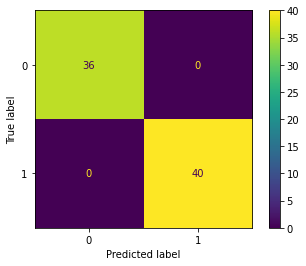

In [57]:
cm = confusion_matrix(y_test, catgridpred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## LogReg accuracy score = 0,81

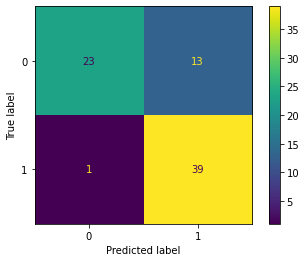

In [62]:
cm = confusion_matrix(y_test, pred, labels=lmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lmodel.classes_)
disp.plot()